In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
file_data = '/Users/cemalarican/Desktop/THESIS/PART 3/MOVING_WINDOW/'
file_main_data = '/Users/cemalarican/Desktop/THESIS/PART 3/MOVING_WINDOW/MAIN_DATA/'

windows = [15, 30, 45, 60, 90, 120, 252]

# before the swap: stock1 actually equals stock2
coint_pairs = pd.read_csv('/Users/cemalarican/Desktop/THESIS/pairs_to_investigate.csv')

import sys  
sys.path.insert(0, '/Users/cemalarican/Desktop/THESIS/')

from pipeLine import Pipeline

In [11]:
data = pd.DataFrame()

# originally 239
for window in windows:
    data['perf_' + str(window)] = pd.read_csv(file_data + 'pair_sim_' + str(window)+'.csv').iloc[-1]

data.drop('Unnamed: 0', inplace=True)
data


perf_15      perf_30  perf_45  perf_60  perf_90  \
MZZ vs SMDD:NON-STAT    100000       100000   100000   100000   100000   
EDV vs UBT:NON-STAT    99425.2       100000  99959.8  99935.9   100349   
IVV vs IWB:STAT         100000      99695.4  98711.6  96848.6   100497   
DGL vs SGOL:STAT        100000       100000   100000   100000   100000   
PHDG vs VQT:STAT        100000       100000   100000   100000  99384.6   
IWV vs SCHB:NON-STAT    100000       100000   100000   100000   100000   
IWB vs SPY:STAT         100000      99786.3  98380.6  97228.3   101146   
IWB vs SSO:STAT         100000       101919   101768   102149   104445   
CURE vs RXL:STAT       96132.5      94397.8  90867.6  94374.5  86625.6   
EUSA vs VV:STAT         101761      36290.7  88839.4   118001  87990.6   
PHYS vs SGOL:NON-STAT   100507       100631   100983   100611   100360   
FXP vs YANG:NON-STAT    162403       126017   126237   228566   248843   
SCHB vs VTI:NON-STAT    100000       100000   100000   100000   100000   
DGL vs GLD:STAT         100000       100000   100000   100000   100000   
DLN vs VYM:NON-STAT    99980.5       100139  99862.1  99917.3  99745.1   
FUTY vs XLU:NON-STAT   99445.8      99464.9    98603  96786.8  96903.4   
FXY vs YCL:STAT        97902.3       103962   100028   100036   100033   
VPU vs XLU:NON-STAT     100035      99657.8  99936.1   102609   102002   
GLD vs PHYS:STAT        107730       109683   110404   116075  94331.6   
SCHG vs VOOG:STAT      98615.3      98926.8  99931.9   100105  99911.5   
SCHB vs VONE:NON-STAT  99635.6       102609  99684.1  98725.5   101768   
PGF vs PGX:STAT         100000       100000   100000   100000  99645.2   
DOG vs DXD:STAT         100000       100000   100000   100000   100000   
SBND vs TTT:STAT       89498.3      88957.7  91643.1    93631    73417   
DNO vs DTO:NON-STAT     131298       122152   116497   108974   119412   
ITOT vs VOO:STAT        100000       100000   100000   102326   100105   
IWB vs SCHB:NON-STAT    101330       100585   102473  98603.8   102027   
SSO vs VOO:STAT         100000       101179   101214   101204   101696   
IWL vs MGC:STAT         126149      68402.4  96524.2  13608.7    96957   
TBT vs TMV:NON-STAT     100000       100000   100000   100000  94840.7   
...                        ...          ...      ...      ...      ...   
EMES vs EMESQ:STAT      100000       100000   100000   100000   100000   
EMES vs EMESZ:STAT      100000       100000   100000   100000   100000   
PHIO vs RXII:STAT       154972       371880  66893.3  47232.1  70917.3   
PTIE vs SAVA:STAT       100000       100000   100000   100000   100000   
RAS vs RASFD:STAT       100000       100000   100000   100000   100000   
CBS vs VIAC:NON-STAT   99948.7      99947.4  99850.9  99702.9  99686.3   
CHI_2 vs QQQC:STAT     99417.6      99253.9  97729.6   101204  99333.8   
CUR vs SNCA:STAT        100000       100000   100000   100000   100000   
CWEN vs NYLD:STAT       103124       102664   100788   100056   100401   
EVLV vs IMBI:STAT      53375.4  1.05346e+06  48154.5  74085.5  66345.9   
IPCI vs IPCIF:STAT       99898      99868.2  99868.5  99858.8  99852.4   
KEG vs KEGX:STAT       99713.9      99515.5  99525.6  99642.4  99432.2   
KEG vs KEGXD:STAT      99713.9      99515.5  99525.6  99642.4  99432.2   
MPVD vs MPVDF:STAT     99929.9      99381.8  99766.5  89328.1  82805.4   
PIPR vs PJC:STAT       99882.1      99878.1  99878.6  99867.7  99914.8   
SDRL vs SDRL_:STAT    -39136.3       156039  31777.5  46541.4   121690   
SPN vs SPNV:STAT       83044.9       117424   142203   100232   124527   
SPN vs SPNVD:STAT      83044.9       117424   142203   100232   124527   
TTS vs TTSH:STAT        100868       100236   100381   100204  98956.8   
ANW vs ANWWQ:STAT       100000       100000   100000   100000   100000   
ATCO vs SSW:STAT        100000       100000   100000   100000   100000   
BAS vs BASX:STAT        100000       100000   100000   100000   100000   
FEU vs SPEU:STAT        100

In [13]:
pnl_data_1 = pd.DataFrame()
pnl_data_2 = pd.DataFrame()
pnl_data_3 = pd.DataFrame()
pnl_data_4 = pd.DataFrame()
pnl_data_5 = pd.DataFrame()
pnl_data_6 = pd.DataFrame()
pnl_data_7 = pd.DataFrame()
tickers = list(data.index)

def get_pnl(mw, dbase, mw_base):
    d = pd.read_csv(file_main_data + 'pair_sim_' + str(mw) + '.csv', low_memory=False)
    dg = d.groupby('symbol')
    tickers = list(data.index)
    for i in range(len(dbase)):
        mw_base[tickers[i]] = dg.get_group(tickers[i]).pnl.reset_index(drop=True)
    return mw_base

def get_pnl_list(pnl_data, band):
    list_of_pnl = []
    for i in range(len(coint_pairs)):
        tick = pd.DataFrame()
        whole_avg = pnl_data[tickers[i]].mean()
        
        tick['data'] = pnl_data[tickers[i]]
        tick['pos'] = pnl_data[tickers[i]] > 0
        
        t = tick.groupby('pos')
        
        if len(t.get_group(False)) == len(tick):
            t_len = len(tick)
            tt_len = 0
                        
            t_mean = t.get_group(False)['data'].mean()
            tt_mean = 0
            
            r = (tickers[i], t_len, tt_len, t_mean, tt_mean, whole_avg, data['perf_'+str(band)].iloc[i])
            list_of_pnl.append(r)
            
        else:

            t_len  = len(t.get_group(False))
            tt_len = len(t.get_group(True))

            t_mean  = t.get_group(False)['data'].mean()
            
            tt_mean = t.get_group(True)['data'].mean()
            r = (tickers[i], t_len, tt_len, t_mean, tt_mean, whole_avg, data['perf_'+str(band)].iloc[i])
            list_of_pnl.append(r)


    return list_of_pnl      


def make_df_pnl(pnl_list, mw):
    df = pd.DataFrame(data=pnl_list, columns=['pair', 'no_loss', 'no_win', 'avg_loss', 'avg_win', 'whole_avg', 'perf_'+str(mw)])
    df.set_index('pair', inplace=True)
    s = list(df.index)
    df['stat'] = [s[i].split(':')[1] for i in range(len(s))]
    df['pos_avg'] = df.whole_avg > 0
    df['win'] = df['perf_'+ str(mw)] > 100000
    tot_days = df['no_loss'] + df['no_win']
    df['loss_percent'] = round(df['no_loss']/tot_days, 2)
    df['win_percent'] = round(df['no_win']/tot_days, 2)
    
    return df[df['perf_'+str(mw)] != 100000]


pnl_1 = get_pnl(15,  data, pnl_data_1)
pnl_2 = get_pnl(30,  data, pnl_data_2)
pnl_3 = get_pnl(45,  data, pnl_data_3)
pnl_4 = get_pnl(60,  data, pnl_data_4)
pnl_5 = get_pnl(90,  data, pnl_data_5)
pnl_6 = get_pnl(120, data, pnl_data_6)
pnl_7 = get_pnl(252, data, pnl_data_7)


list_1 = get_pnl_list(pnl_1, 15)
list_2 = get_pnl_list(pnl_2, 30)
list_3 = get_pnl_list(pnl_3, 45)
list_4 = get_pnl_list(pnl_4, 60)
list_5 = get_pnl_list(pnl_5, 90)
list_6 = get_pnl_list(pnl_6, 120)
list_7 = get_pnl_list(pnl_7, 252)


df_1 = make_df_pnl(list_1, 15)
df_2 = make_df_pnl(list_2, 30)
df_3 = make_df_pnl(list_3, 45)
df_4 = make_df_pnl(list_4, 60)
df_5 = make_df_pnl(list_5, 90)
df_6 = make_df_pnl(list_6, 120)
df_7 = make_df_pnl(list_7, 252)



def get_tables(data, mw):
    
    cols = ['no_loss', 'no_win', 'avg_loss','avg_win', 'whole_avg', 'perf_' + str(mw), 'loss_percent', 'win_percent']
    
    avg_list = [list(round(data[cols].mean(), 2).reset_index(drop=True))[i] for i in range(8)]
    
    stat_list = list(round(data.groupby('stat').get_group('STAT')[cols].mean(), 2))
    
    nstat_list = list(round(data.groupby('stat').get_group('NON-STAT')[cols].mean(), 2))
    
    stat = data.groupby('stat').get_group('STAT')
    
    win_stat = list(round(stat.groupby('win').get_group(True)[cols].mean(), 2))
    
    nstat = data.groupby('stat').get_group('NON-STAT')
    
    win_nstat = list(round(nstat.groupby('win').get_group(True)[cols].mean(), 2))
    
    df_list = [avg_list, stat_list, nstat_list, win_stat, win_nstat]
    
    index = ['avg', 'avg stat', 'avg non-stat', 'avg winning stat', 'avg winning non-stat']
    
    list_to_df =  pd.DataFrame(data=df_list, columns=cols, index=index)
    list_to_df.to_latex(buf=file_data + str(mw)+' daily returns mw.txt', index=True)
    print(list_to_df)
    

get_tables(df_1, 15)
get_tables(df_2, 30)
get_tables(df_3, 45)
get_tables(df_4, 60)
get_tables(df_5, 90)
get_tables(df_6, 120)
get_tables(df_7, 252)


                      no_loss  no_win  avg_loss  avg_win  whole_avg  \
avg                    165.90   86.10  -1038.62  1224.05    -100.36   
avg stat               164.88   87.12  -1282.46  1420.56    -153.97   
avg non-stat           168.42   83.58   -435.41   737.95      32.27   
avg winning stat       157.29   94.71   -436.03   872.59      53.41   
avg winning non-stat   167.06   84.94   -684.92  1241.69      97.45   

                        perf_15  loss_percent  win_percent  
avg                    74709.95          0.66         0.34  
avg stat               61198.73          0.65         0.35  
avg non-stat          108132.45          0.67         0.33  
avg winning stat      113460.44          0.62         0.38  
avg winning non-stat  124557.52          0.66         0.34  
                      no_loss  no_win  avg_loss  avg_win  whole_avg  \
avg                    172.26   79.74   -477.33   869.83      40.64   
avg stat               171.90   80.10   -543.21   976.66      55.

In [ ]:
# We remove the pairs that are not traded: 202 left over
data = data[data['perf_15'] != 100000]

In [ ]:
idx = list(data.index)

# MAIN DATA
for window in windows:
    d =  pd.read_csv(file_main_data + '/pair_sim_'+ str(window) +'.csv').groupby('symbol')
    alphas = []
    betas = []
    sharpes = []
    maxes = []
    for i in range(239):
        
        stock_alpha = d.get_group(idx[i]).alpha.iloc[-1]
        stock_beta = d.get_group(idx[i]).beta.iloc[-1]
        stock_sharpe = d.get_group(idx[i]).sharpe.iloc[-1]
        stock_max = d.get_group(idx[i]).max_drawdown.iloc[-1]
        alphas.append(stock_alpha)
        betas.append(stock_beta)
        sharpes.append(stock_sharpe)
        maxes.append(stock_max)

    data['alpha_' + str(window)] = alphas
    data['beta_' + str(window)] = betas
    data['sharpe_' + str(window)] = sharpes
    data['maxdraw_' + str(window)] = maxes

data['STAT'] = [list(data.index)[i].split(':')[1] for i in range(len(data)) ]

for window in windows:
    data['pct_'+str(window)] = (data['perf_' +str(window)]/100000) -1
    
data

In [3]:
data_group = data.groupby('STAT')
stat_data = data_group.get_group('STAT')
nstat_data = data_group.get_group('NON-STAT')
print('Number of stats: {}'.format(len(stat_data)))
print('Number of nstats: {}'.format(len(nstat_data)))
print('total: {}'.format(len(data)))

Number of stats: 96
Number of nstats: 39
total: 135


In [7]:
### GETTING AVERAGE RESULTS ###
average_perf = OrderedDict()
pct_mean = OrderedDict()
pct_std = OrderedDict()
alpha_mean = OrderedDict()
beta_mean = OrderedDict()
sharpe_mean = OrderedDict()
maxdraw_mean= OrderedDict()

best_5_perf = OrderedDict()
worst_5_perf = OrderedDict()

data_len = len(data)

for window in windows:
    average_perf[window] = round(data['perf_' + str(window)].mean(), 2)
    pct_mean[window]     = round(data['pct_' + str(window)].mean(), 2)
    pct_std[window]      = round(data['pct_'+str(window)].std(), 2)
    alpha_mean[window]   = round(data['alpha_' + str(window)].mean(), 2)
    beta_mean[window]    = round(data['beta_' + str(window)].mean(), 2)
    sharpe_mean[window]  = round(data['sharpe_' + str(window)].mean(), 2)
    maxdraw_mean[window] = round(data['maxdraw_'+str(window)].mean(), 2)
    
    d = pd.read_csv(file_data + '/pair_sim_' + str(window)+'.csv')
    best_idx = [data['perf_'+str(window)].sort_values()[data_len-5:data_len].index[i] for i in range(5)]
    worst_idx = [data['perf_'+str(window)].sort_values()[:5].index[i] for i in range(5)]
    
    best_5_perf[window] = [(best_idx[i], d[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_perf[window] = [(worst_idx[i], d[worst_idx[i]]) for i in range(len(worst_idx))]

colnames = ['average portfolio value', 'average percentage change', 'average standard deviation',
            'average alpha', 'average beta', 'average sharpe ratio', 'average max drawdown']

list_of_dicts = [average_perf, pct_mean, pct_std,
                 alpha_mean, beta_mean, sharpe_mean, maxdraw_mean ]

main_df = pd.DataFrame()
main_df['window'] = pd.Series(windows)

for i in range(len(list_of_dicts)):
    df = pd.DataFrame(data=list(list_of_dicts[i].items()) , columns=['window', colnames[i]] )
    main_df = pd.concat([main_df, df[colnames[i]]], axis=1)
main_df.to_latex(buf=file_data+'average-perf.txt', index=False)



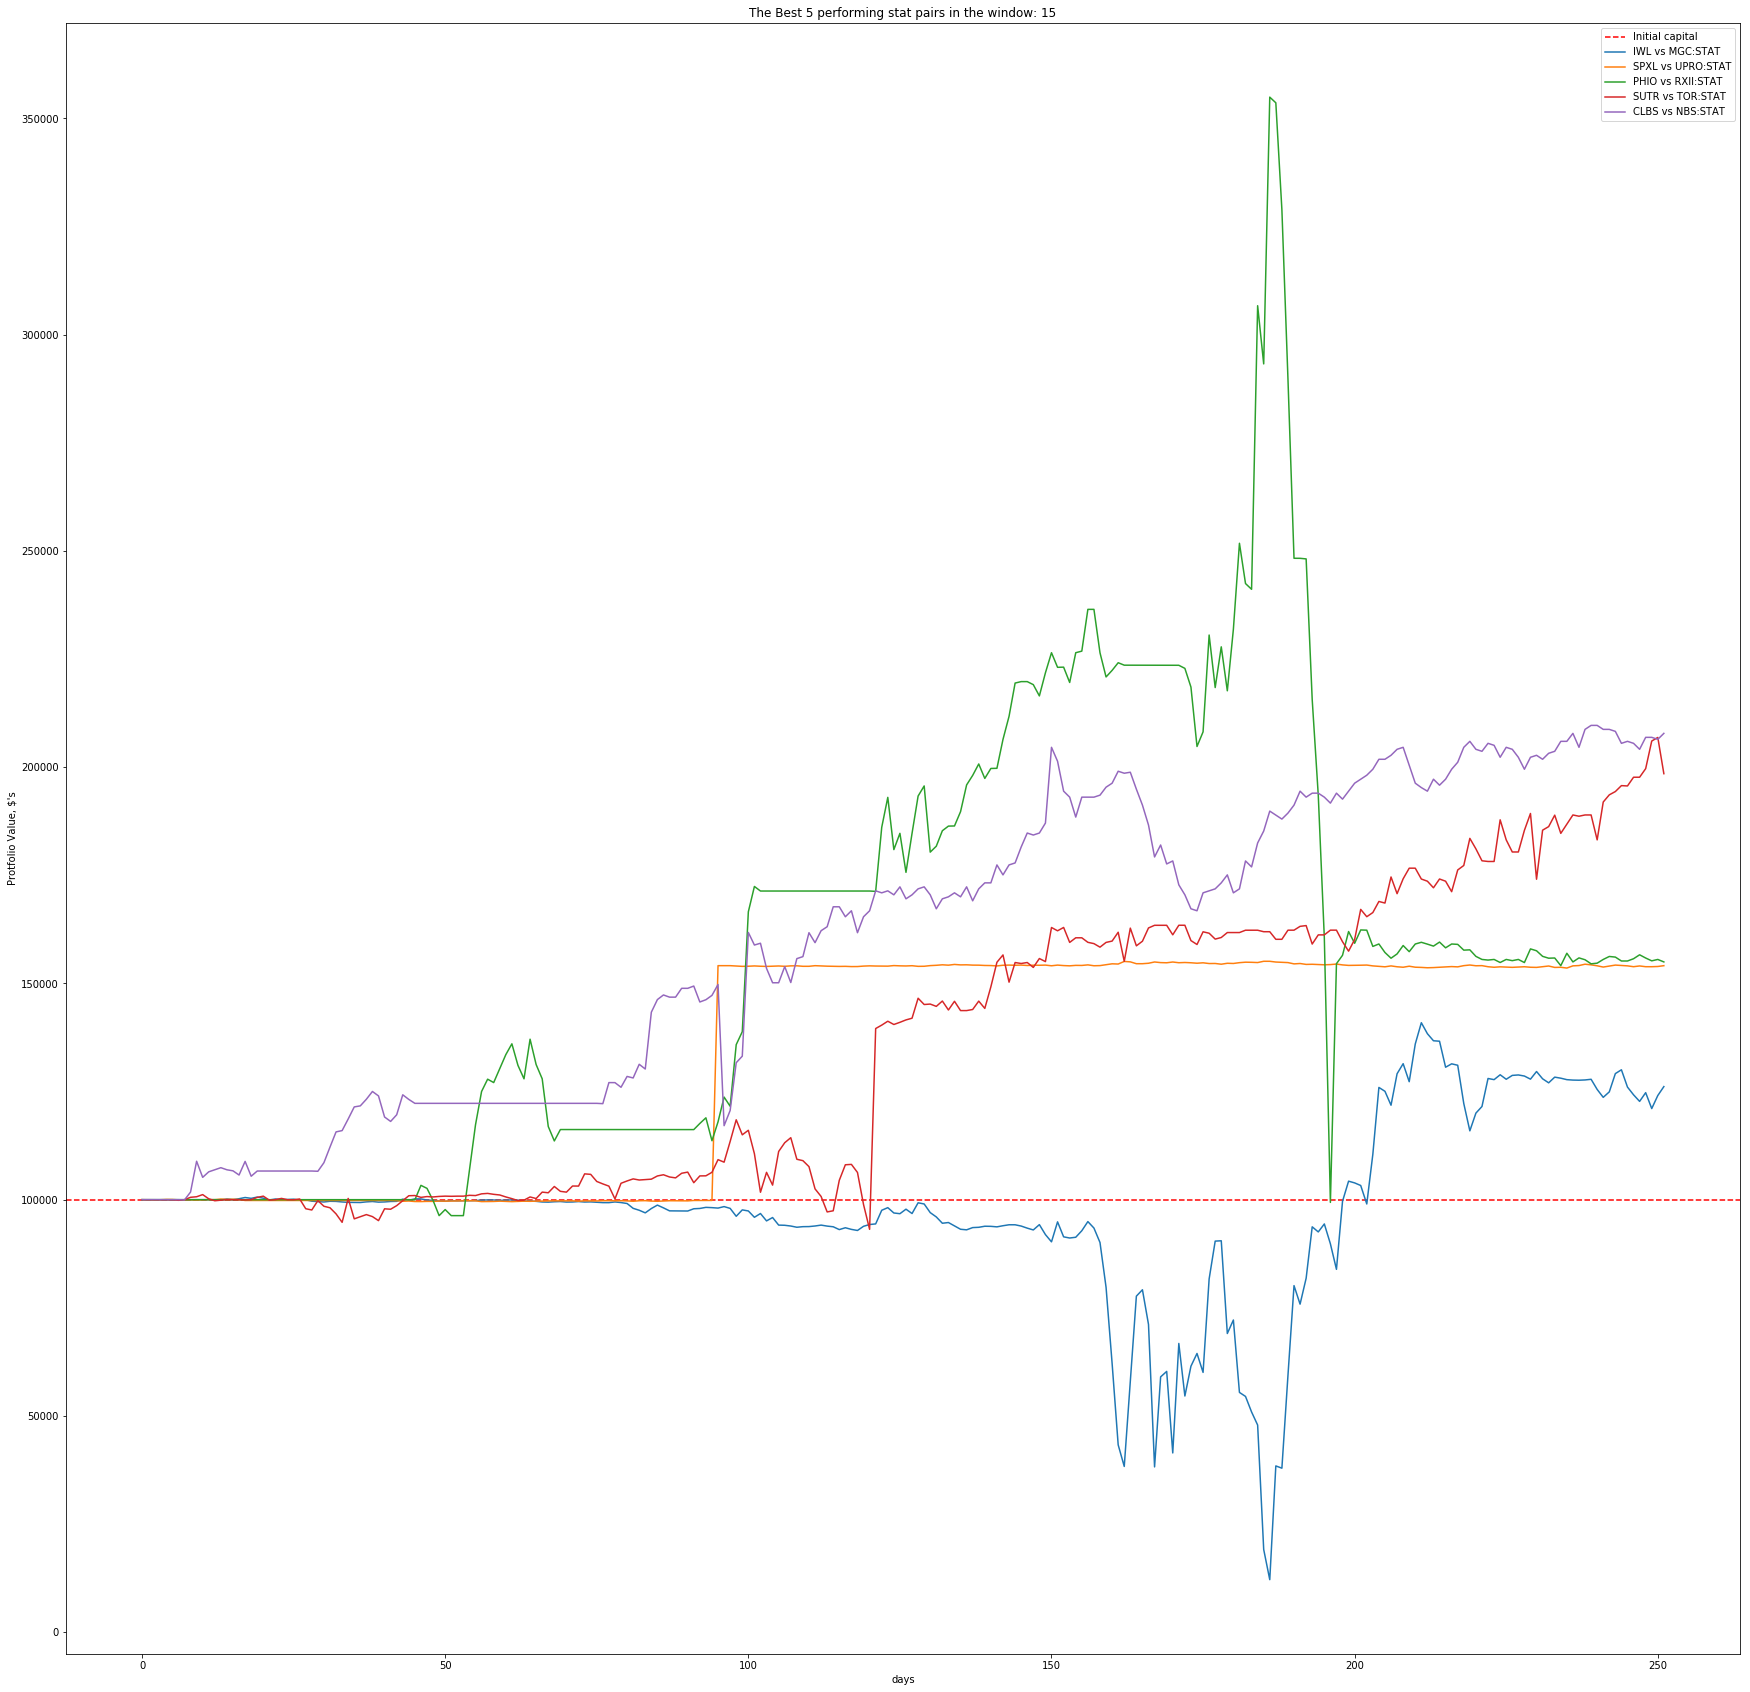

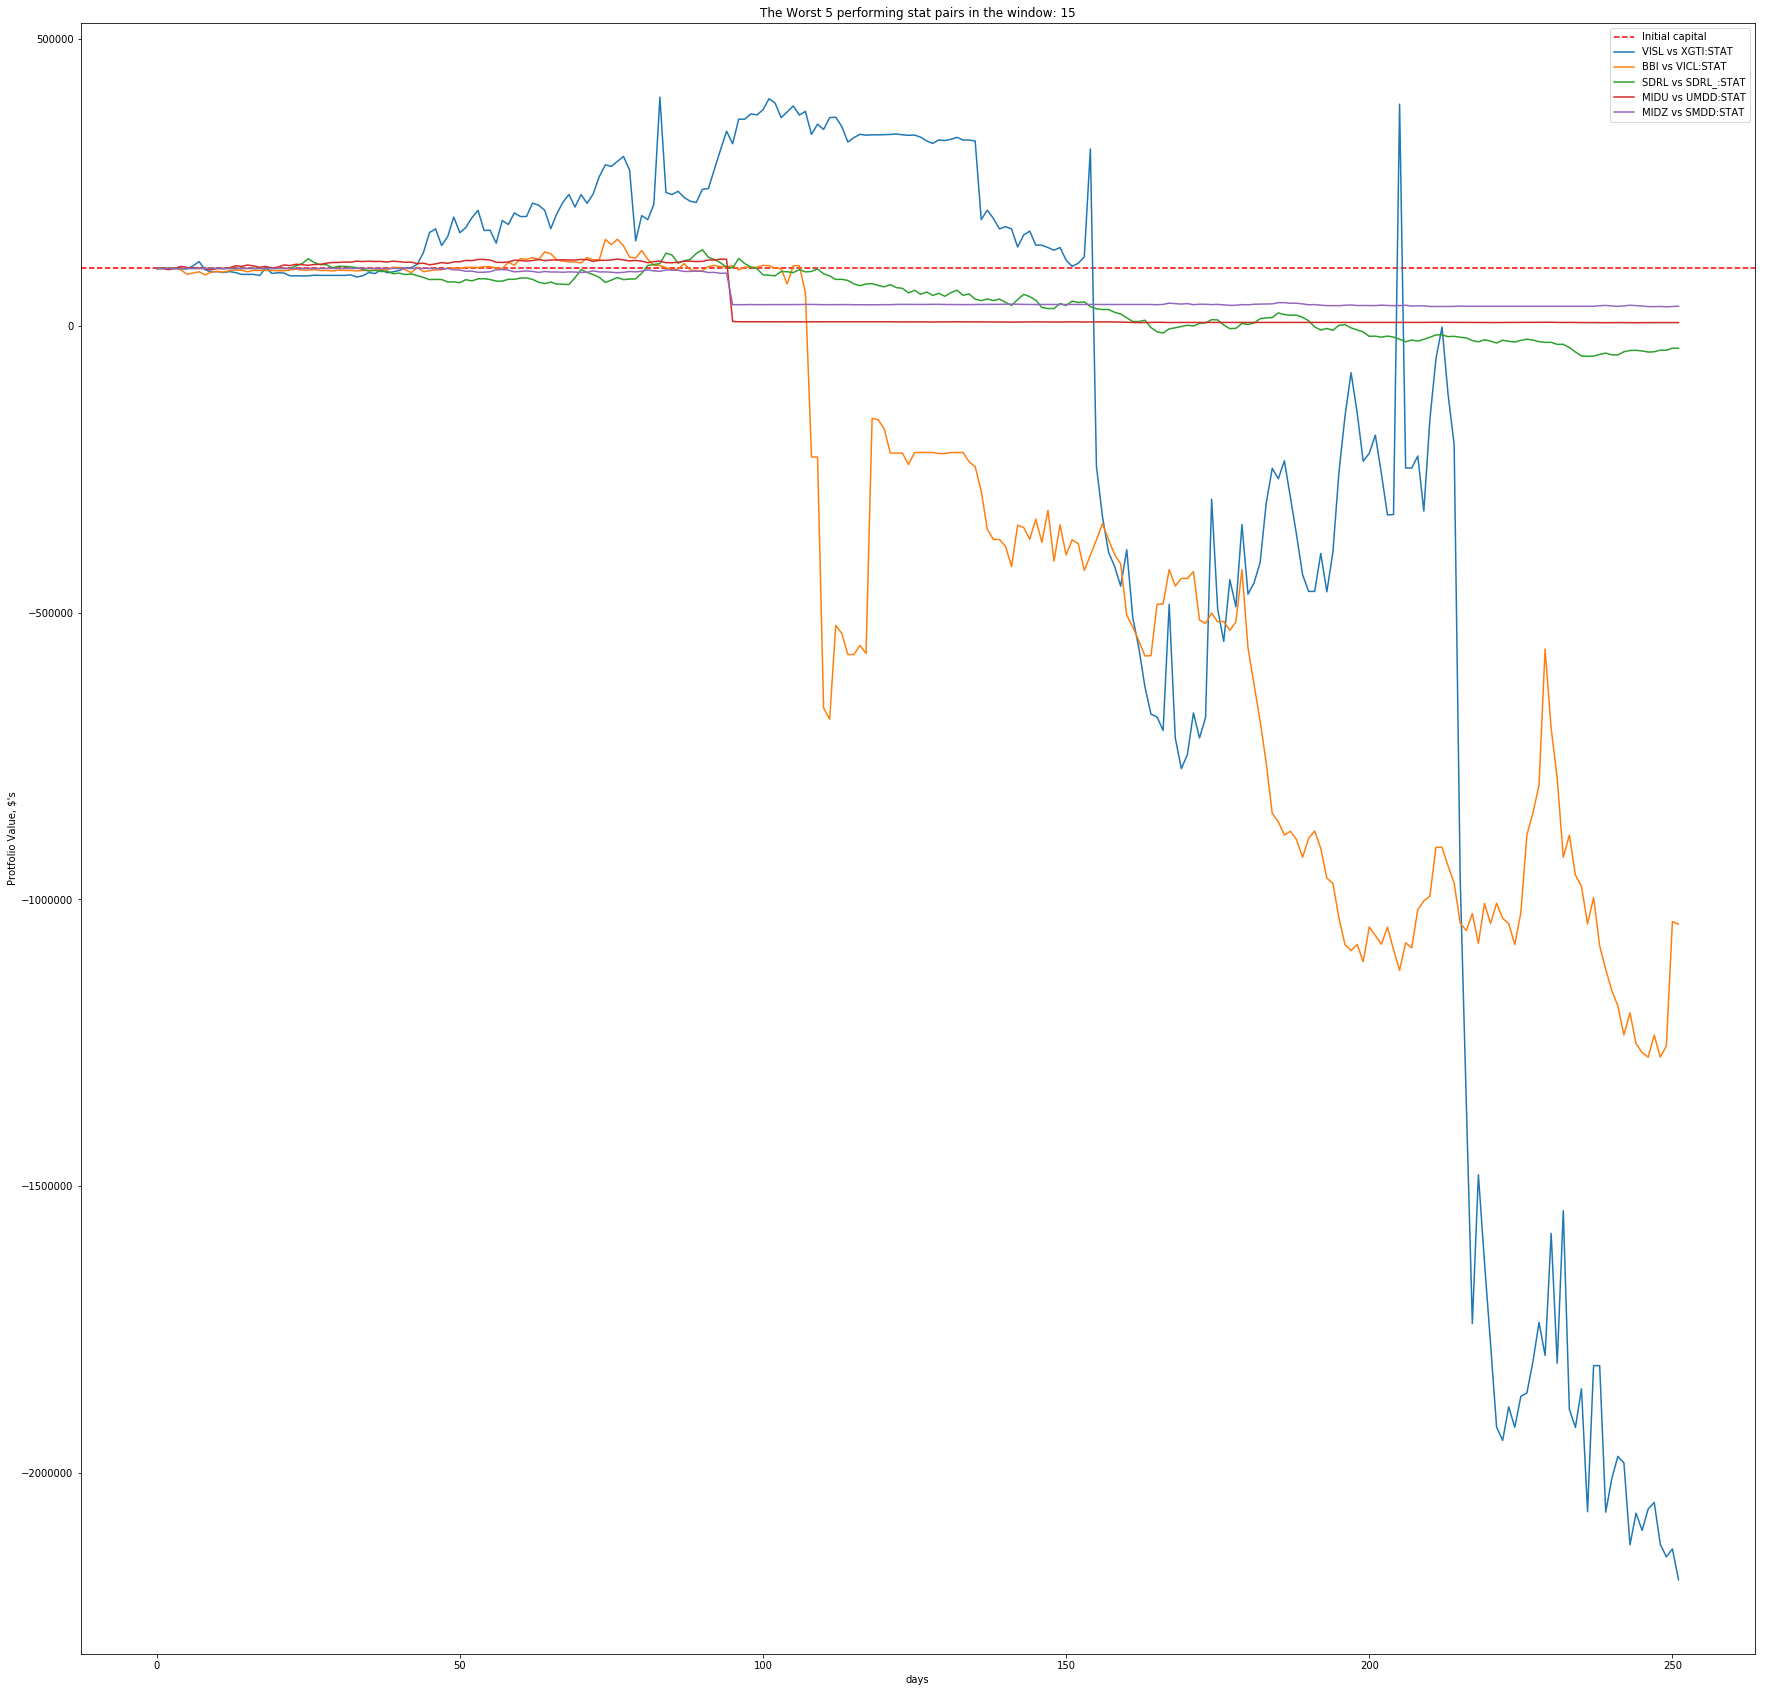

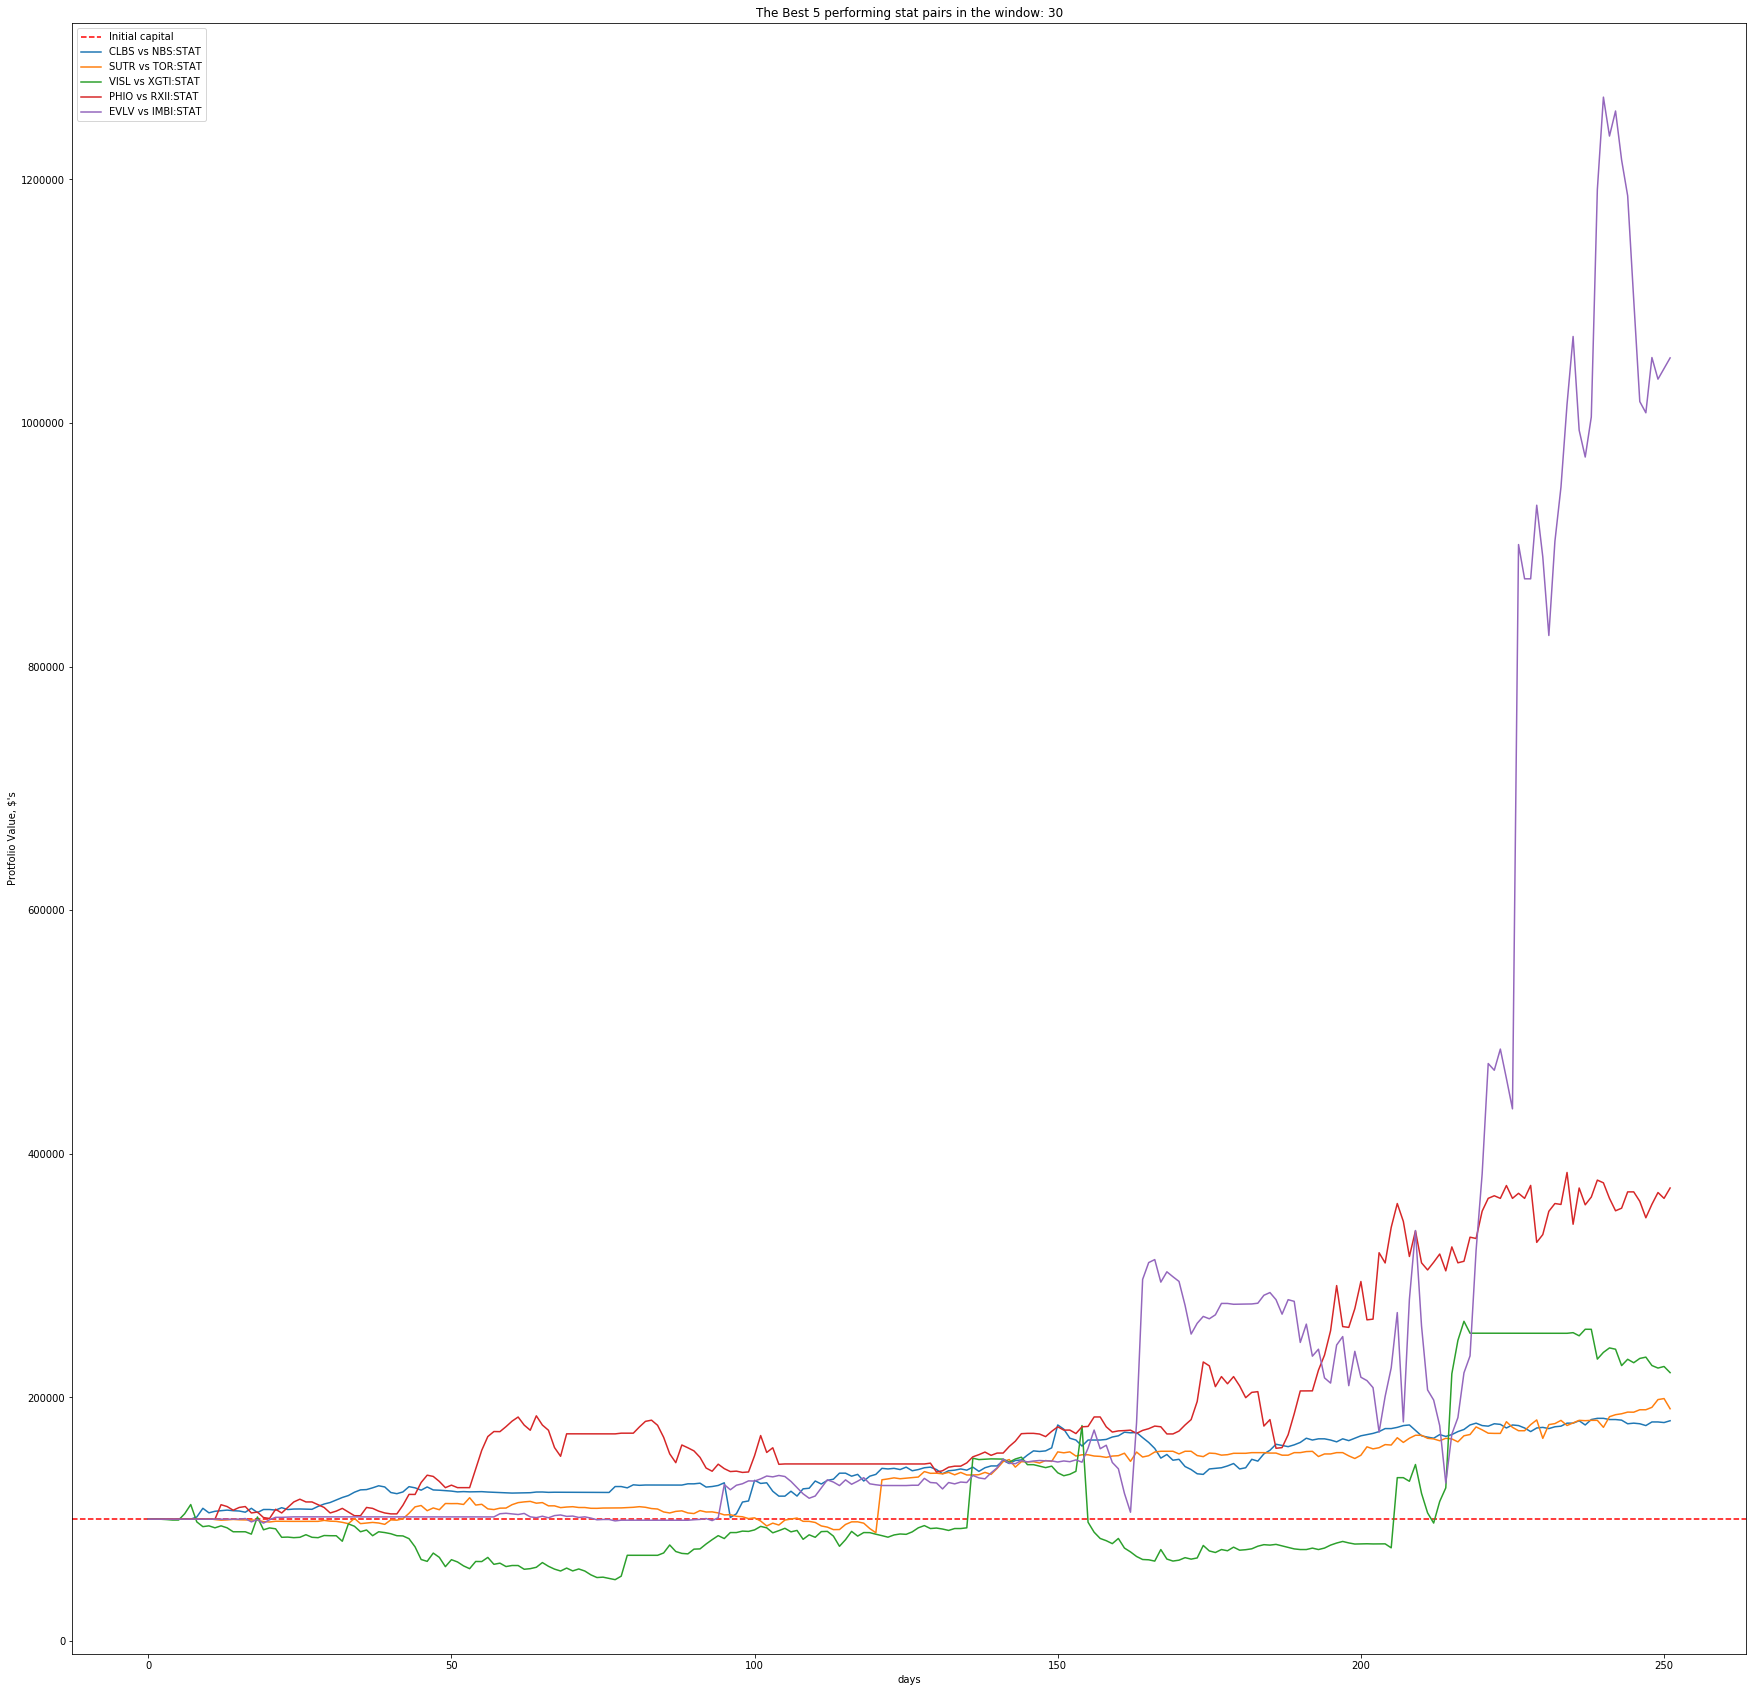

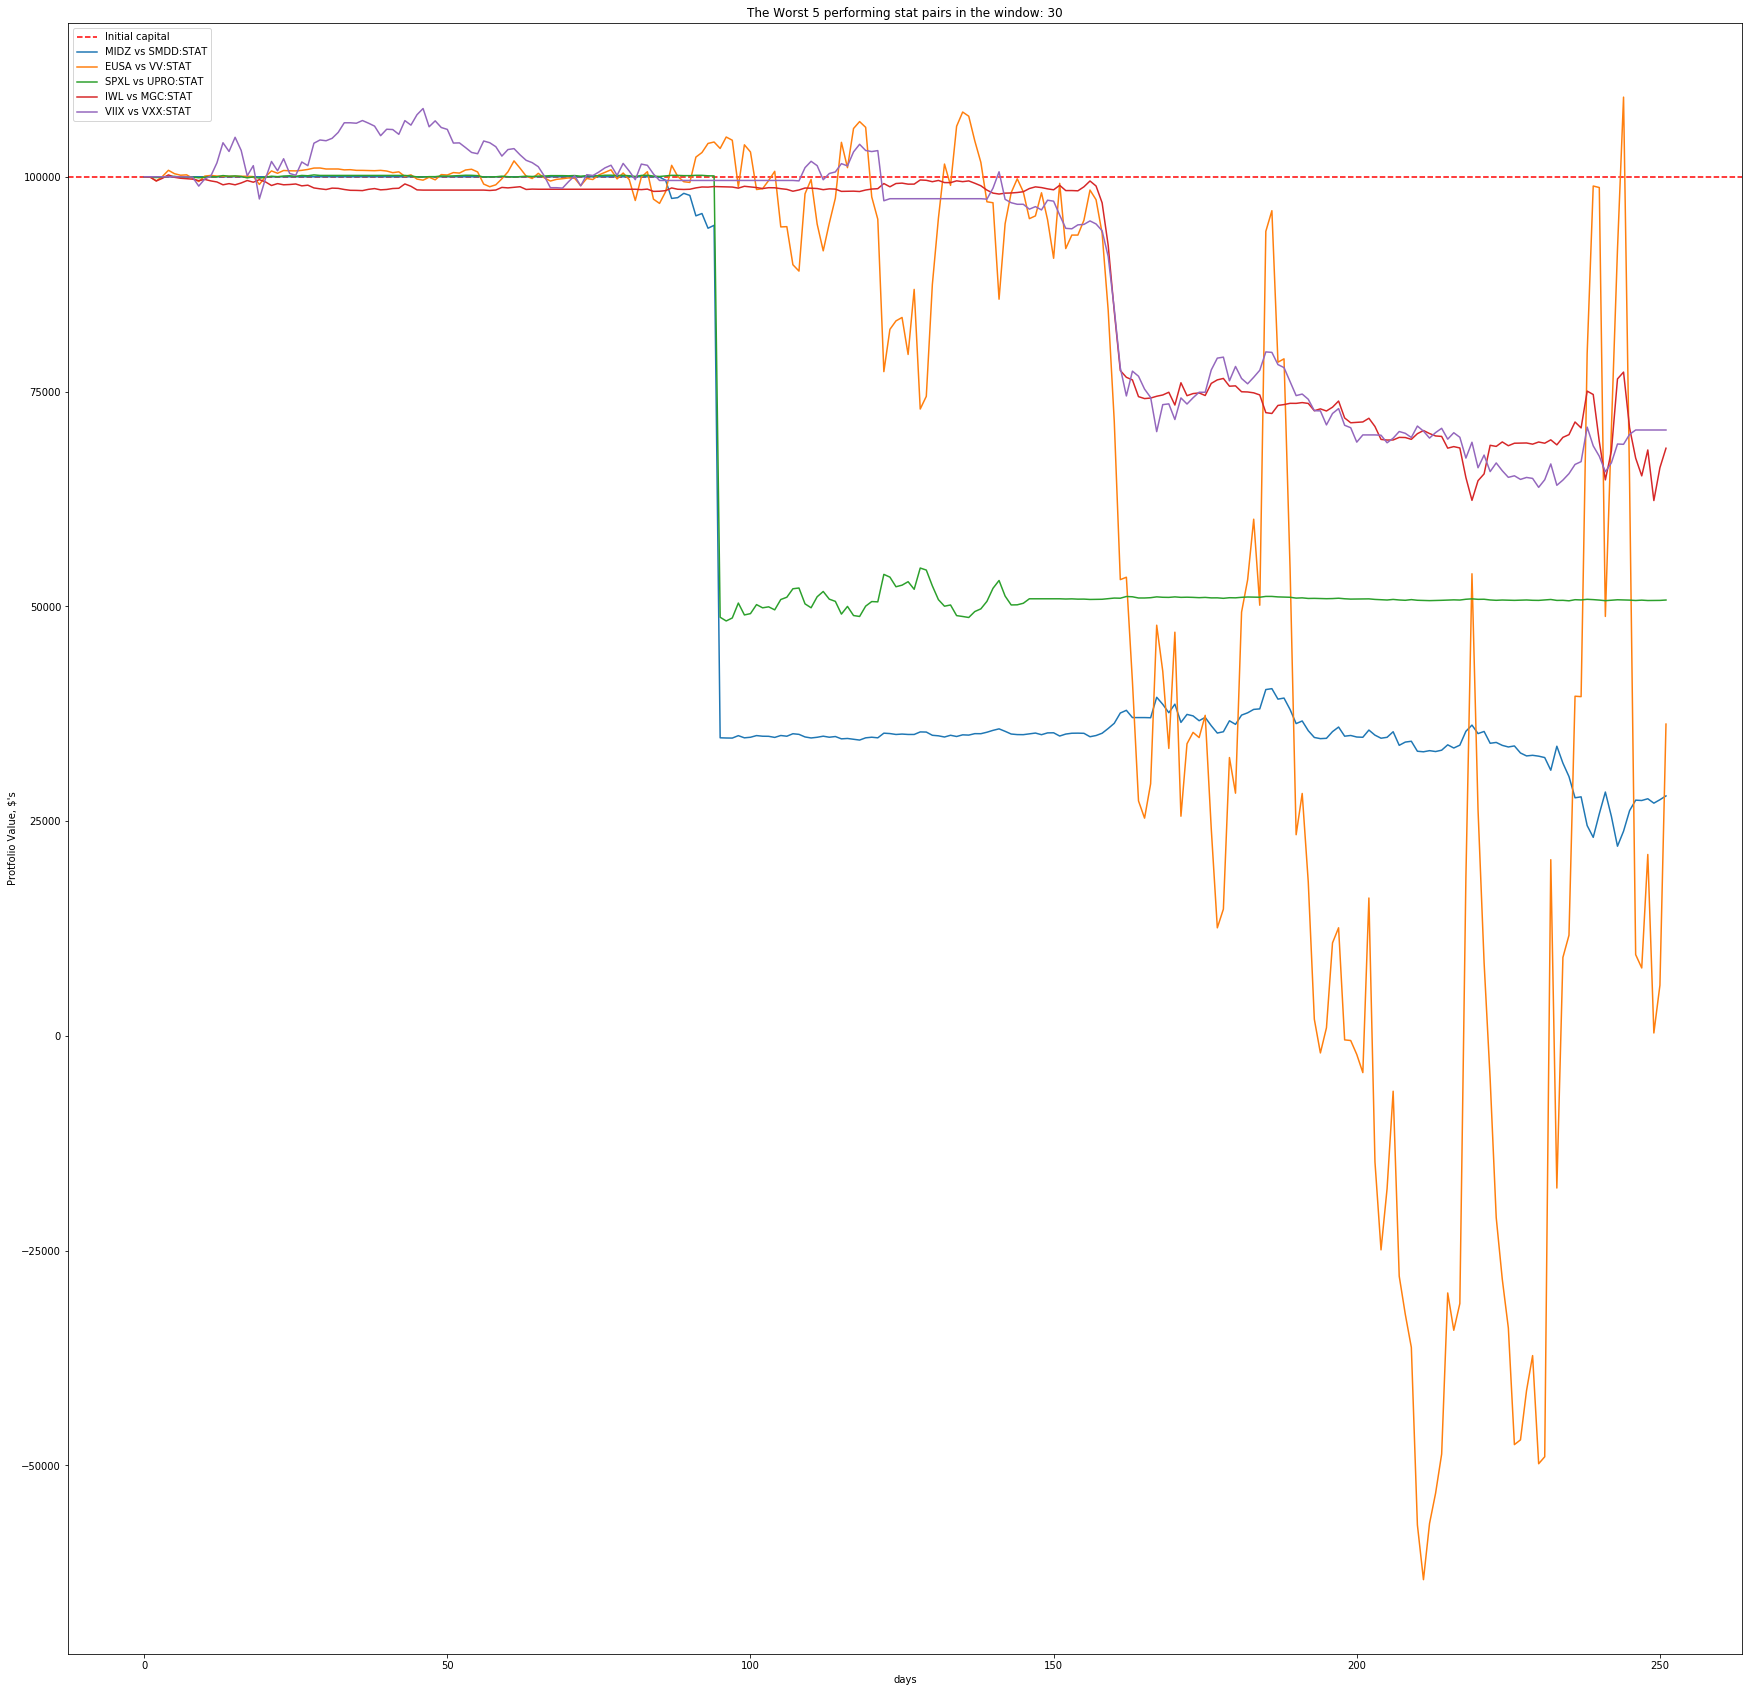

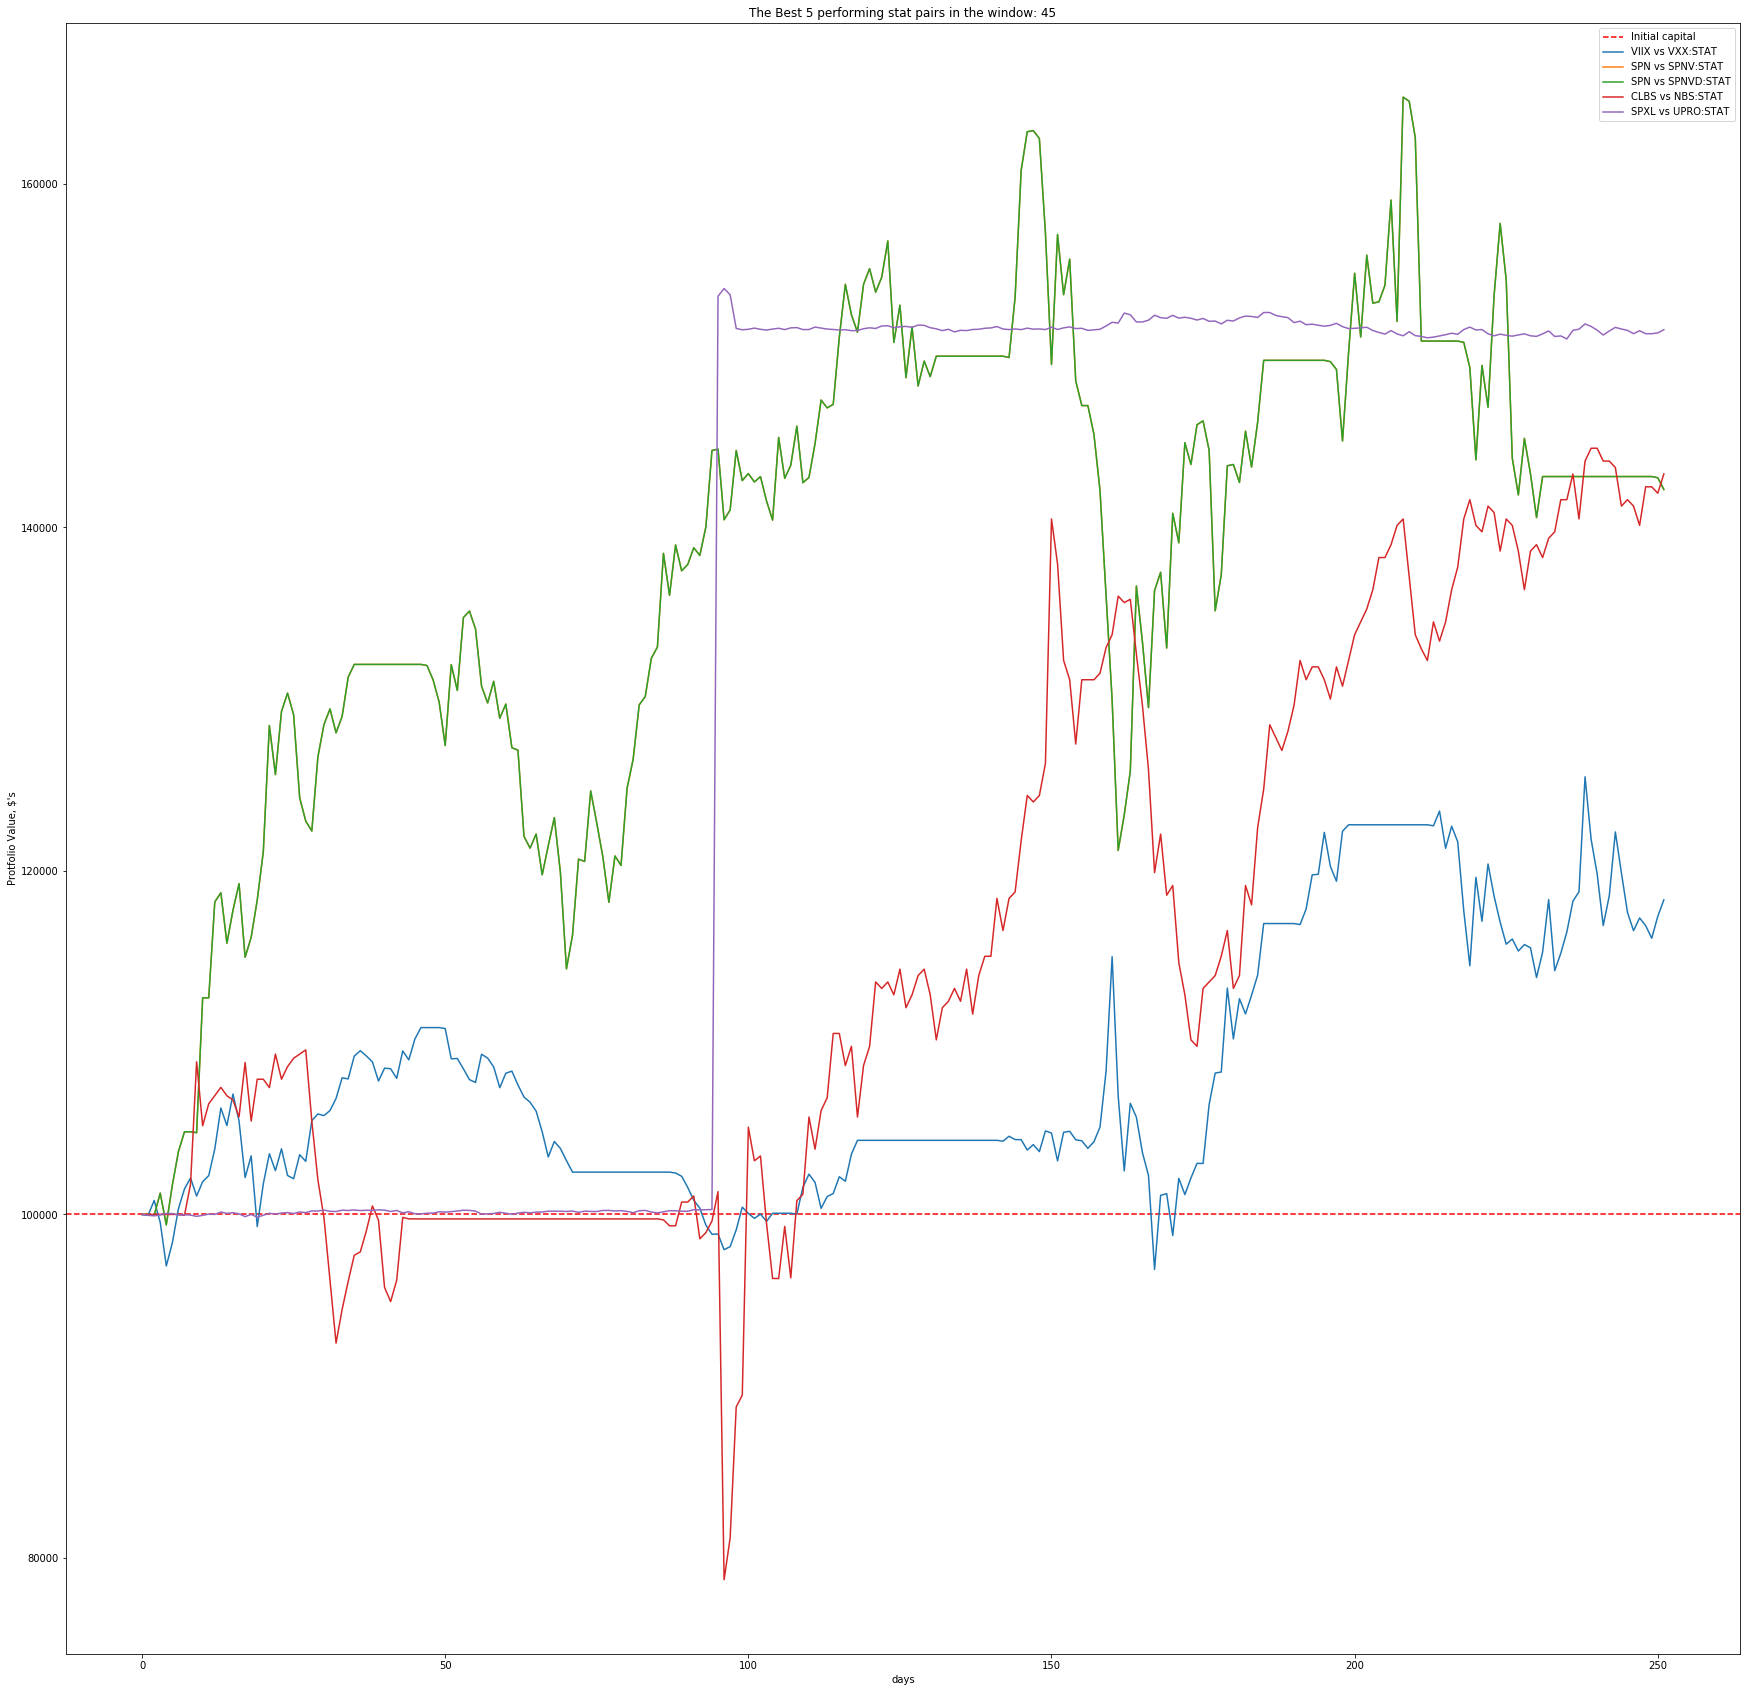

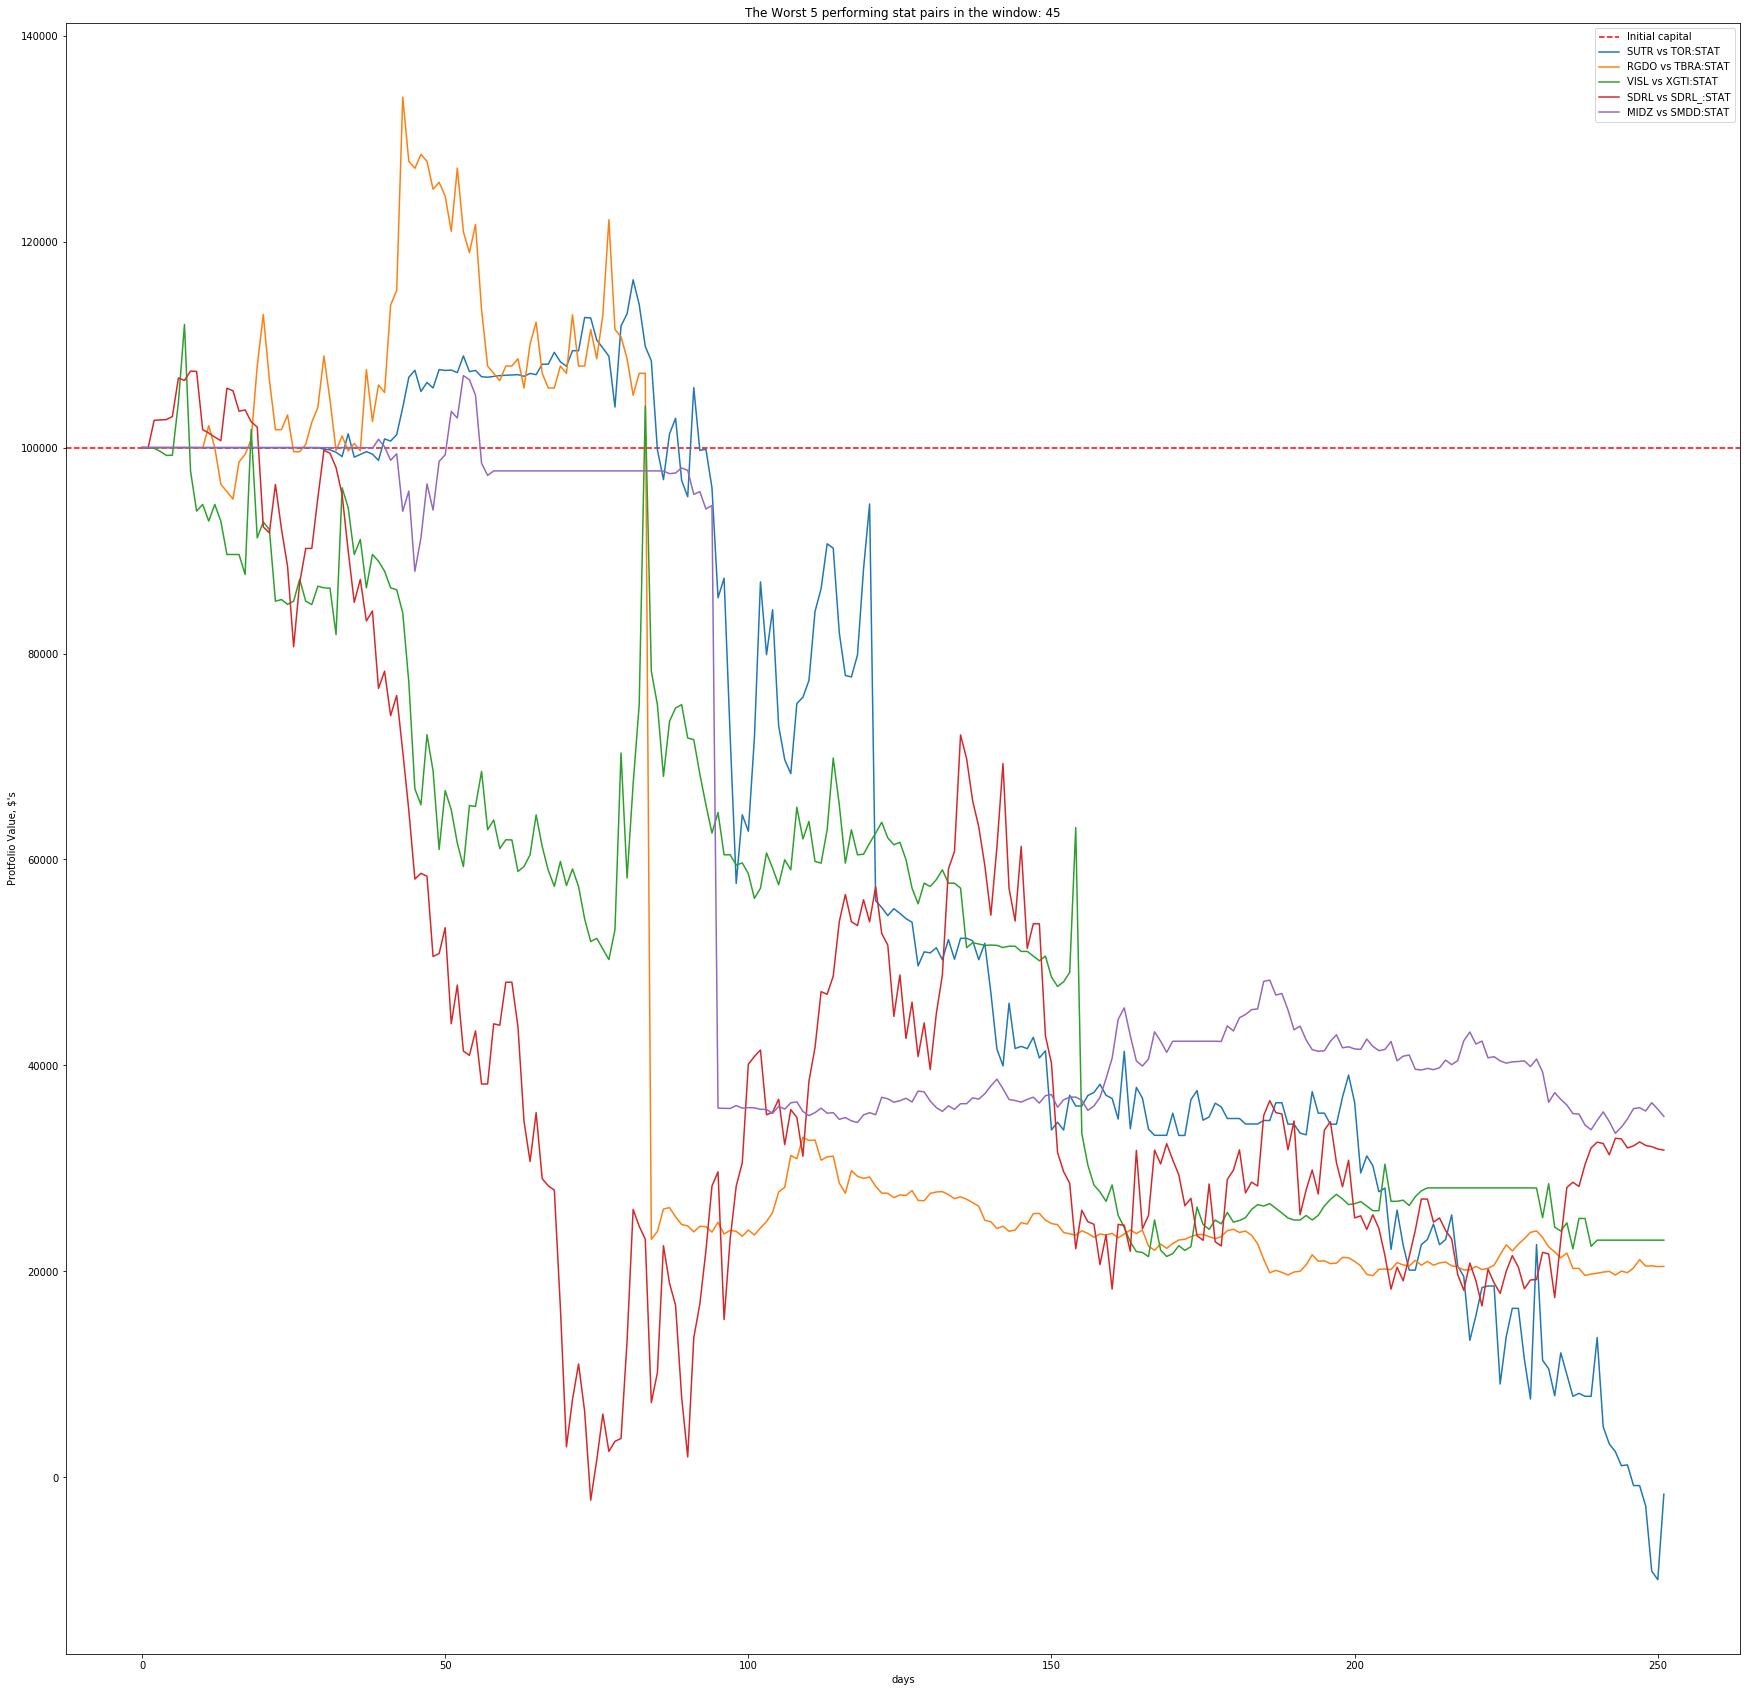

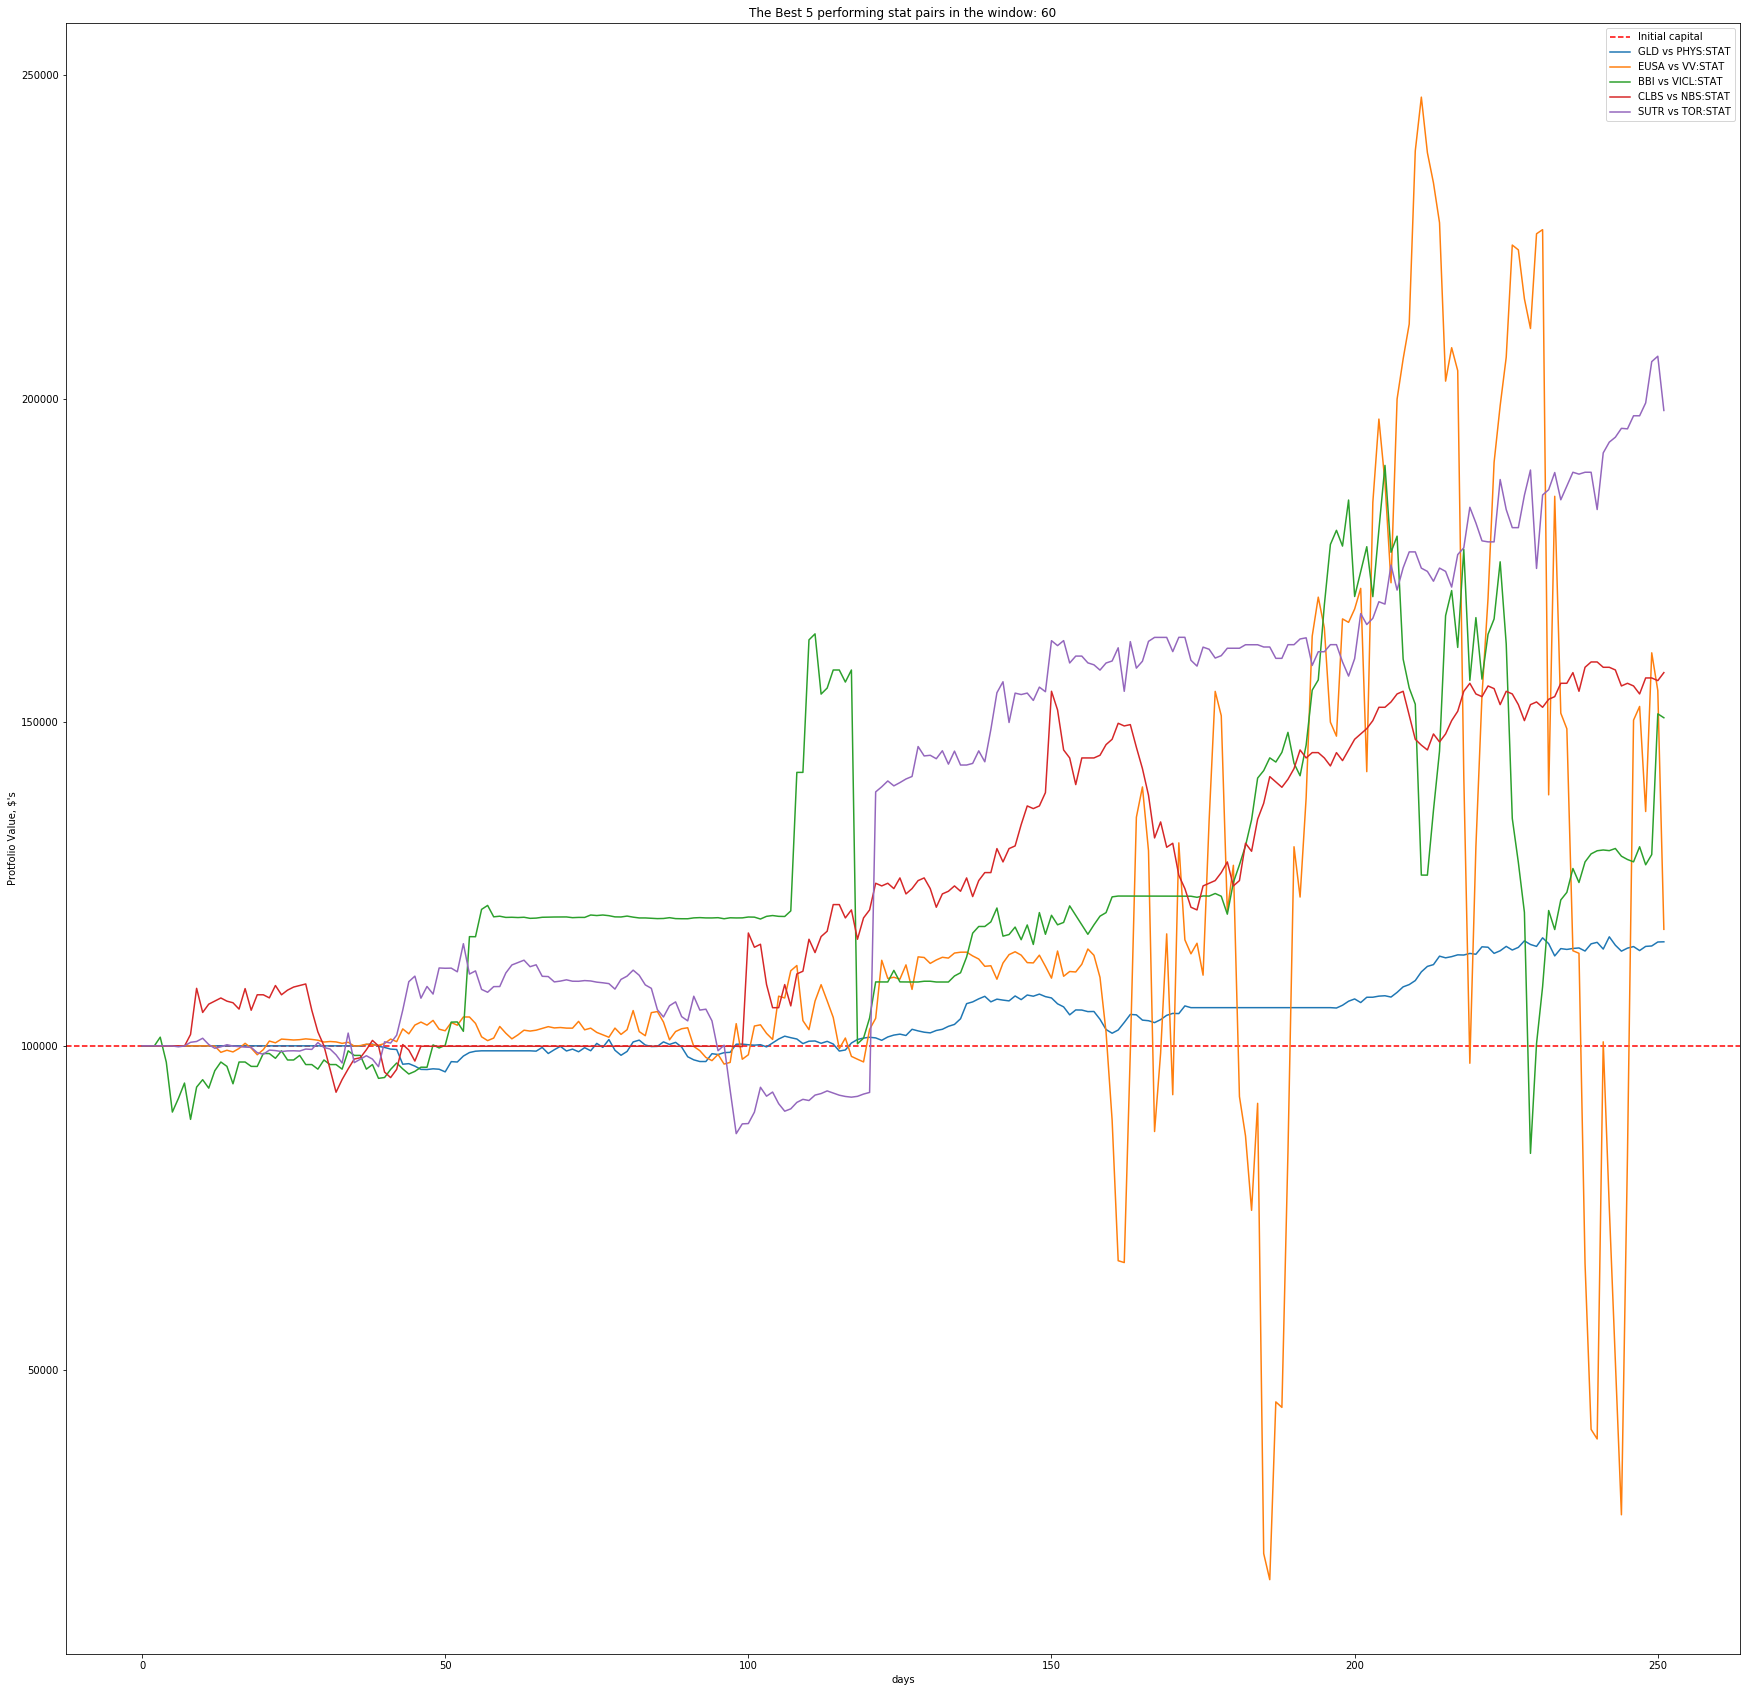

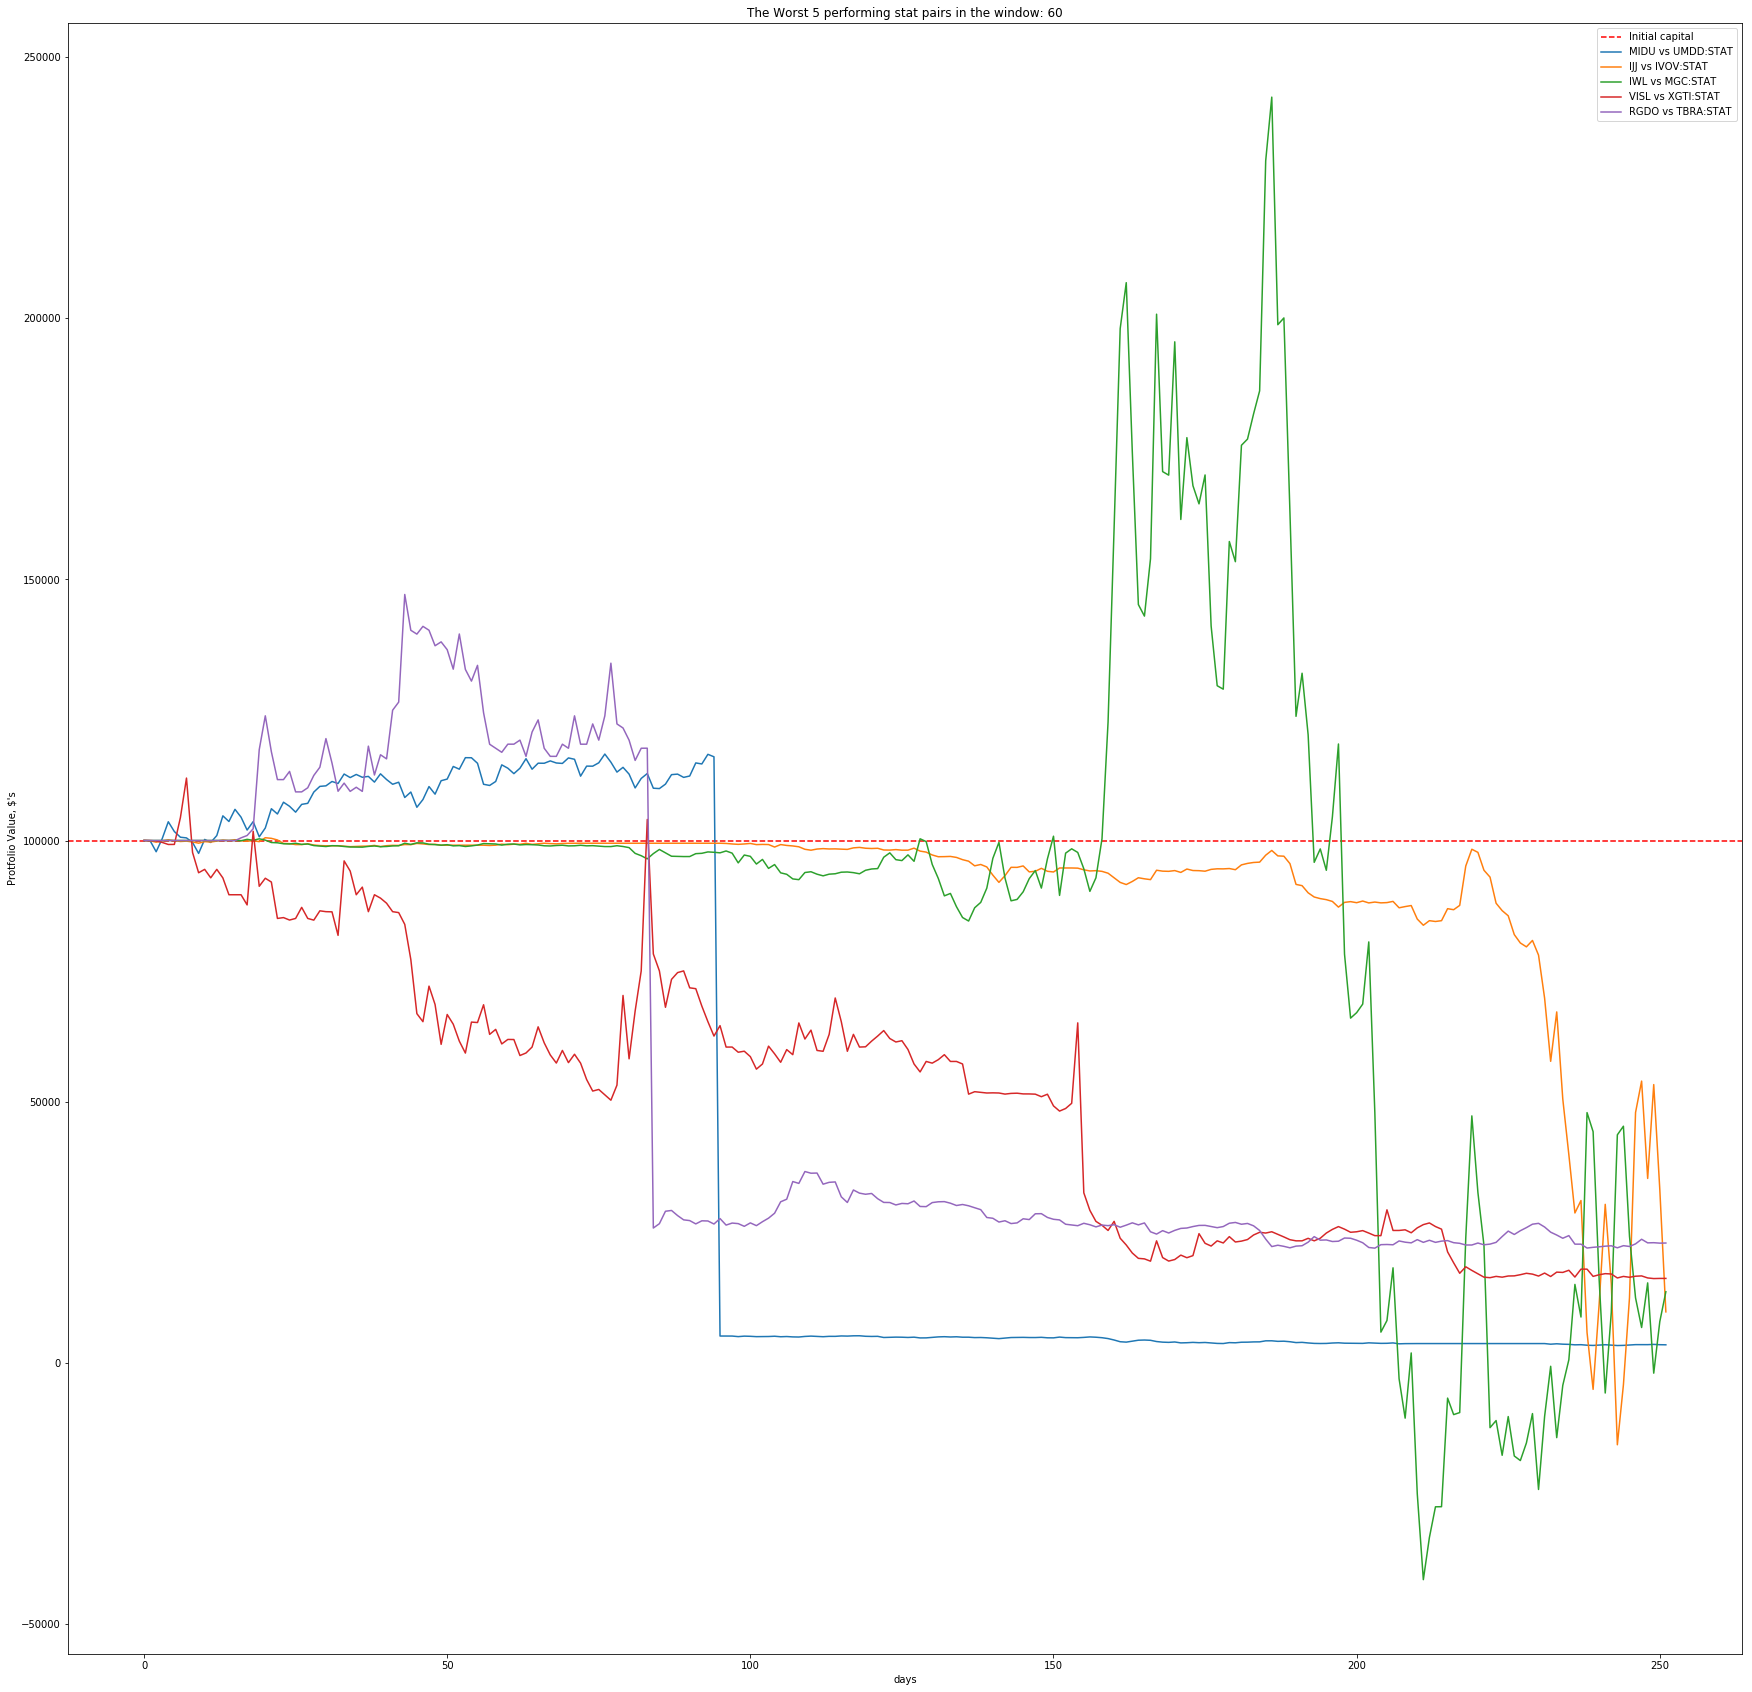

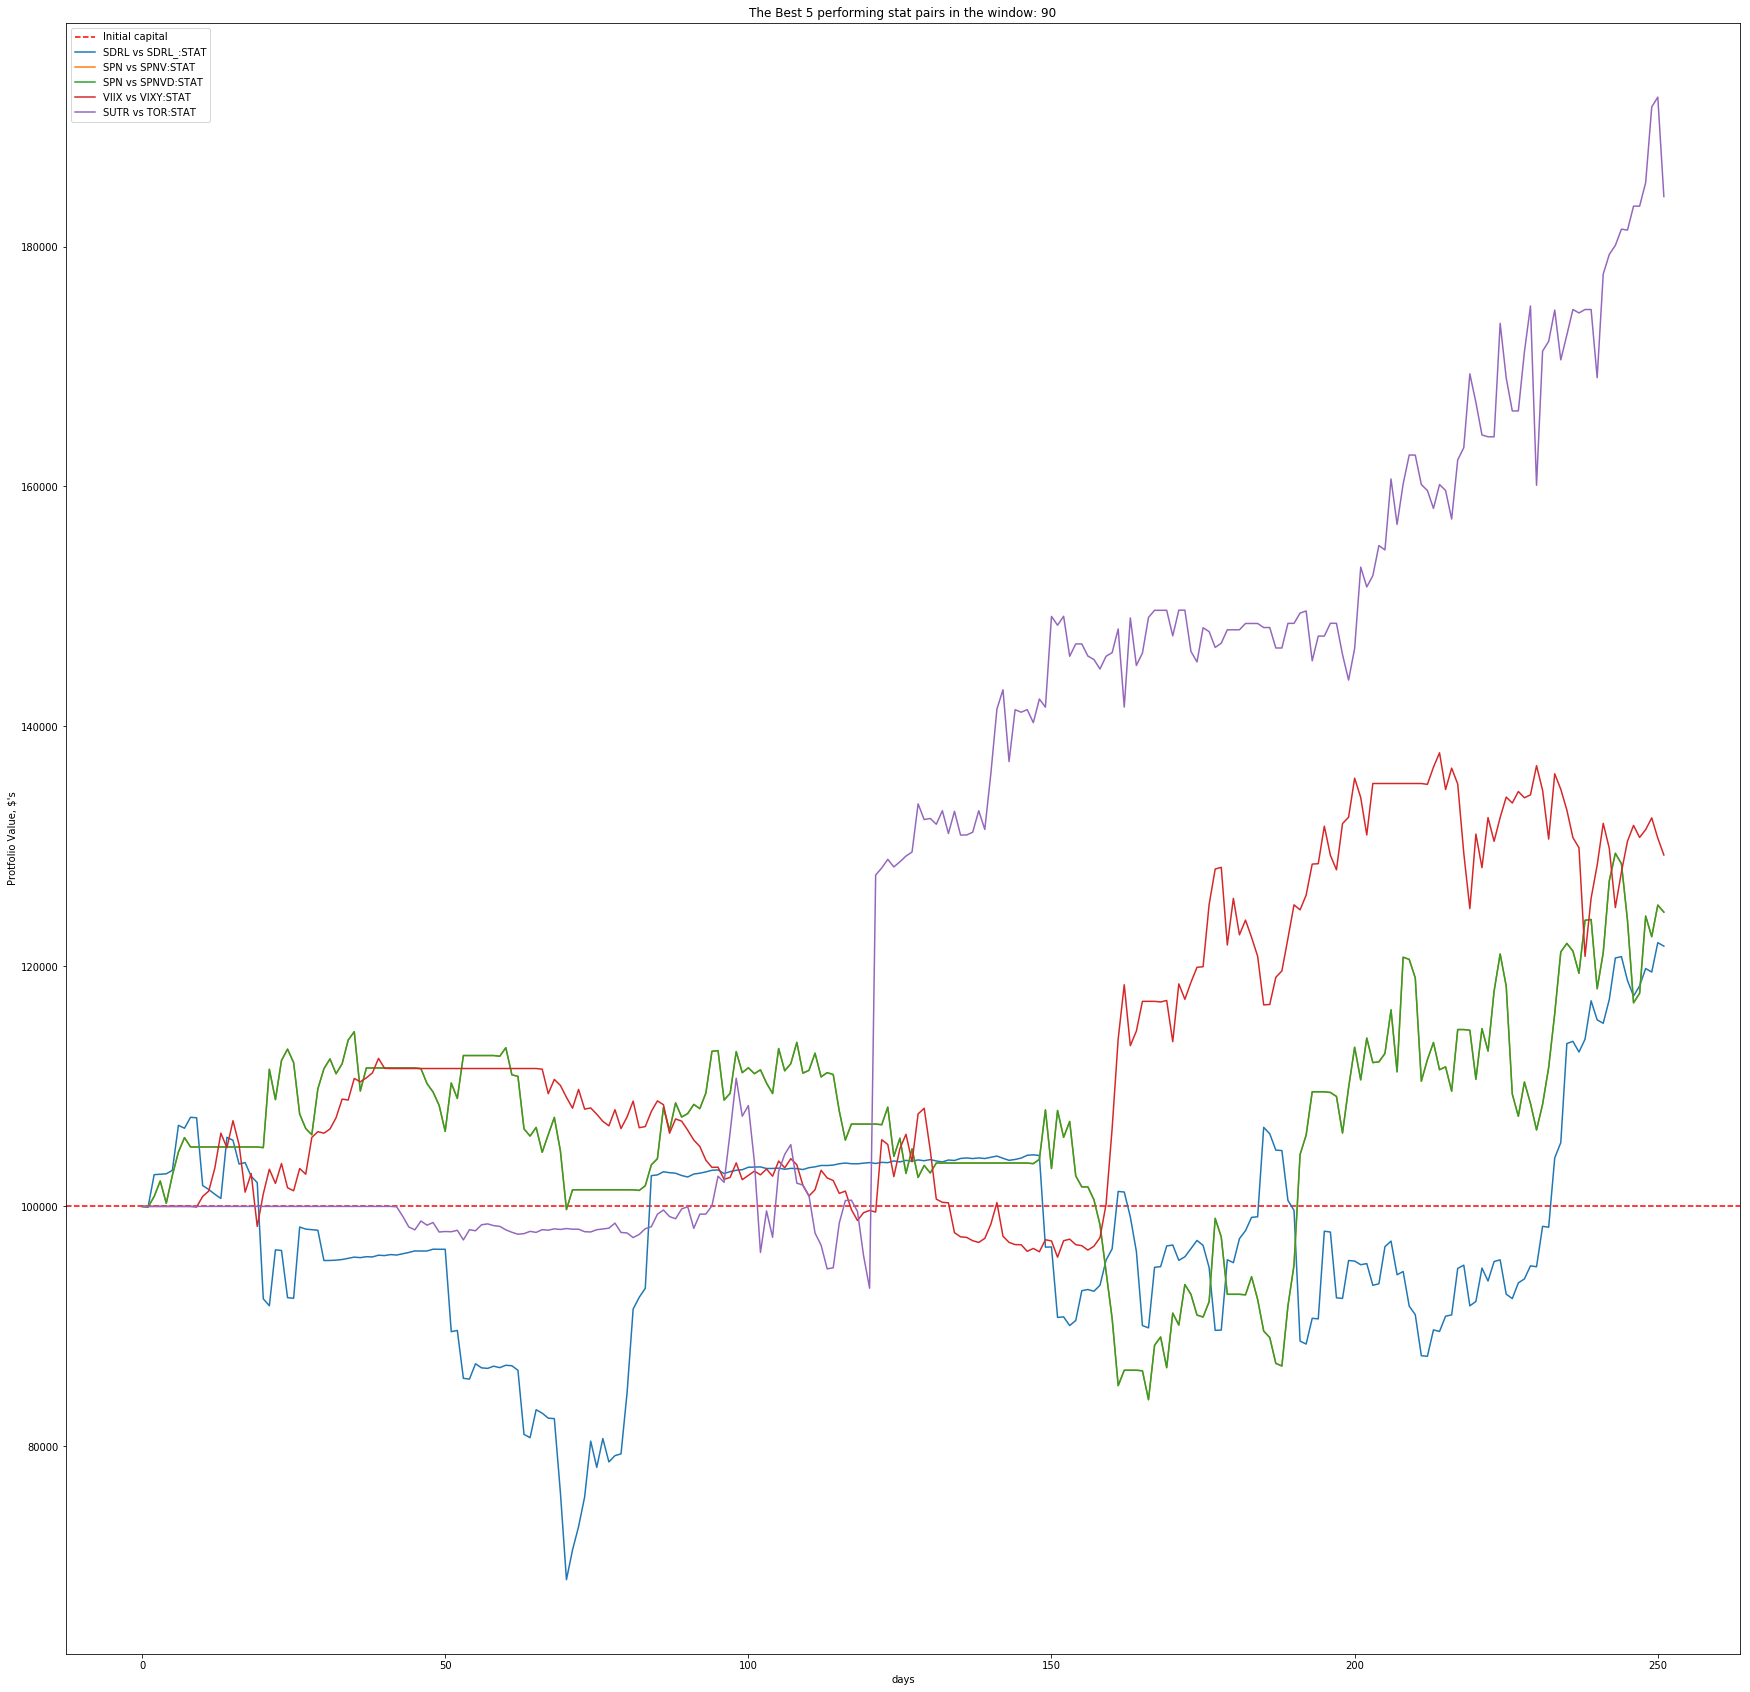

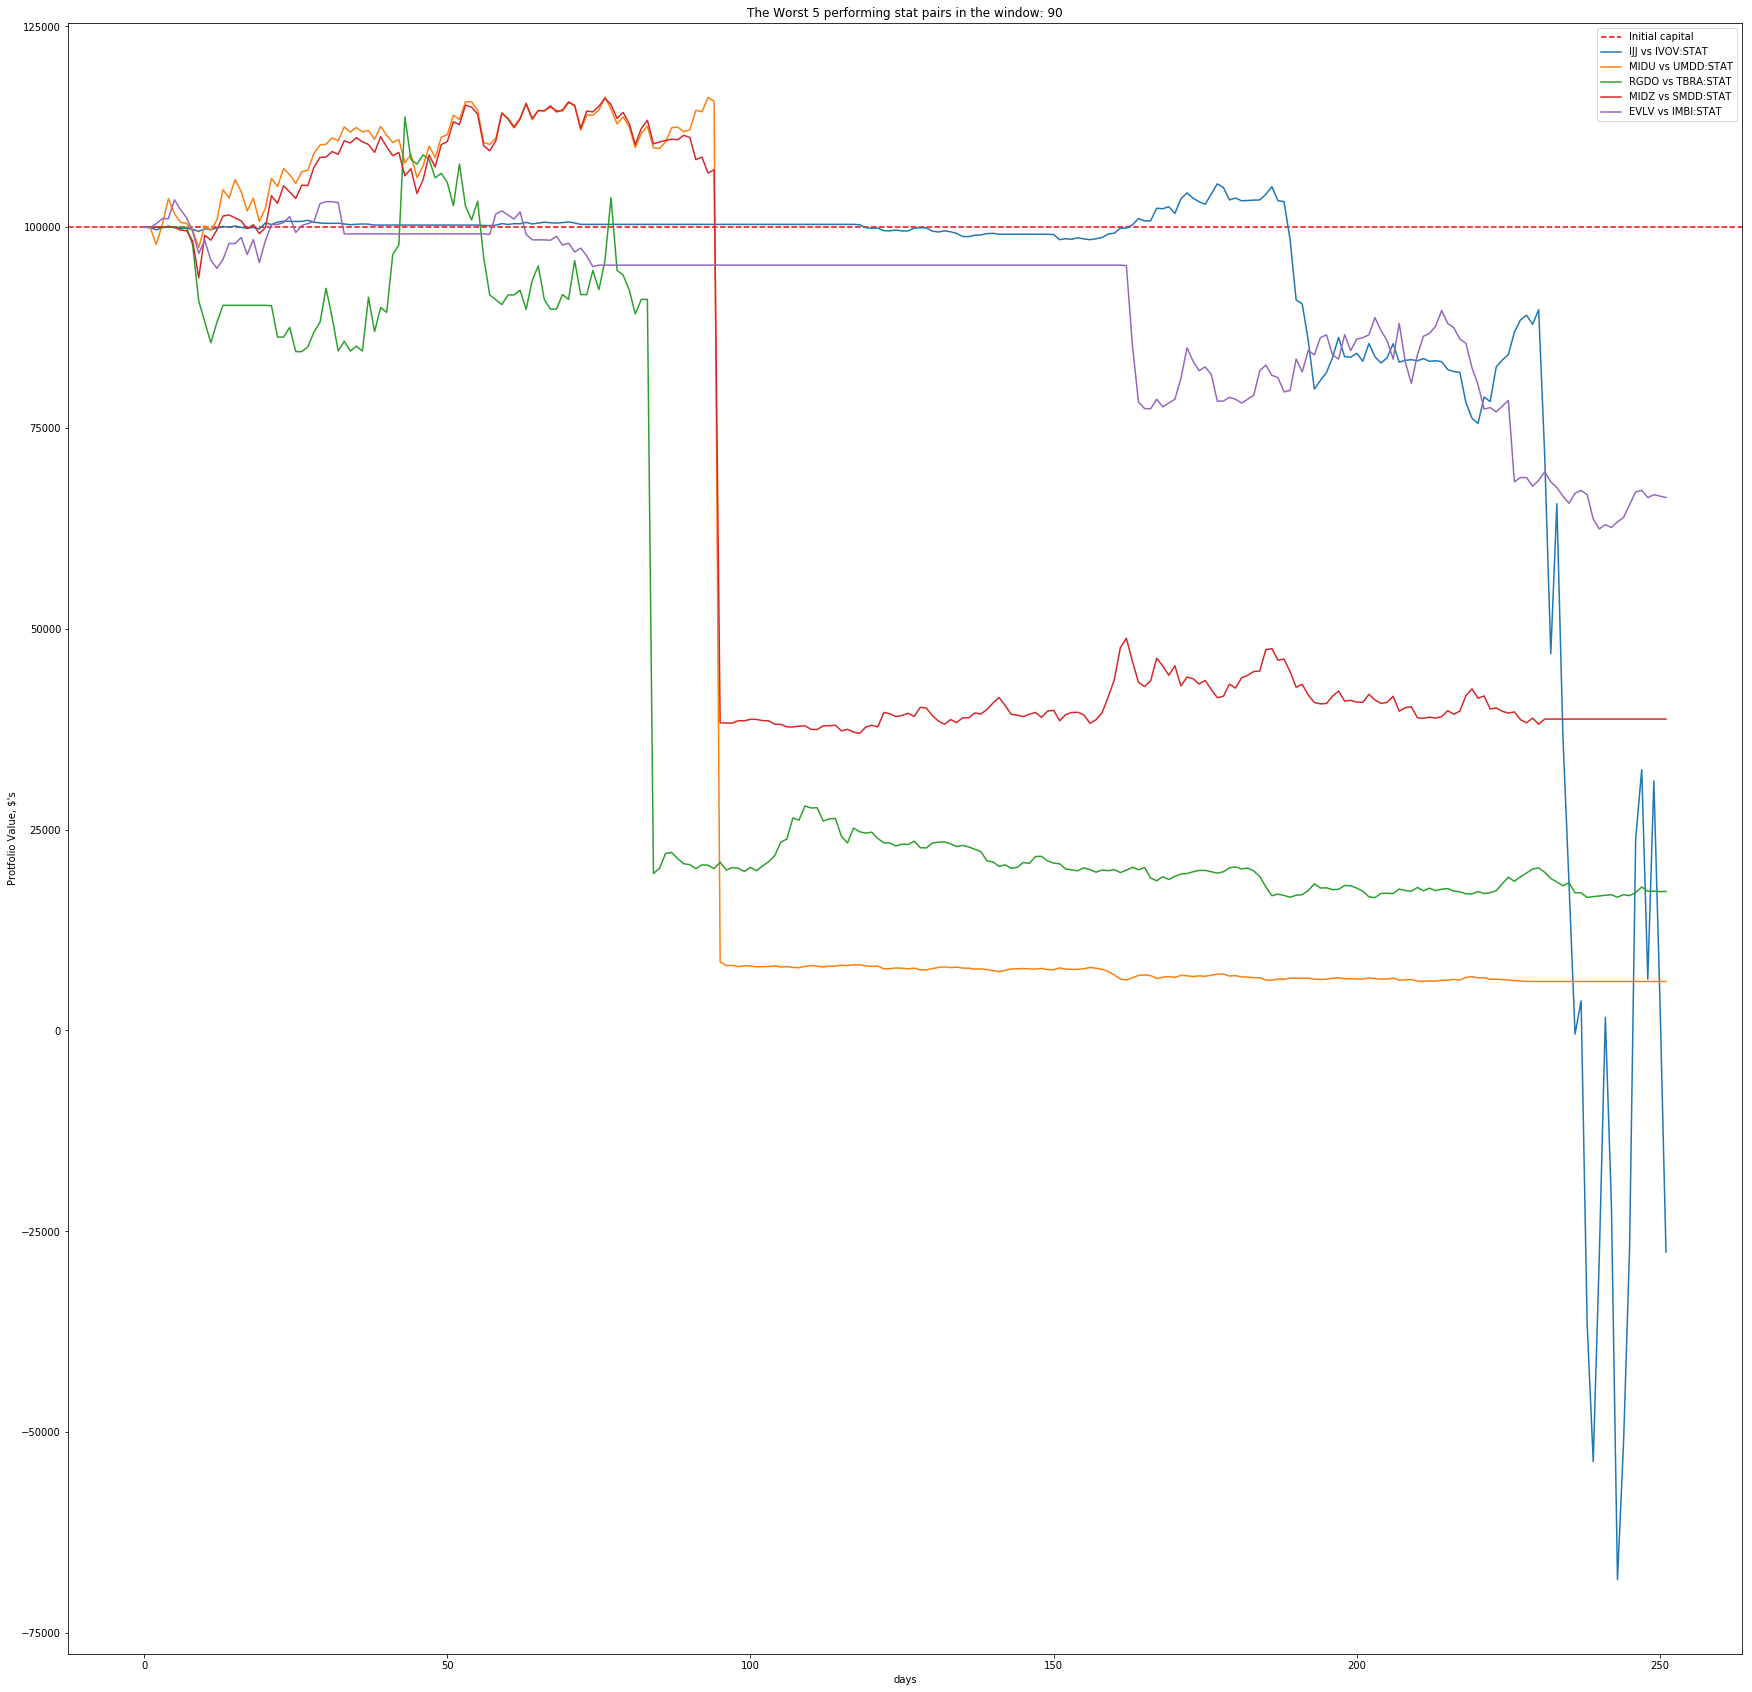

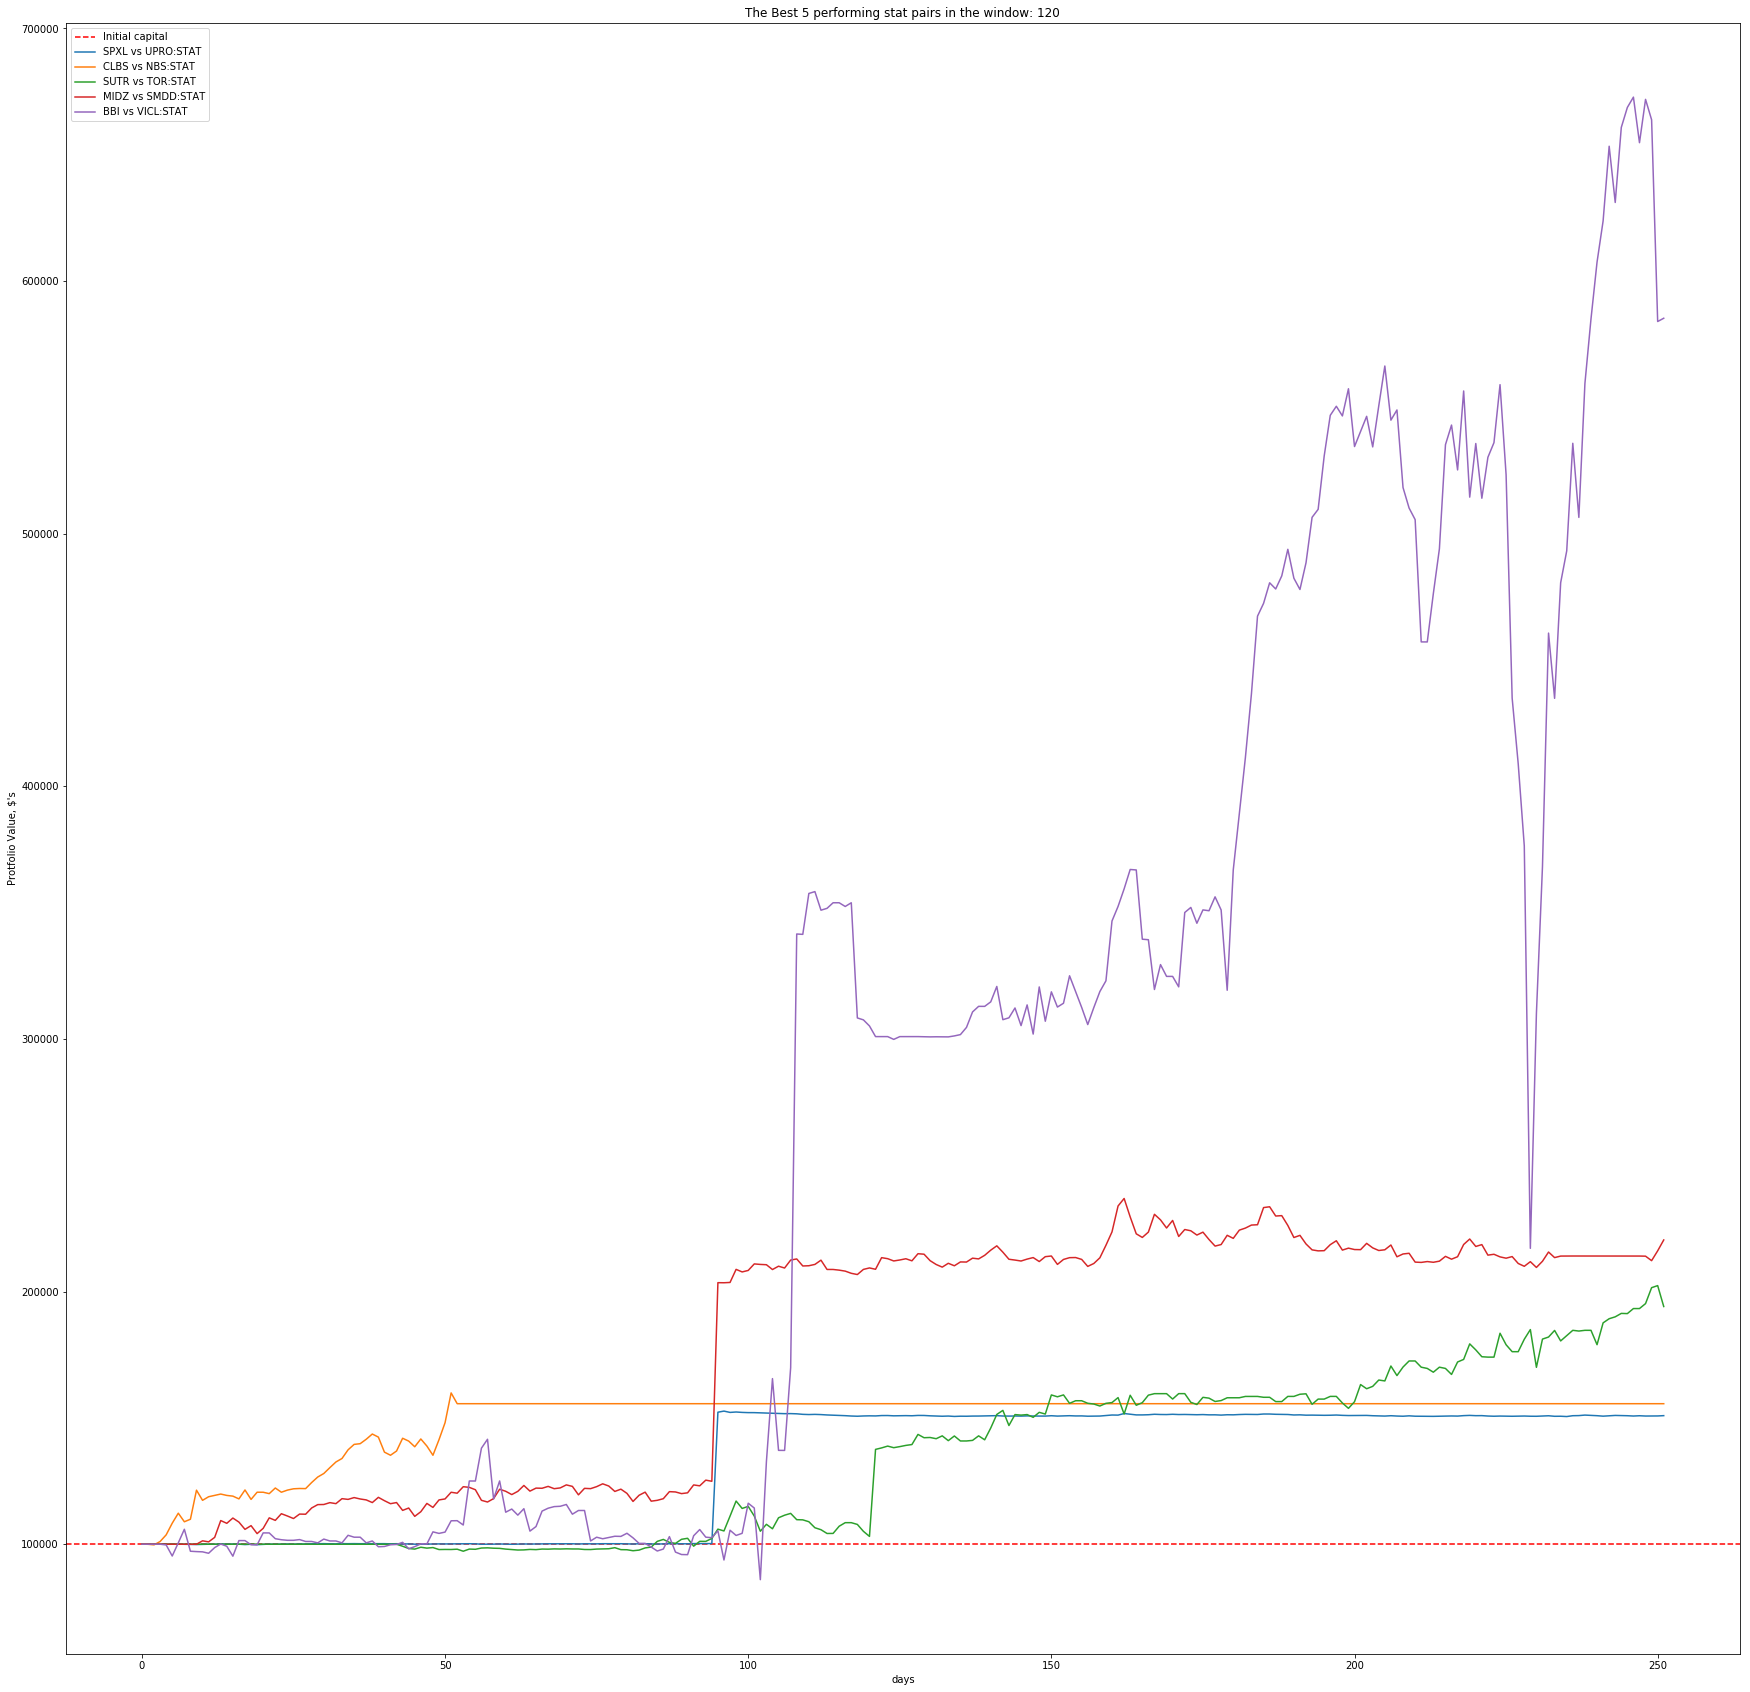

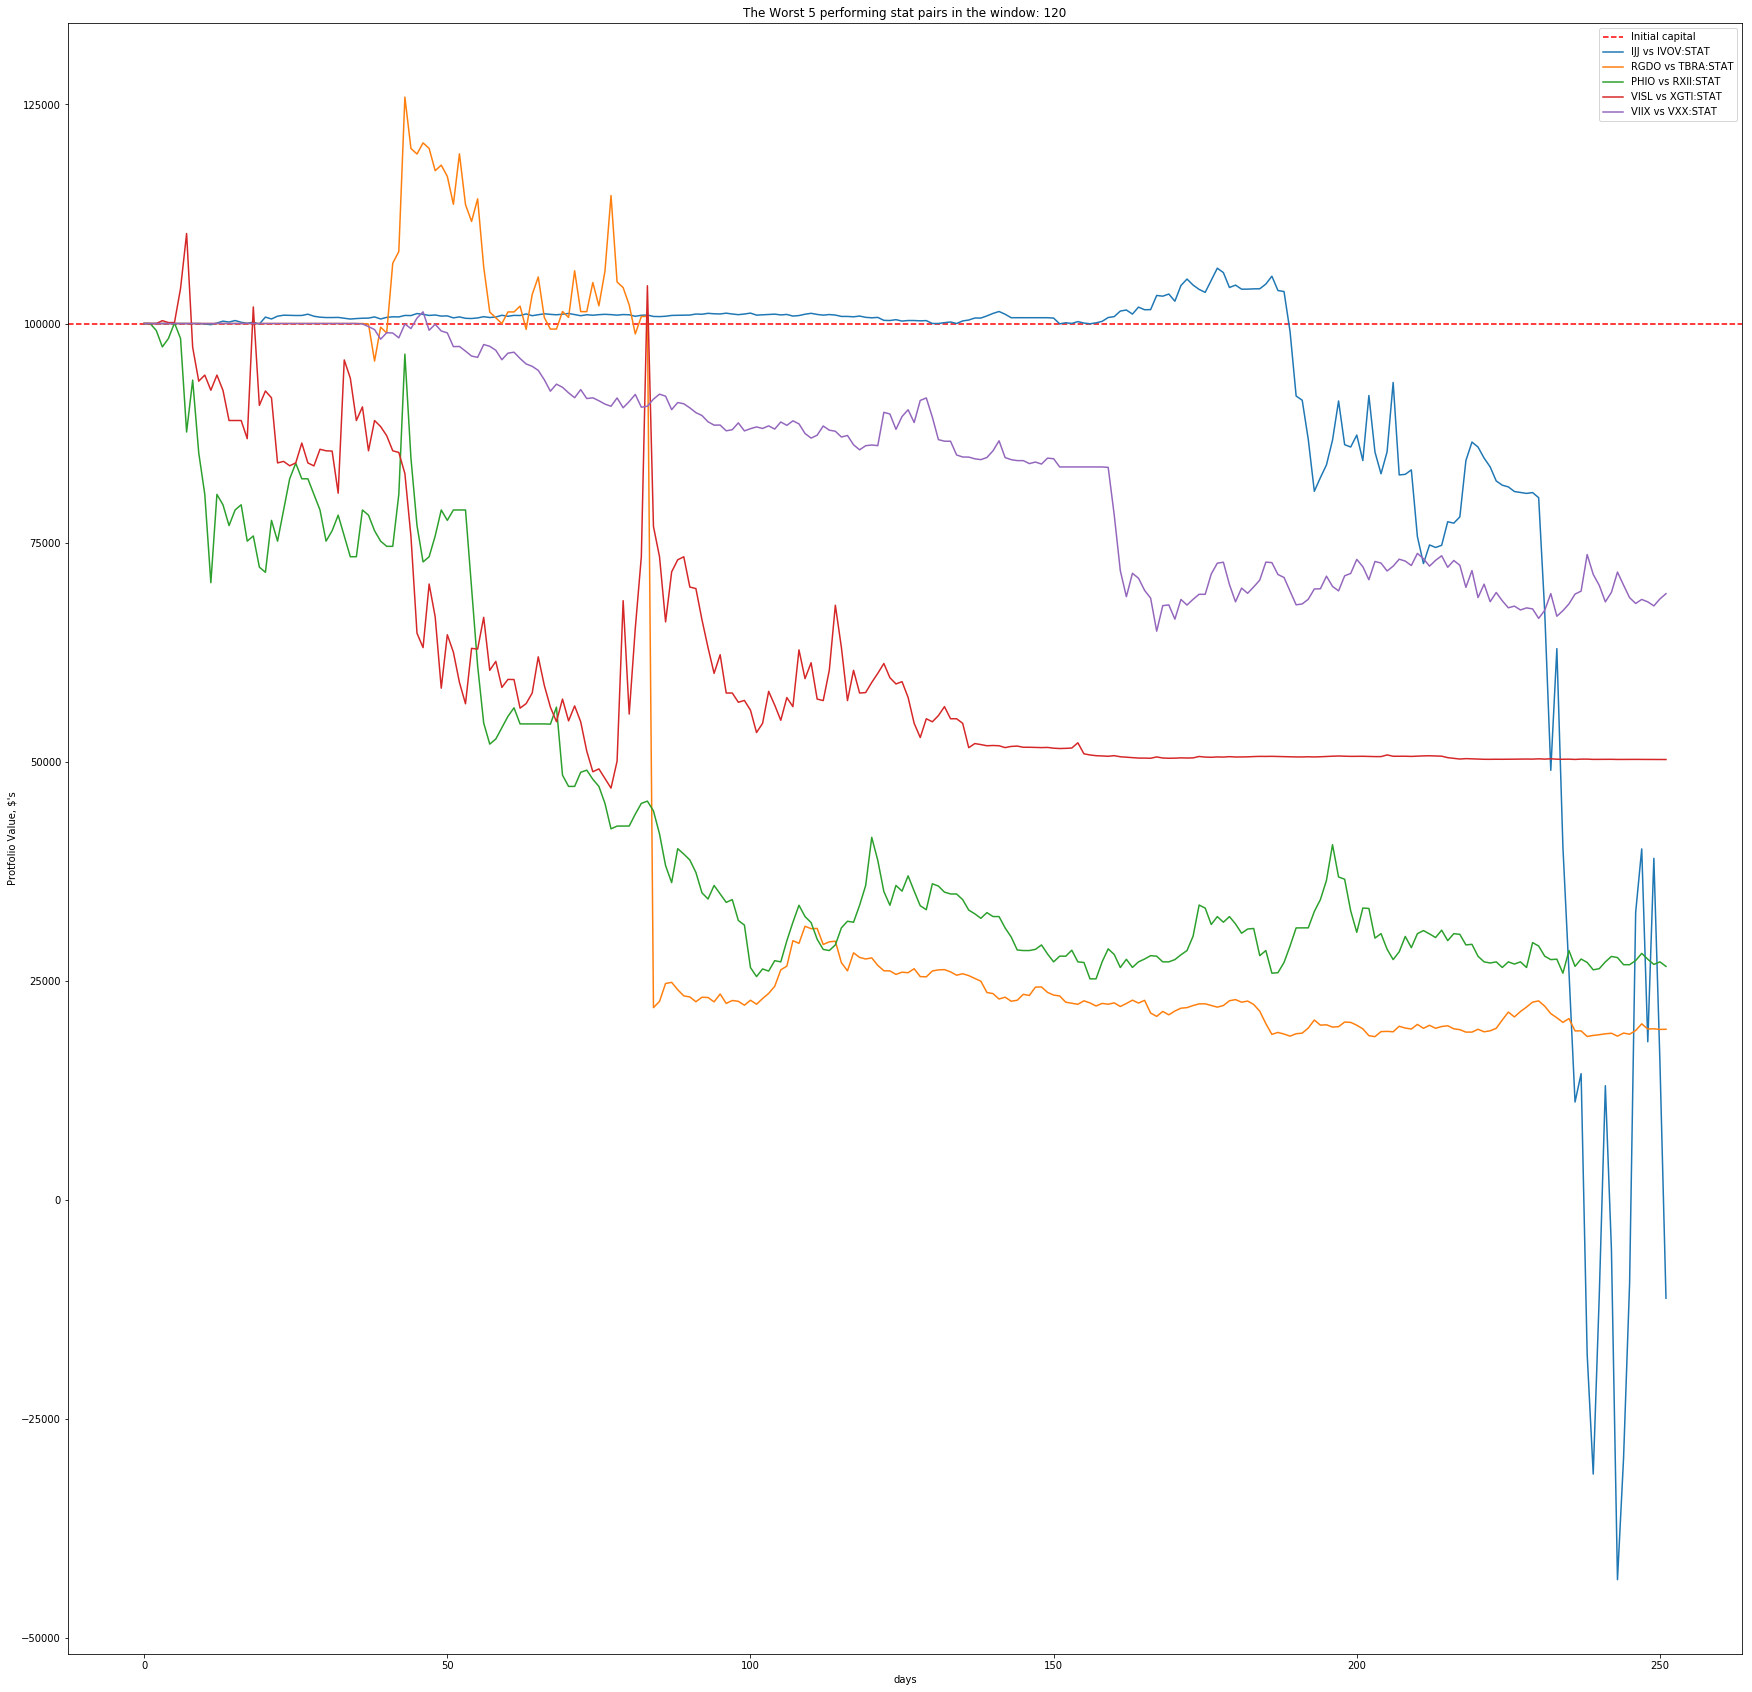

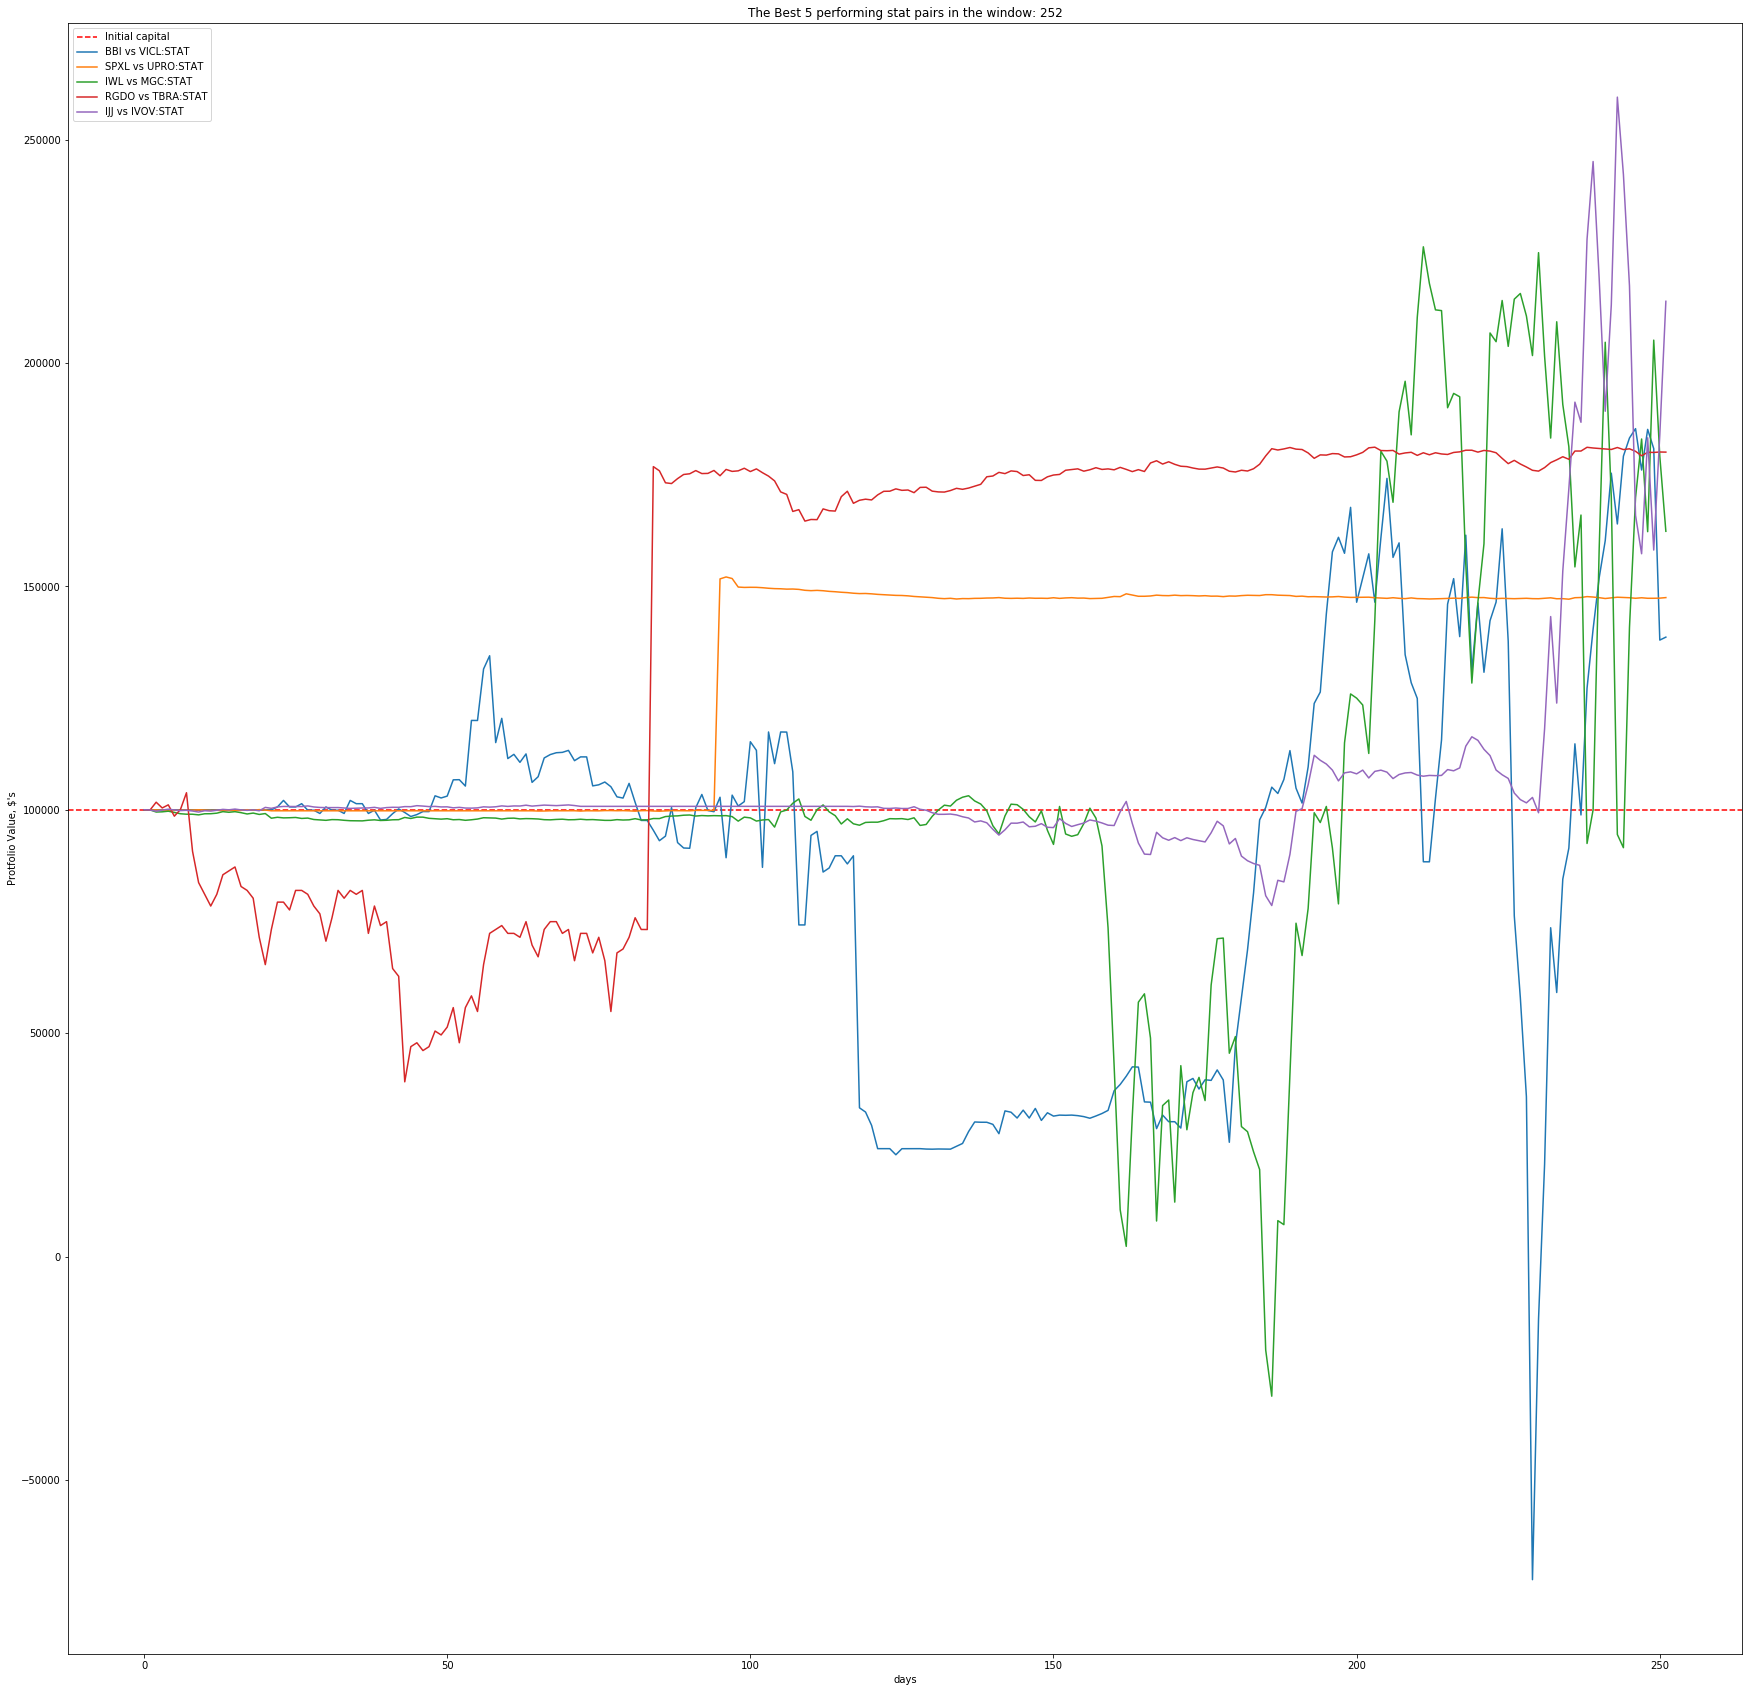

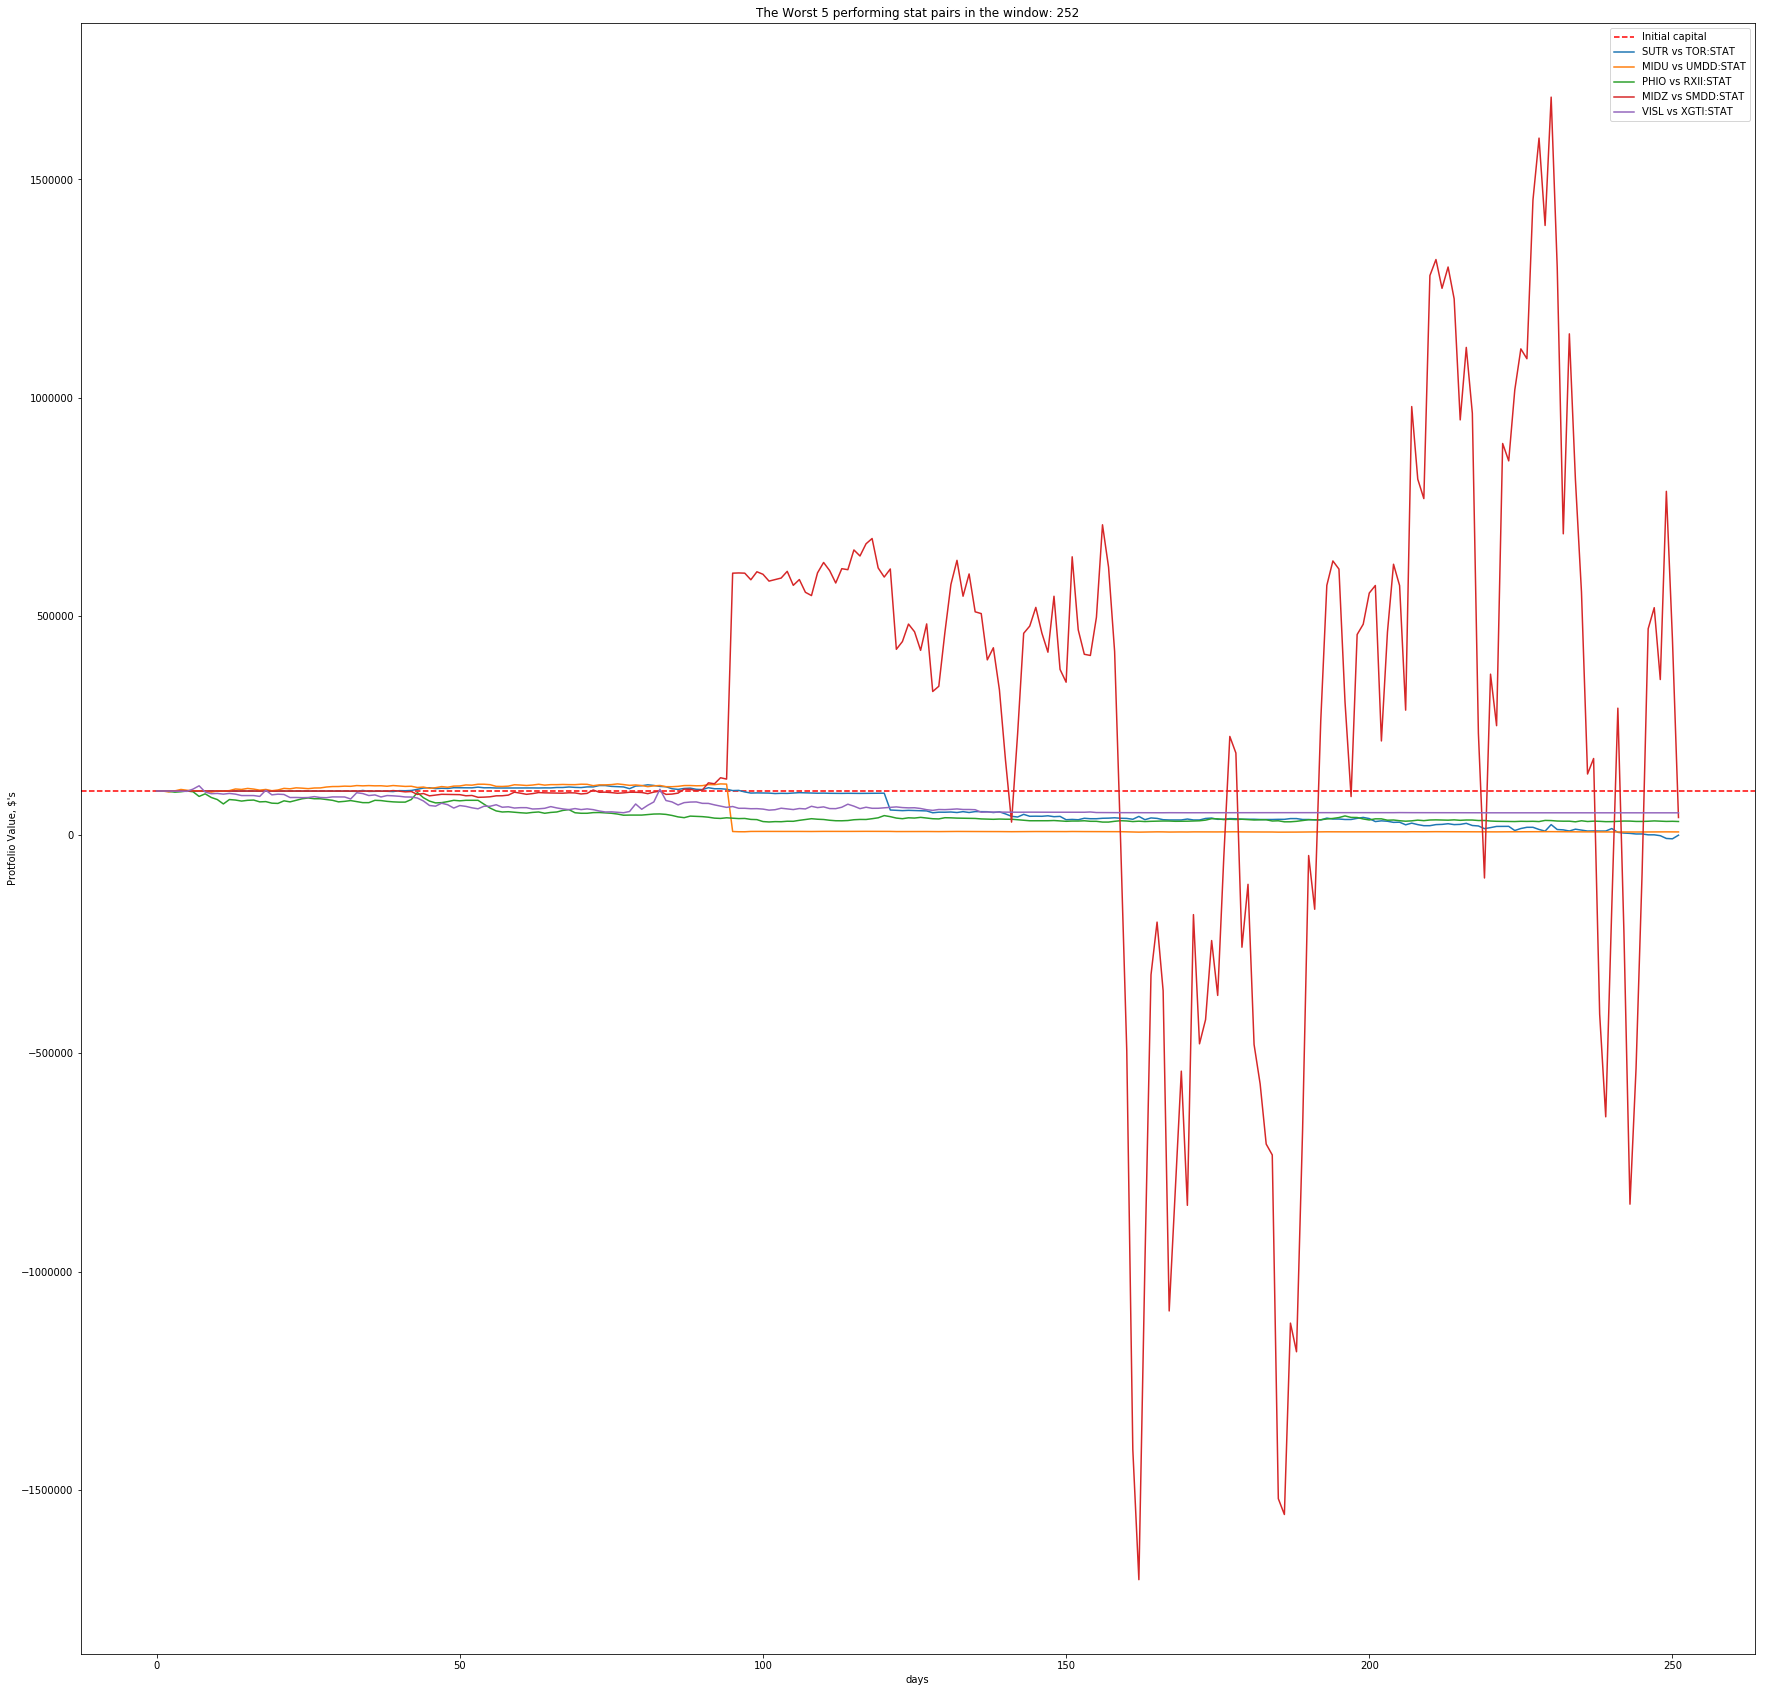

In [8]:
### GETTING STAT AVERAGE RESULTS ### 
stat_average_perf = OrderedDict()
stat_pct_mean = OrderedDict()
stat_pct_std = OrderedDict()
stat_alpha_mean = OrderedDict()
stat_beta_mean = OrderedDict()
stat_sharpe_mean = OrderedDict()
stat_maxdraw_mean = OrderedDict()


best_5_perf_stat = OrderedDict()
worst_5_perf_stat = OrderedDict()

best_5_alpha_stat = OrderedDict()
best_5_beta_stat = OrderedDict()
best_5_sharpe_stat = OrderedDict()
best_5_maxdraw_stat = OrderedDict()

worst_5_alpha_stat = OrderedDict()
worst_5_beta_stat = OrderedDict()
worst_5_sharpe_stat = OrderedDict()
worst_5_maxdraw_stat = OrderedDict()

data_len_stat = len(stat_data)

for window in windows:
    stat_average_perf[window] = round(stat_data['perf_' + str(window)].mean(), 2)
    stat_pct_mean[window]     = round(stat_data['pct_' + str(window)].mean(), 2)
    stat_pct_std[window]      = round(stat_data['pct_'+str(window)].std(), 2)
    stat_alpha_mean[window]   = round(stat_data['alpha_' + str(window)].mean(), 2)
    stat_beta_mean[window]    = round(stat_data['beta_' + str(window)].mean(), 2)
    stat_sharpe_mean[window]  = round(stat_data['sharpe_' + str(window)].mean(), 2)
    stat_maxdraw_mean[window] = round(stat_data['maxdraw_' + str(window)].mean(), 2)
    
    d = pd.read_csv(file_data + 'pair_sim_' + str(window)+'.csv')
    best_idx = [stat_data['perf_'+str(window)].sort_values()[data_len_stat-5:data_len_stat].index[i] for i in range(5)]
    worst_idx = [stat_data['perf_'+str(window)].sort_values()[:5].index[i] for i in range(5)]
    
    best_5_perf_stat[window] = [(best_idx[i], d[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_perf_stat[window] = [(worst_idx[i], d[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_5_alpha_stat[window] = [(best_idx[i], stat_data['alpha_' + str(window)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_alpha_stat[window] = [(worst_idx[i], stat_data['alpha_' + str(window)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_5_beta_stat[window] = [(best_idx[i], stat_data['beta_' + str(window)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_beta_stat[window] = [(worst_idx[i], stat_data['beta_' + str(window)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

    best_5_sharpe_stat[window] = [(best_idx[i], stat_data['sharpe_' + str(window)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_sharpe_stat[window] = [(worst_idx[i], stat_data['sharpe_' + str(window)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
     
    best_5_maxdraw_stat[window] = [(best_idx[i], stat_data['maxdraw_' + str(window)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_maxdraw_stat[window] = [(worst_idx[i], stat_data['maxdraw_' + str(window)].loc[best_idx[i]]) for i in range(len(worst_idx))]

colnames = ['average portfolio value', 'average percentage change', 'average standard deviation',
            'average alpha', 'average beta', 'average sharpe ratio', 'average max drawdown']

list_of_dicts = [stat_average_perf,stat_pct_mean, stat_pct_std,
                 stat_alpha_mean, stat_beta_mean,stat_sharpe_mean, stat_maxdraw_mean ]

main_df = pd.DataFrame()
main_df['window'] = pd.Series(windows)

for i in range(len(list_of_dicts)):
    df = pd.DataFrame(data=list(list_of_dicts[i].items()) , columns=['window', colnames[i]] )
    main_df = pd.concat([main_df, df[colnames[i]]], axis=1)
main_df.to_latex(buf=file_data+'stat-perf-windows.txt', index=False)
    

for window in windows:
    fig, ax = plt.subplots(figsize = (30, 30))
    ax.set_ylabel("Protfolio Value, $'s")
    ax.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')
    plt.title('The Best 5 performing stat pairs in the window: {}'.format(window))
    
    for i in range(len(best_5_perf_stat[window])):
        ax.plot(best_5_perf_stat[window][i][1])
    plt.legend(loc='best')
    plt.savefig(fname=file_data + '/PLOTS/STAT/best_5_stat_window_' + str(window) + '.png')
    plt.show()
    
    fig1, ax1 = plt.subplots(figsize = (30, 30))
    ax1.set_ylabel("Protfolio Value, $'s")
    ax1.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')    
    for i in range(len(worst_5_perf_stat[window])):
        ax1.plot(worst_5_perf_stat[window][i][1])
        plt.title('The Worst 5 performing stat pairs in the window: {}'.format(window))
    plt.legend(loc='best')
    plt.savefig(fname=file_data + 'PLOTS/STAT/worst_5_stat_window_' + str(window) + '.png')
    plt.show() 

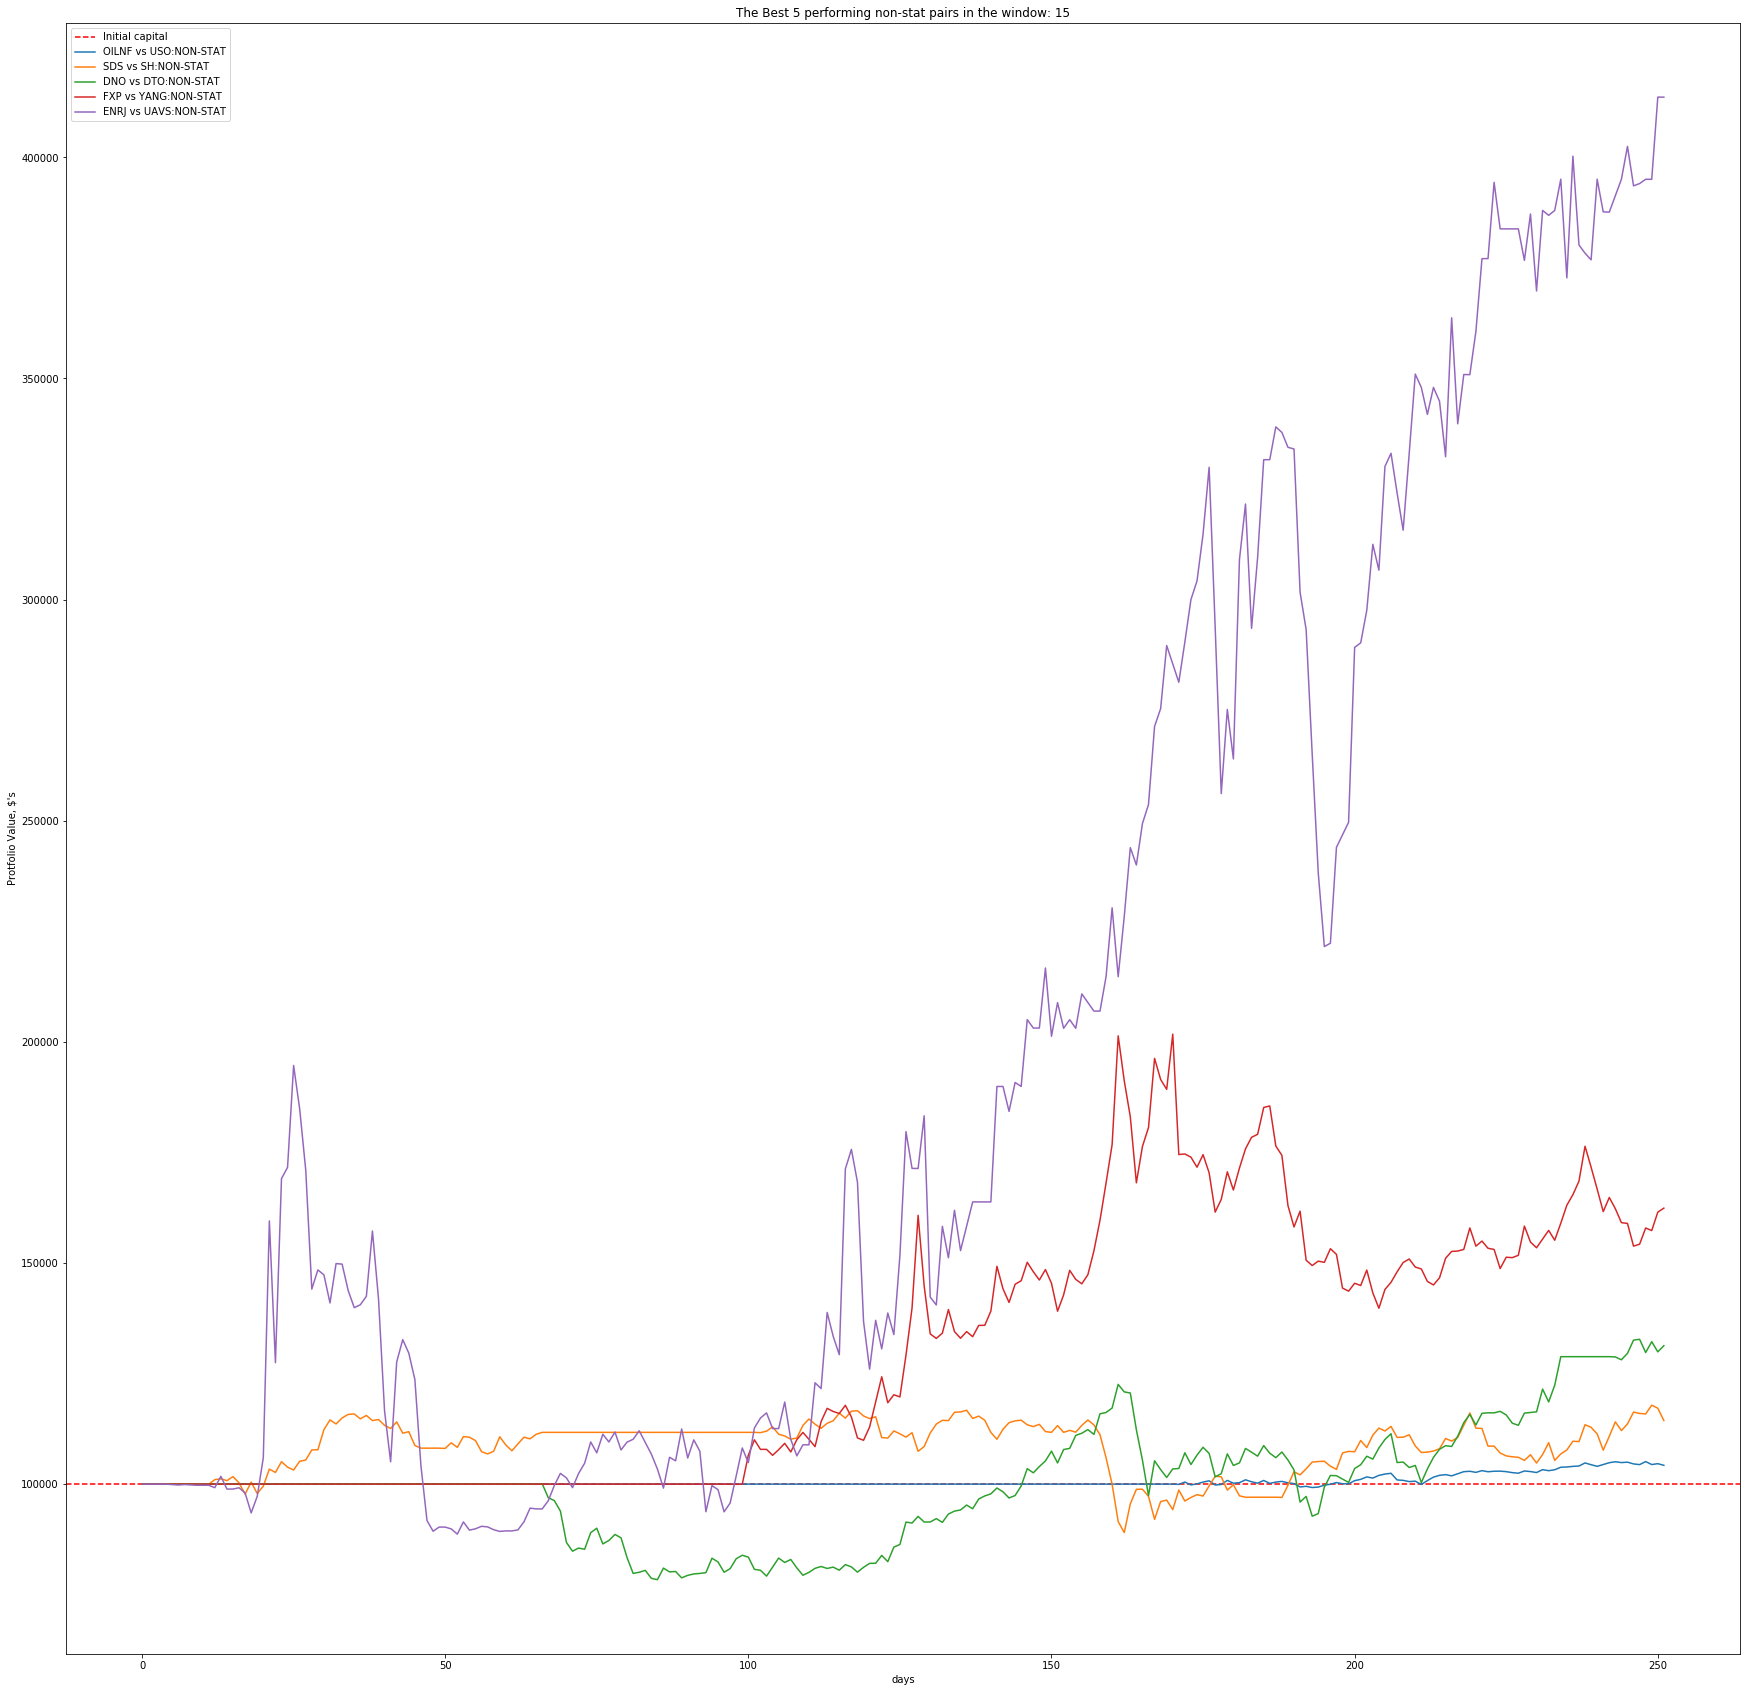

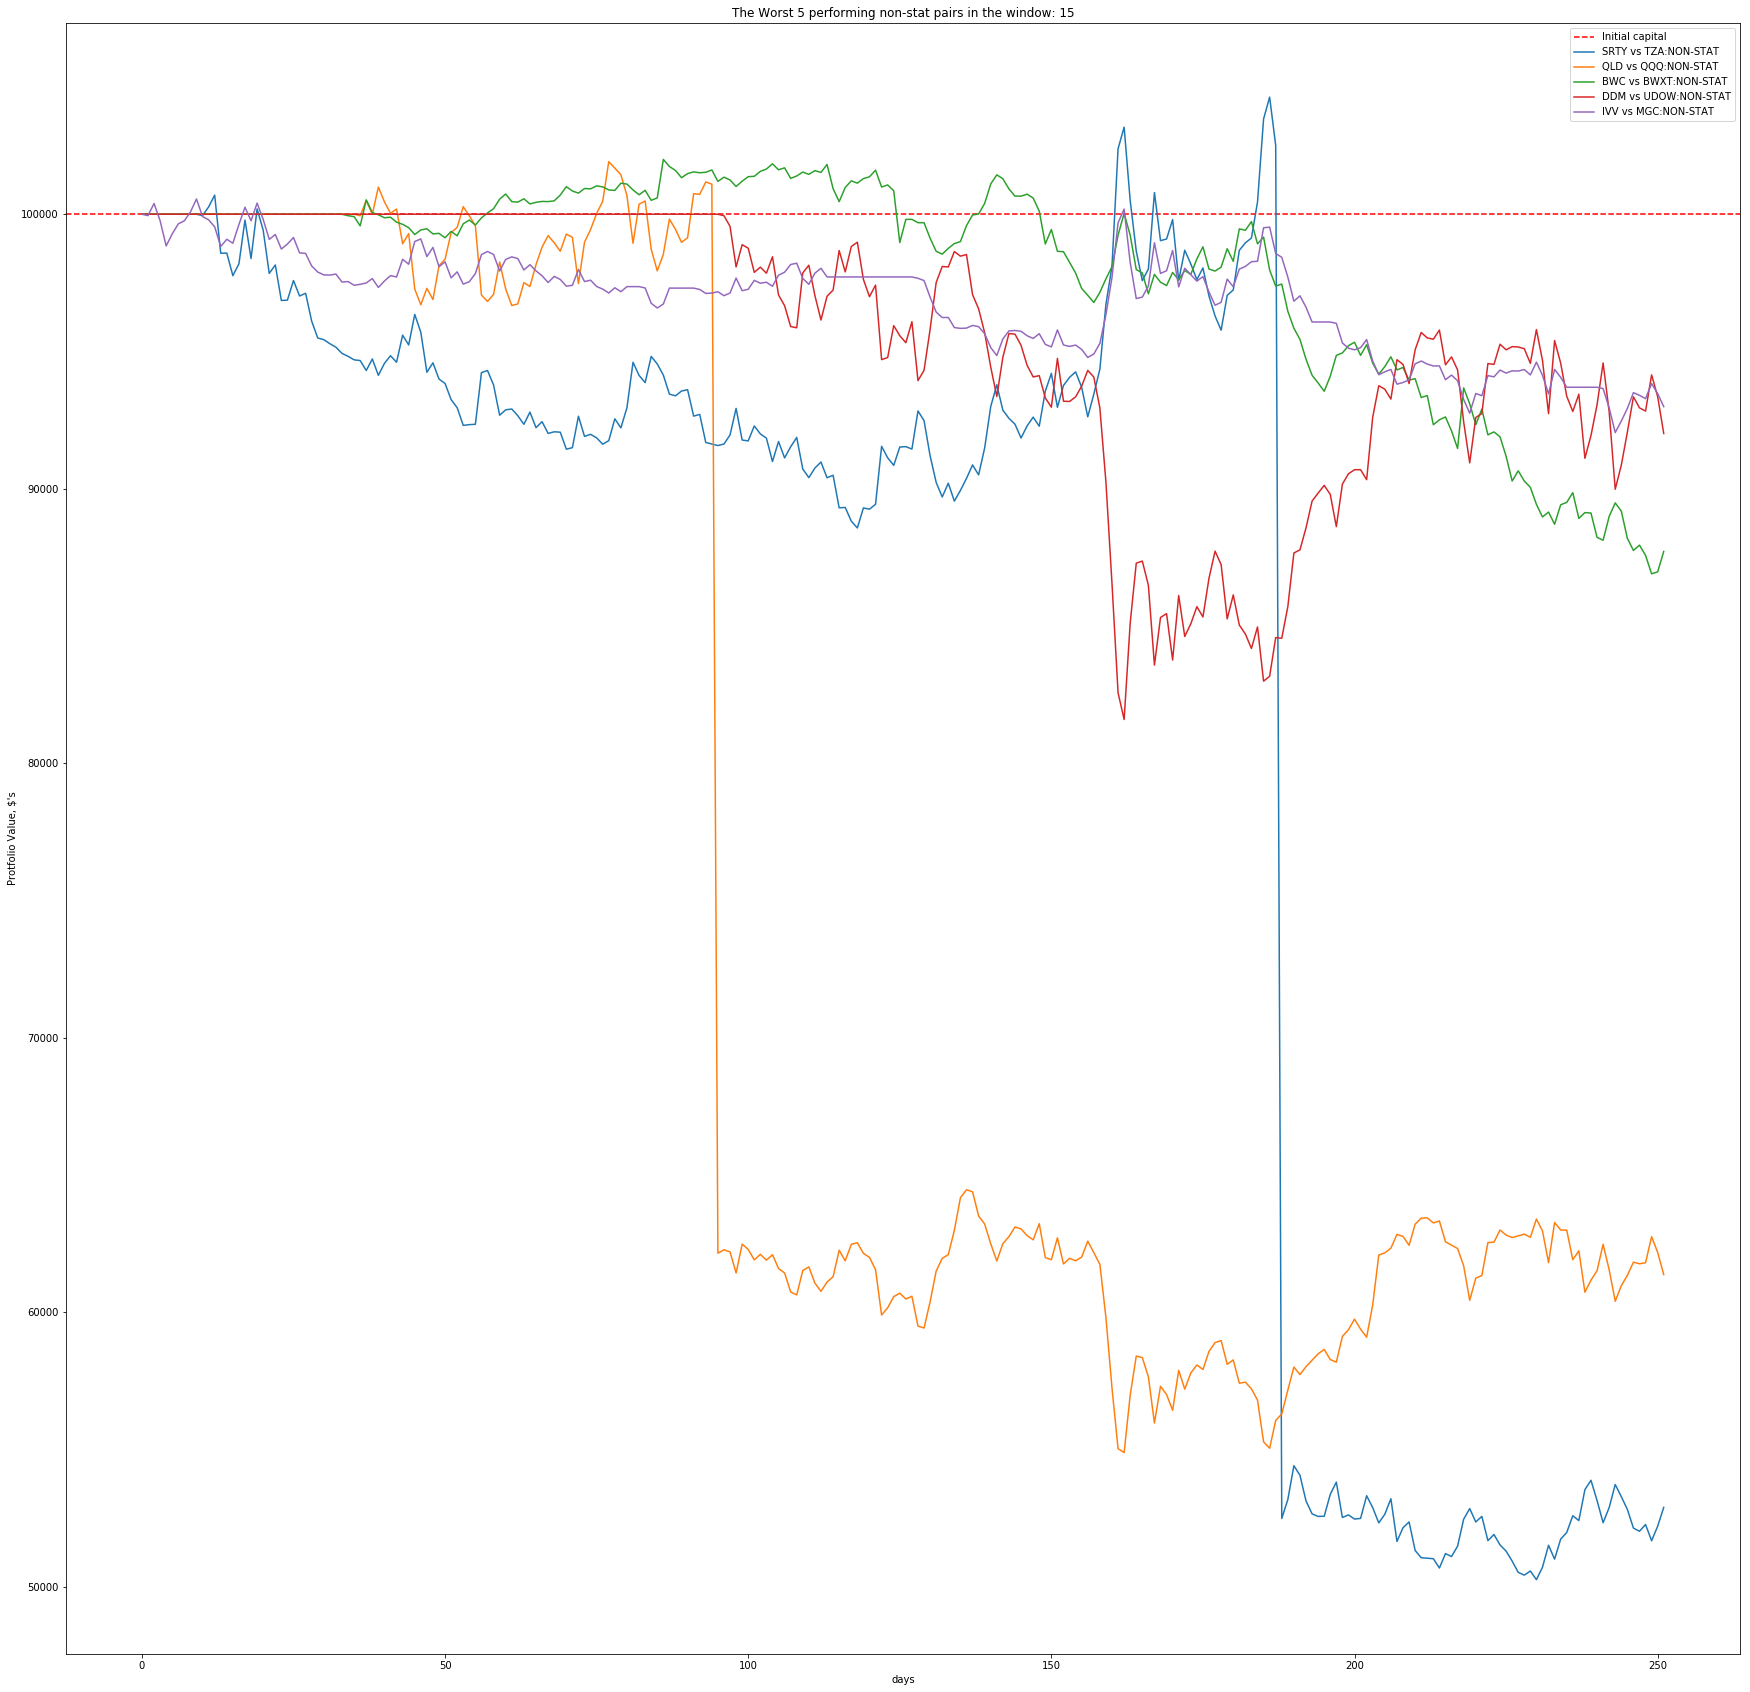

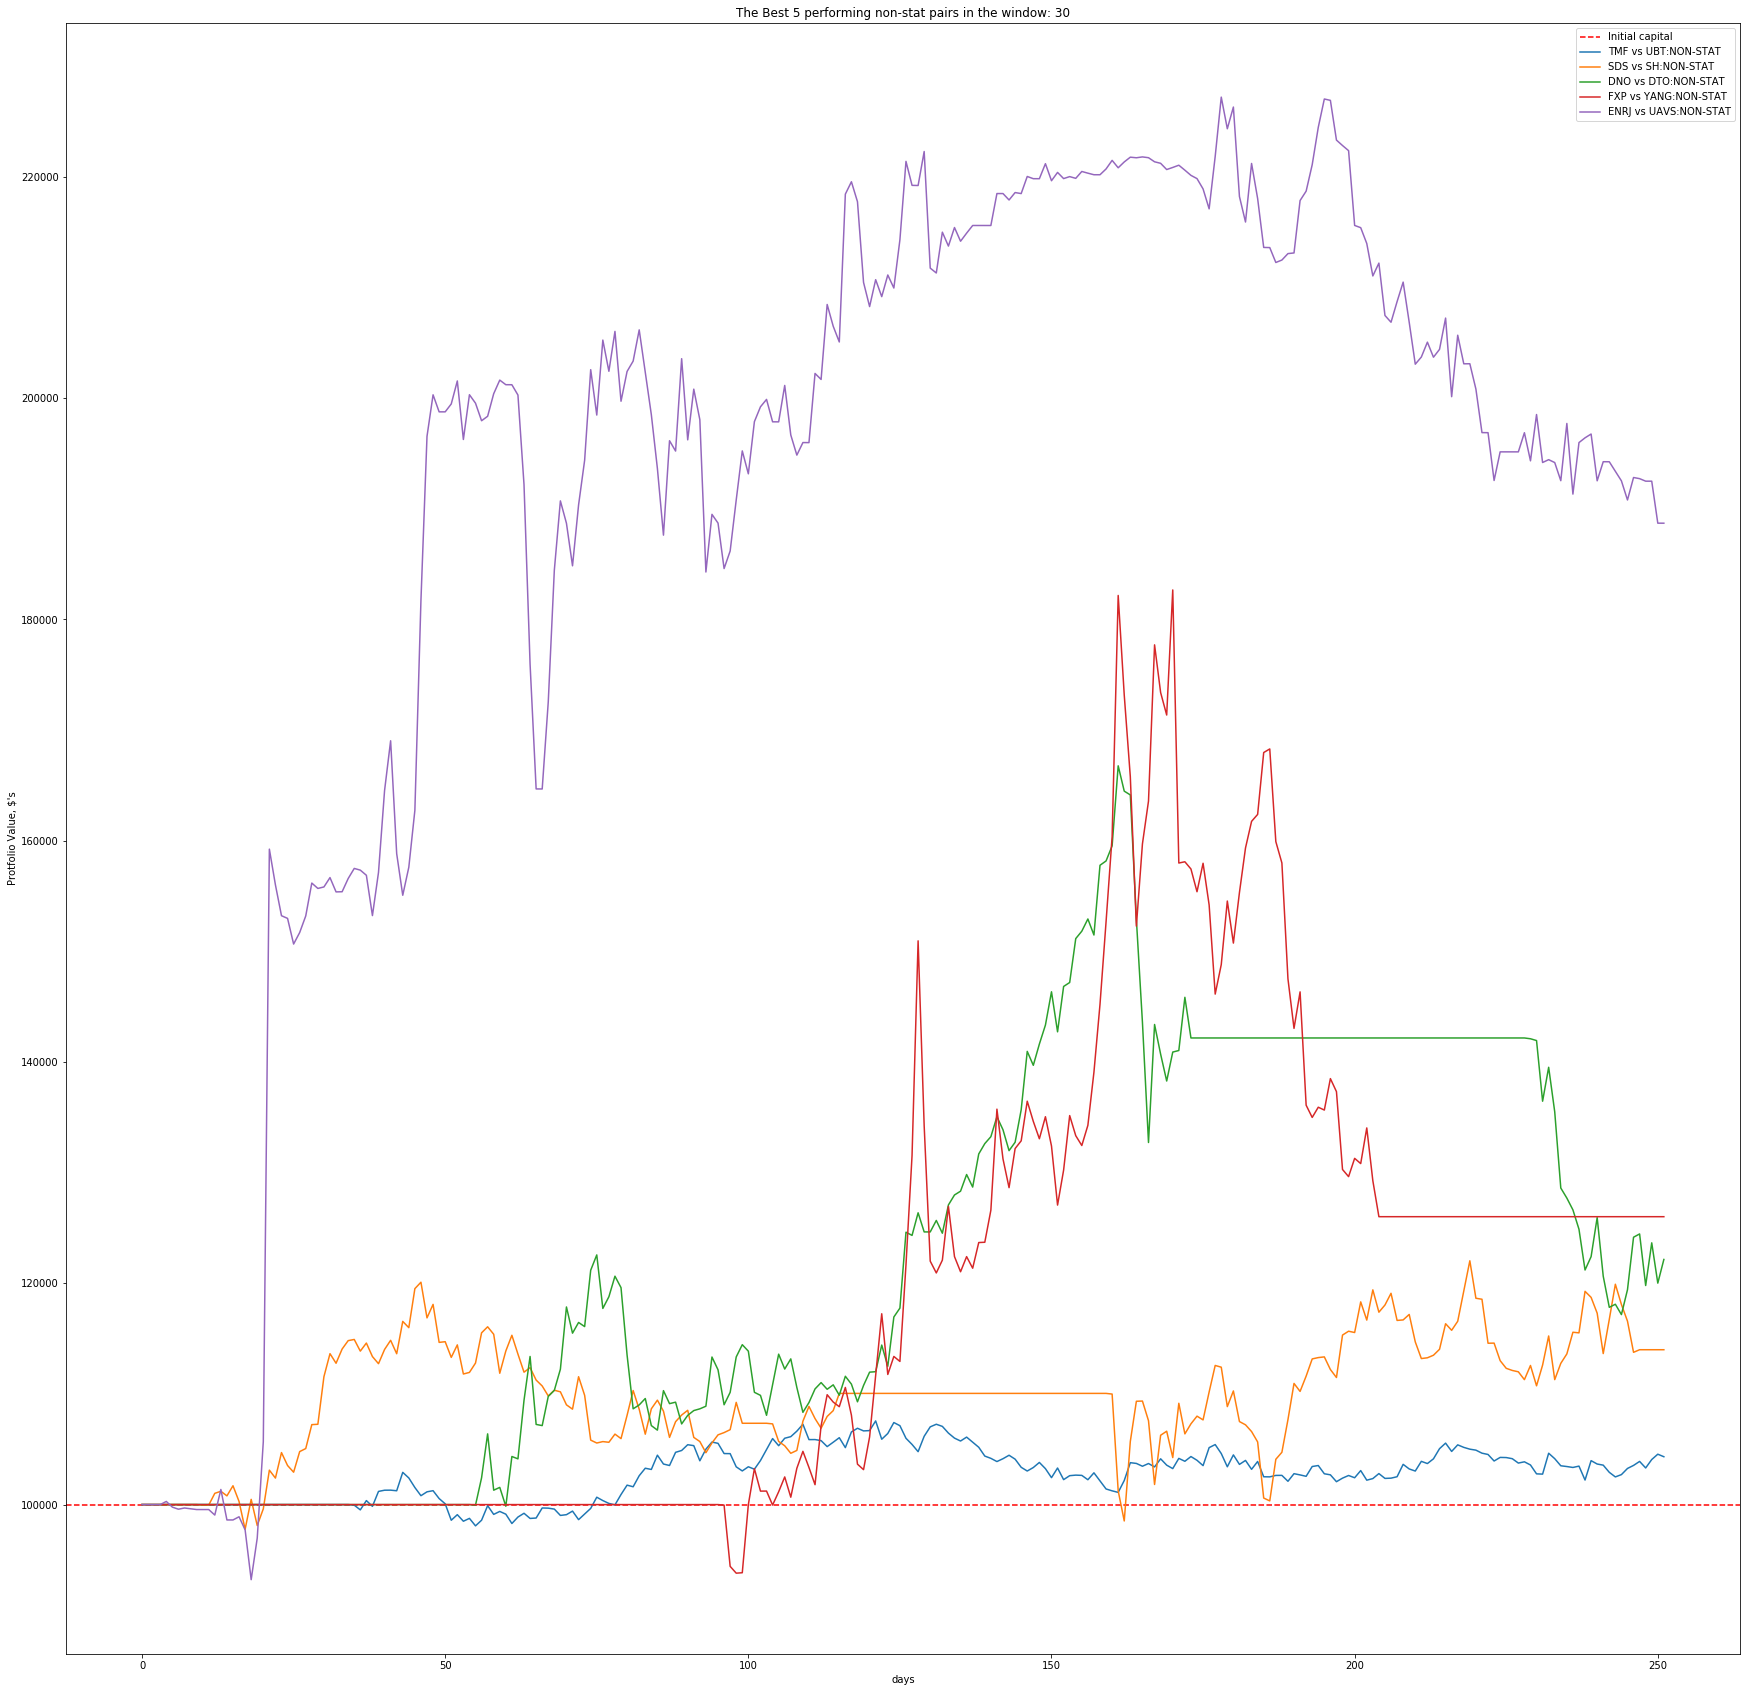

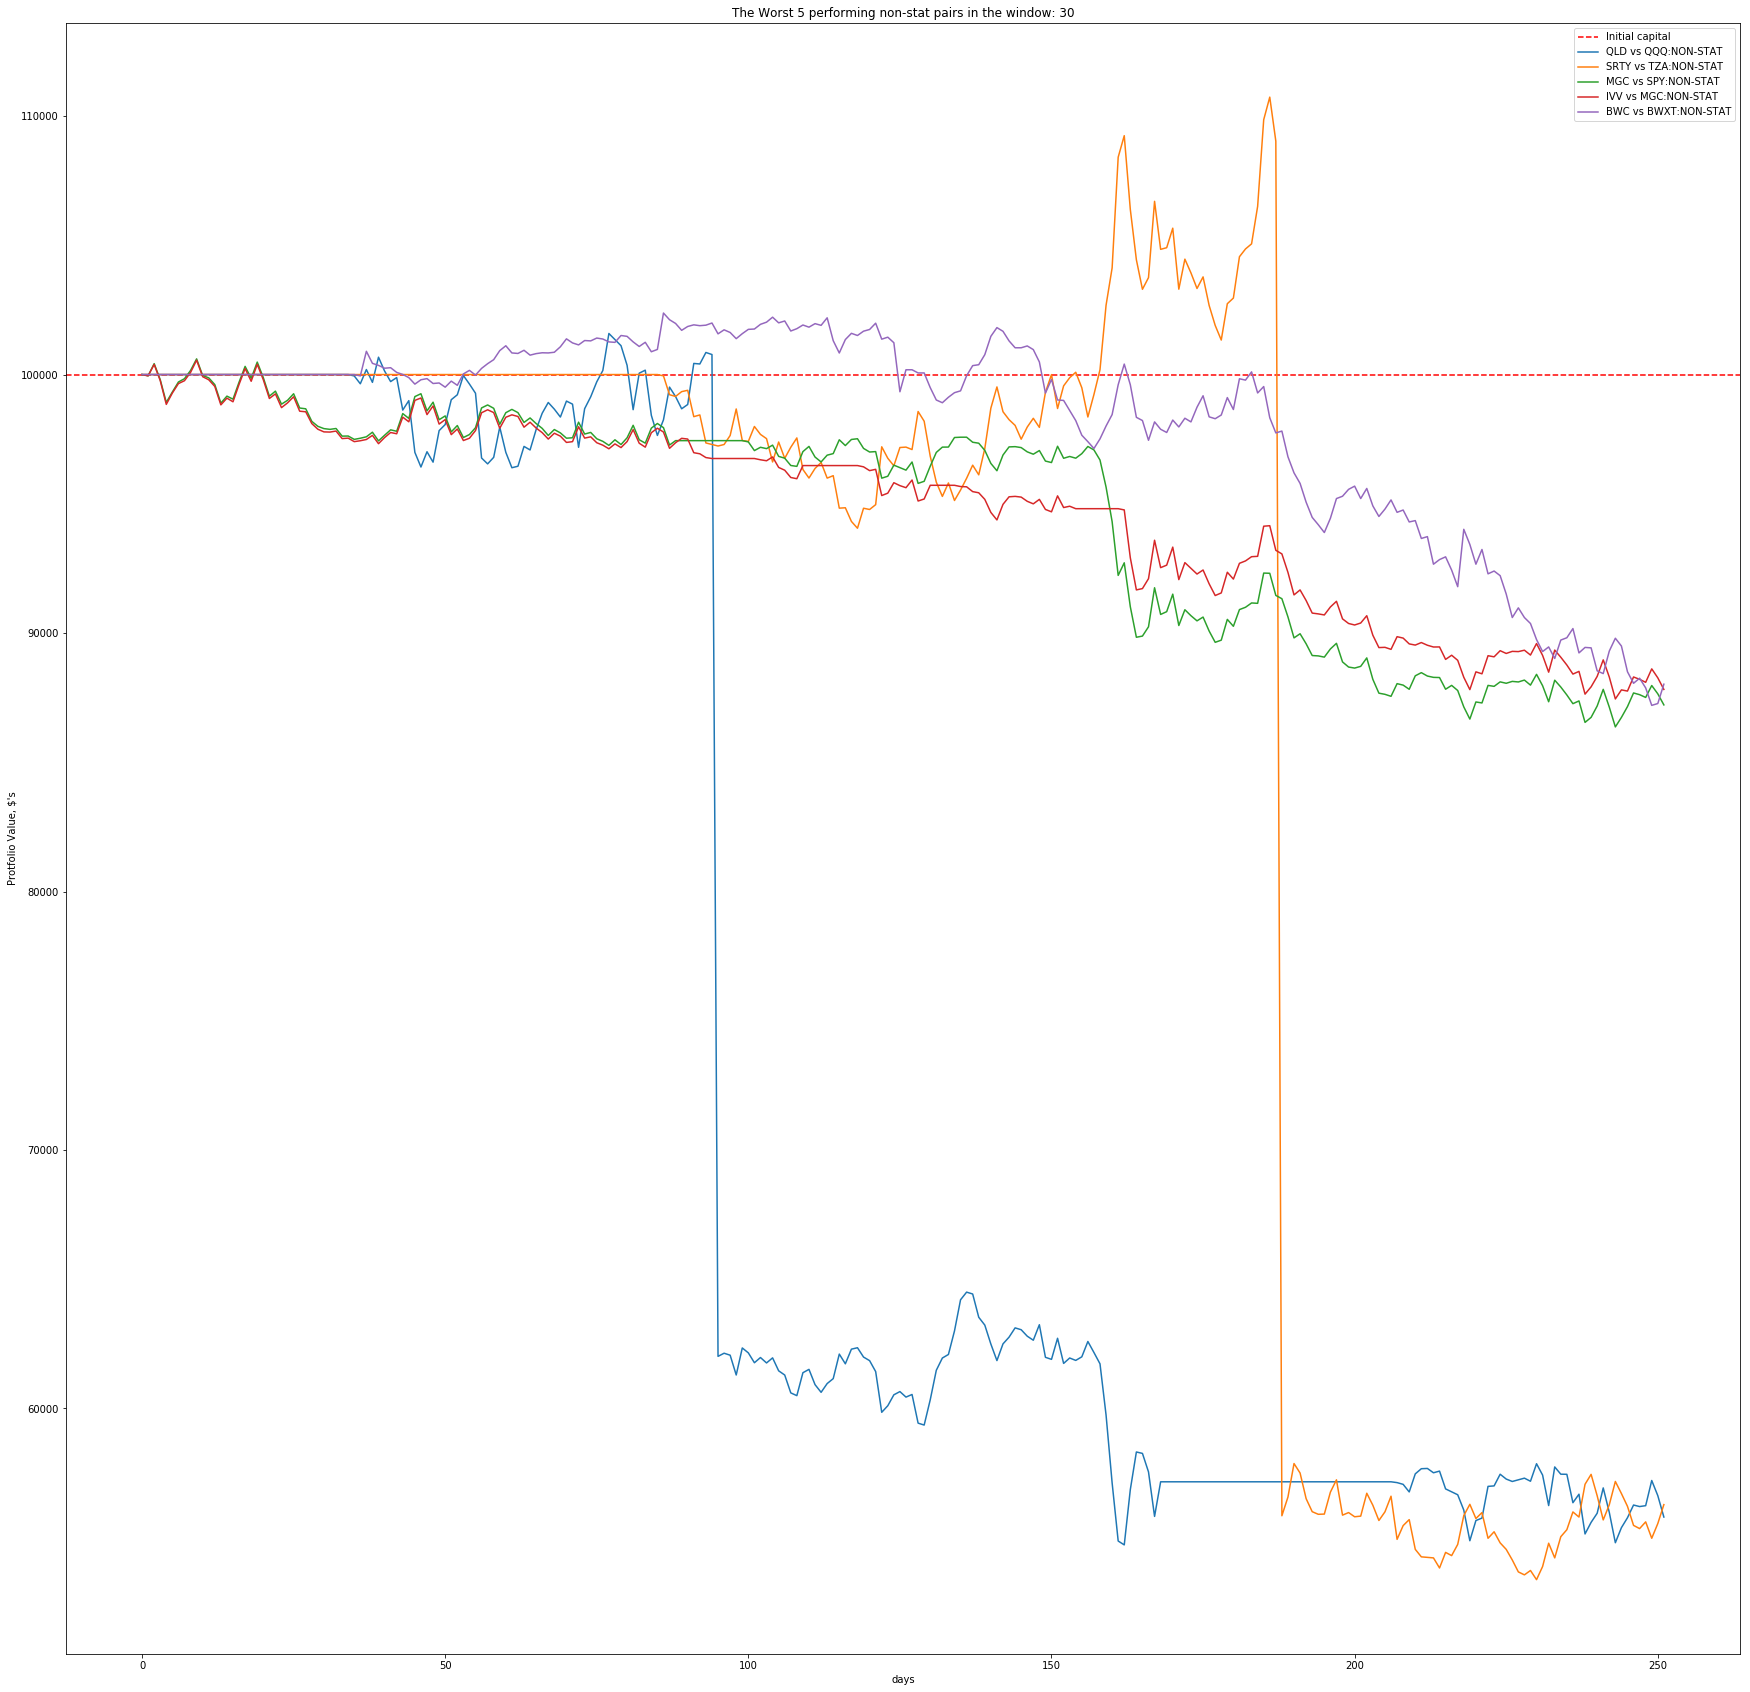

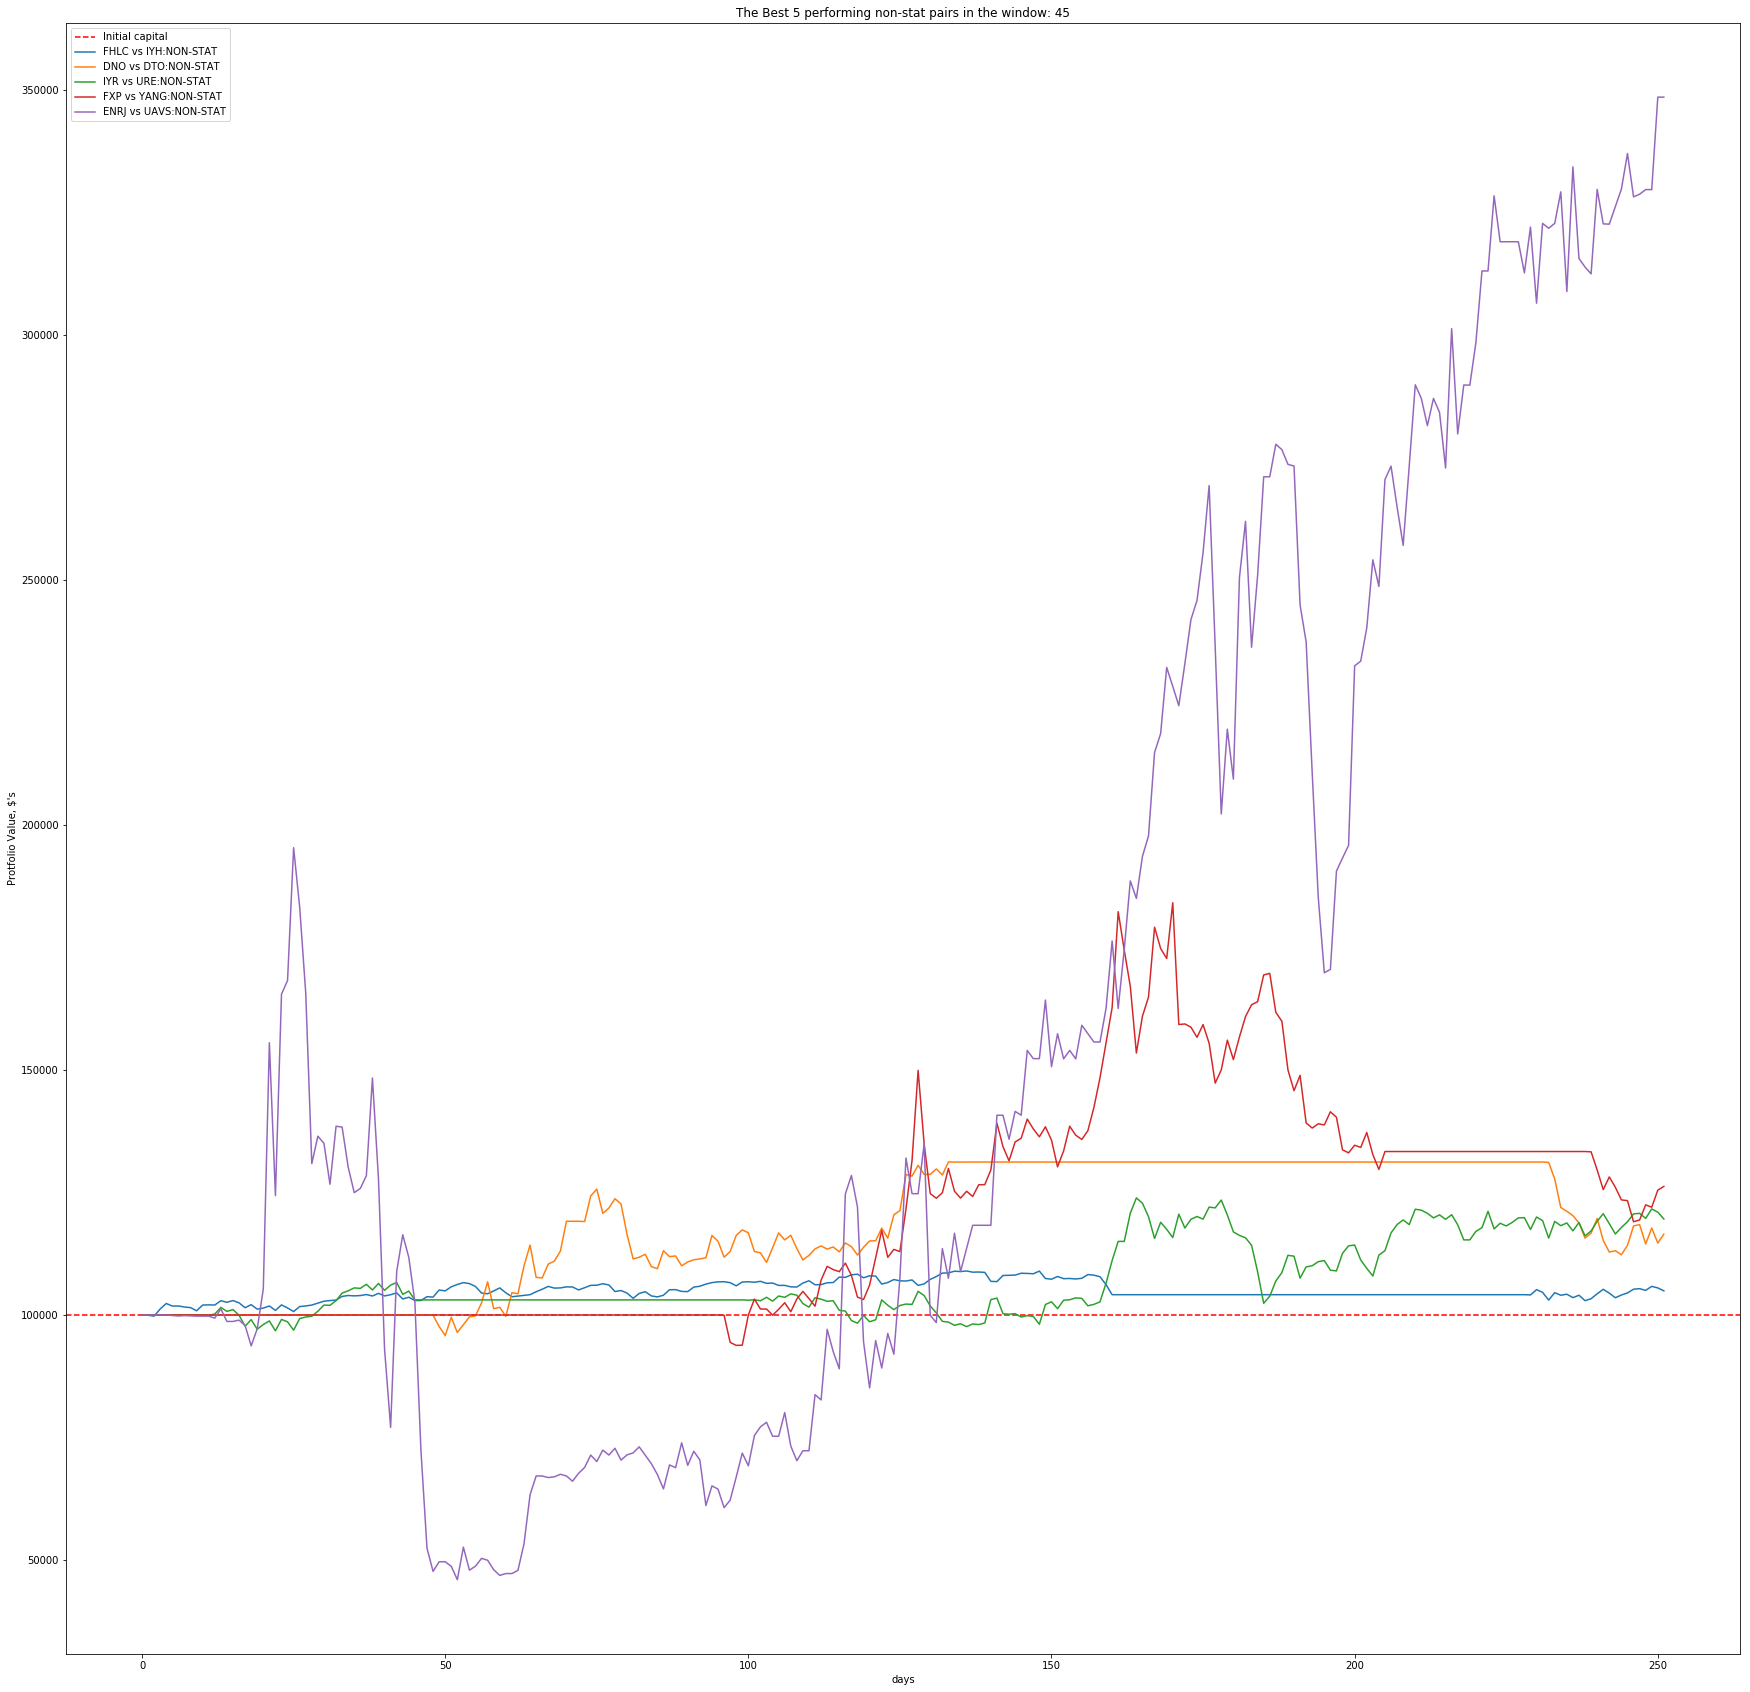

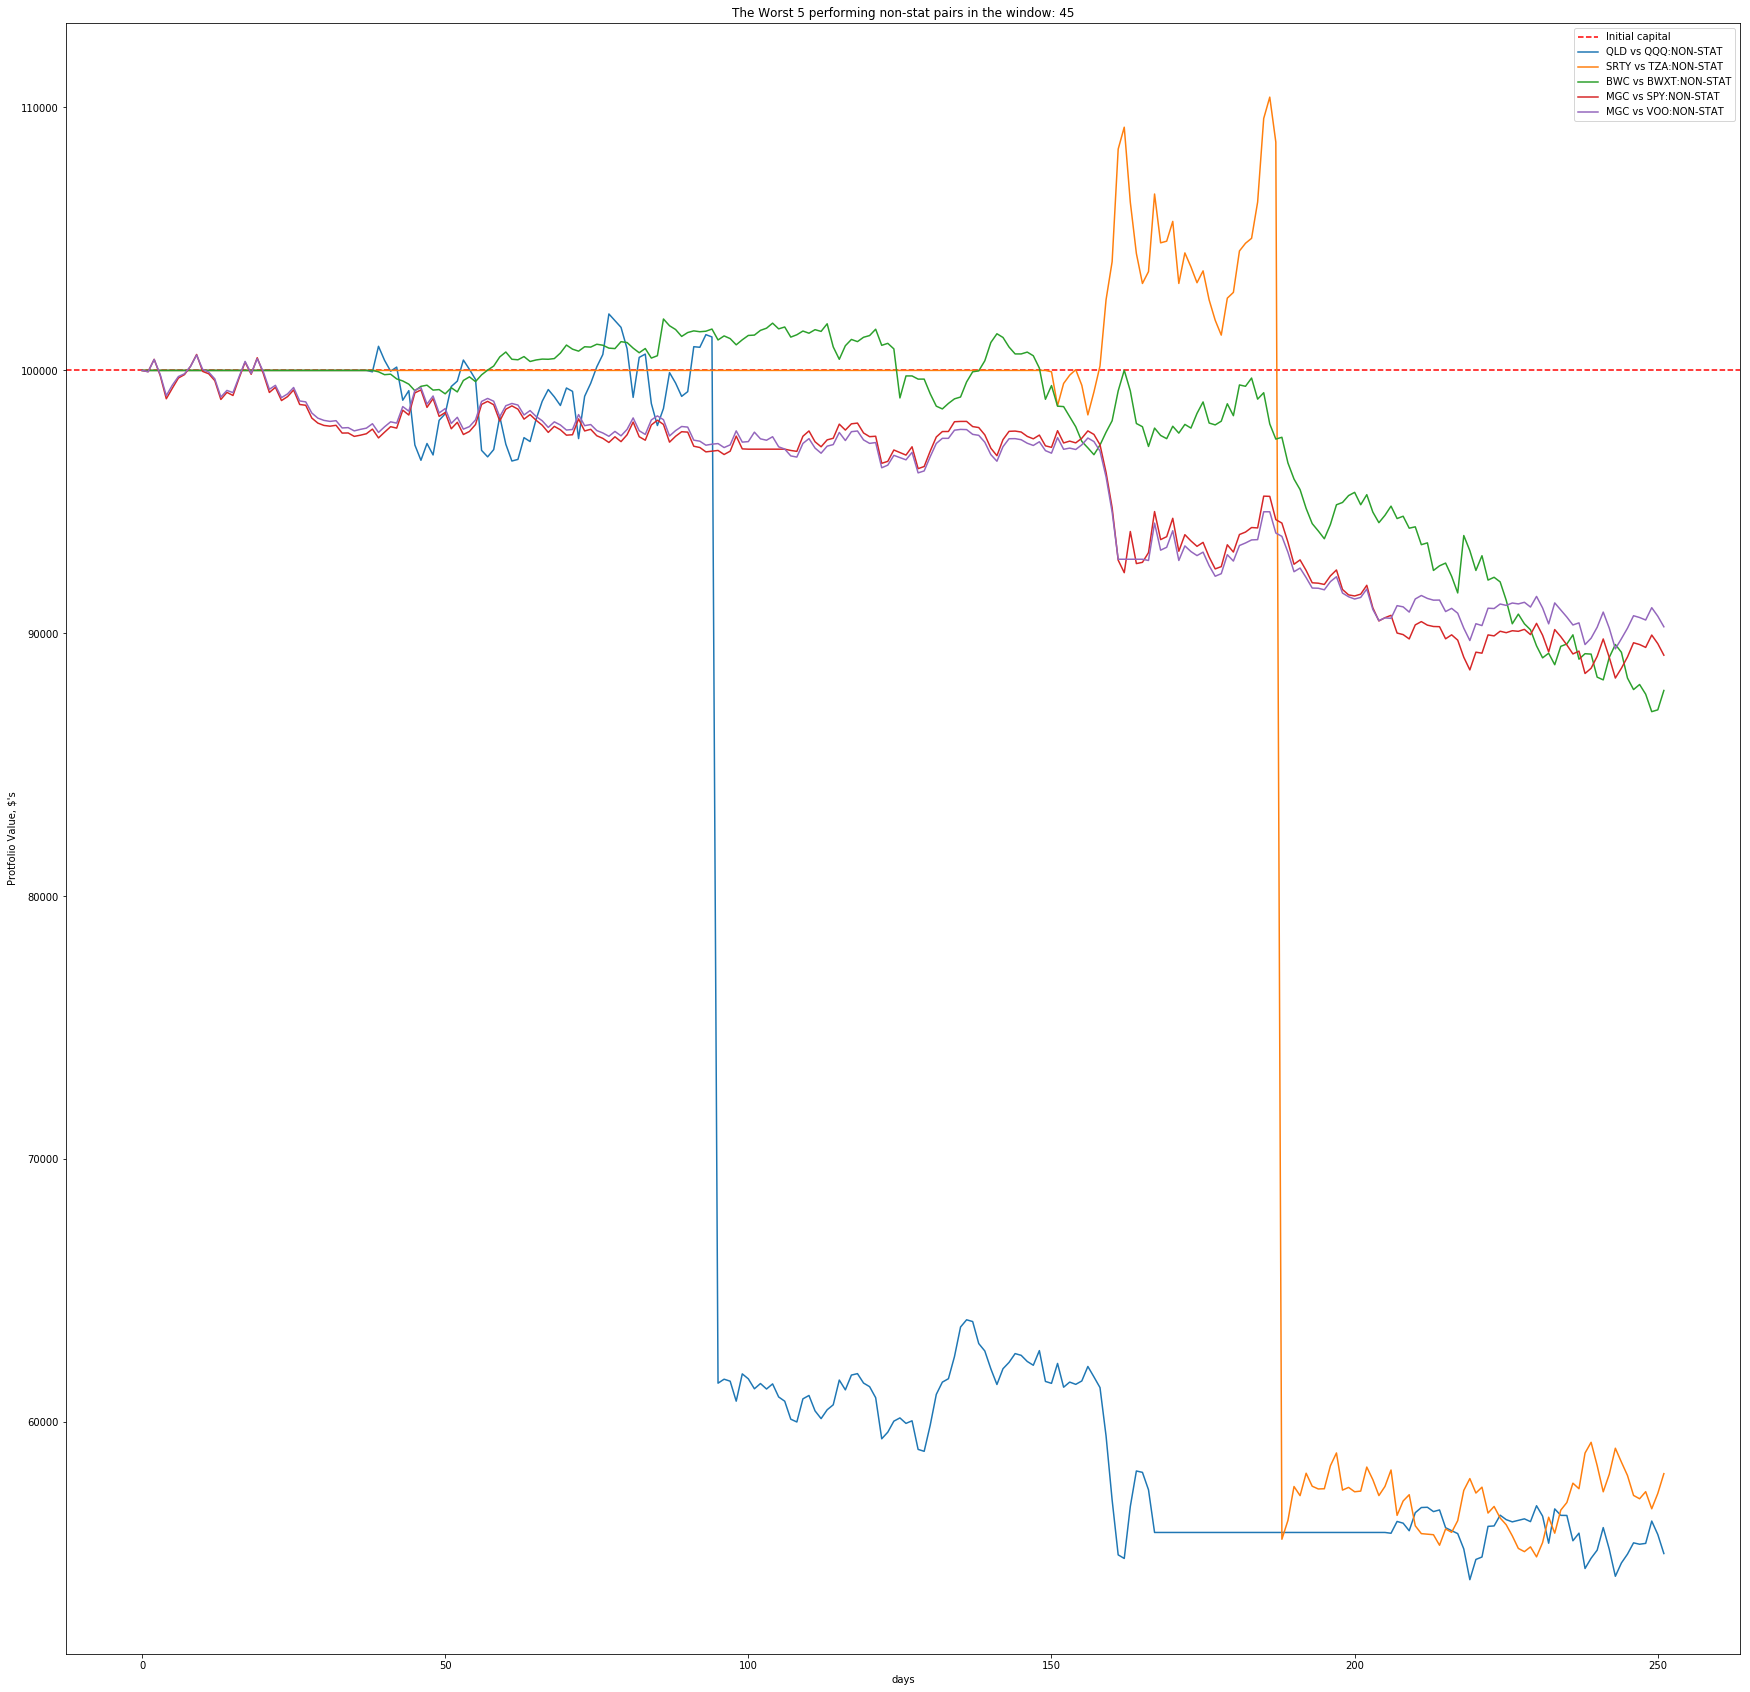

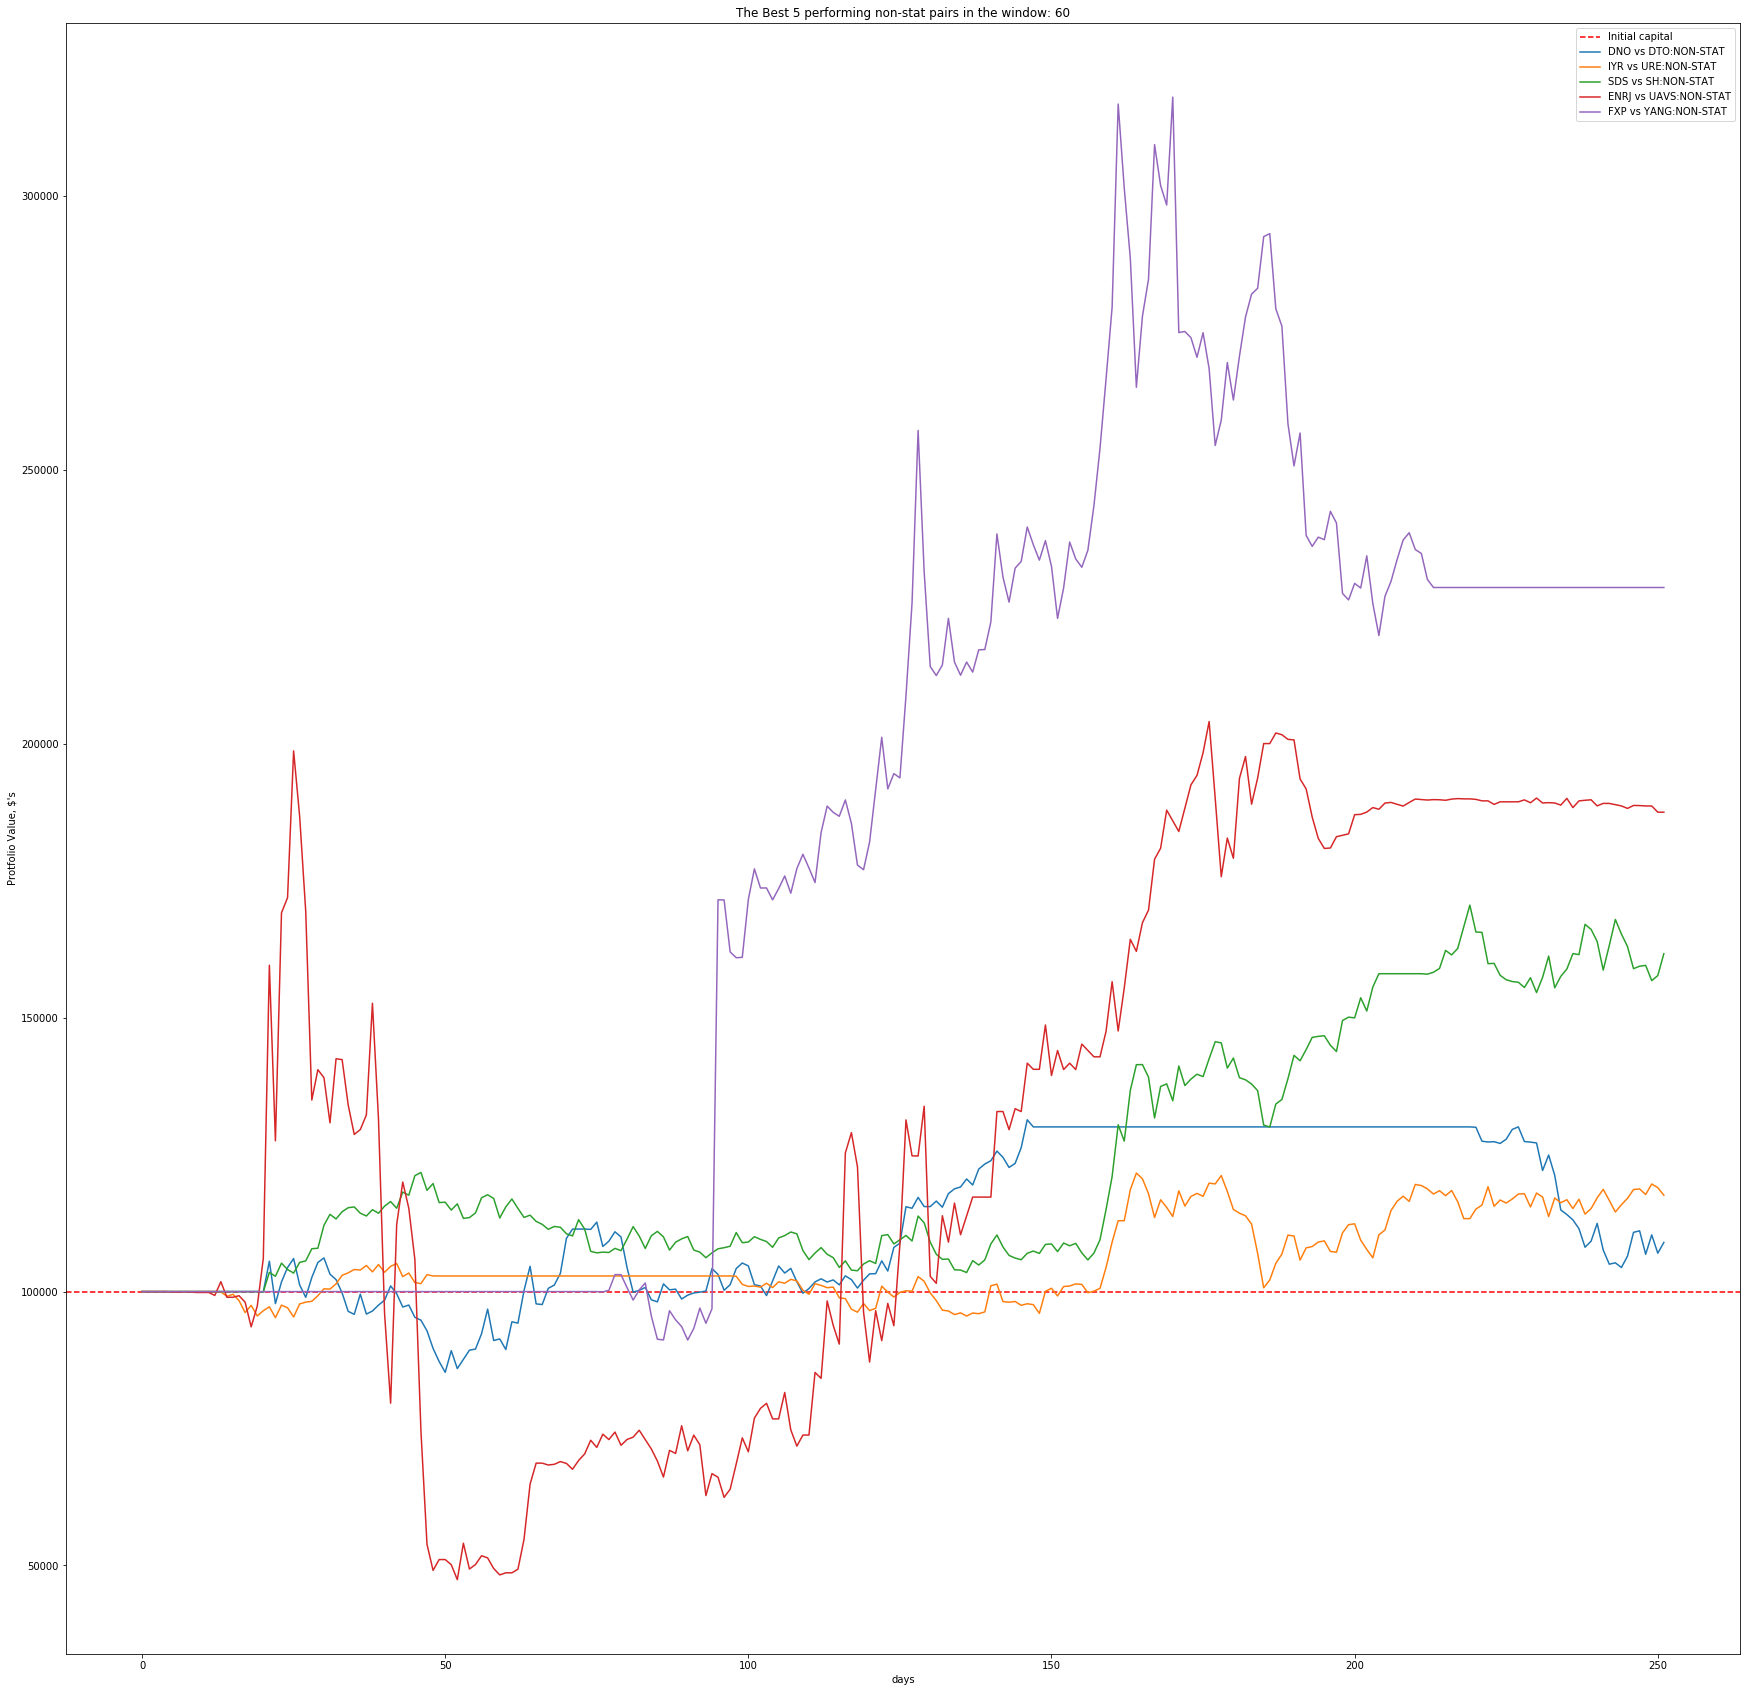

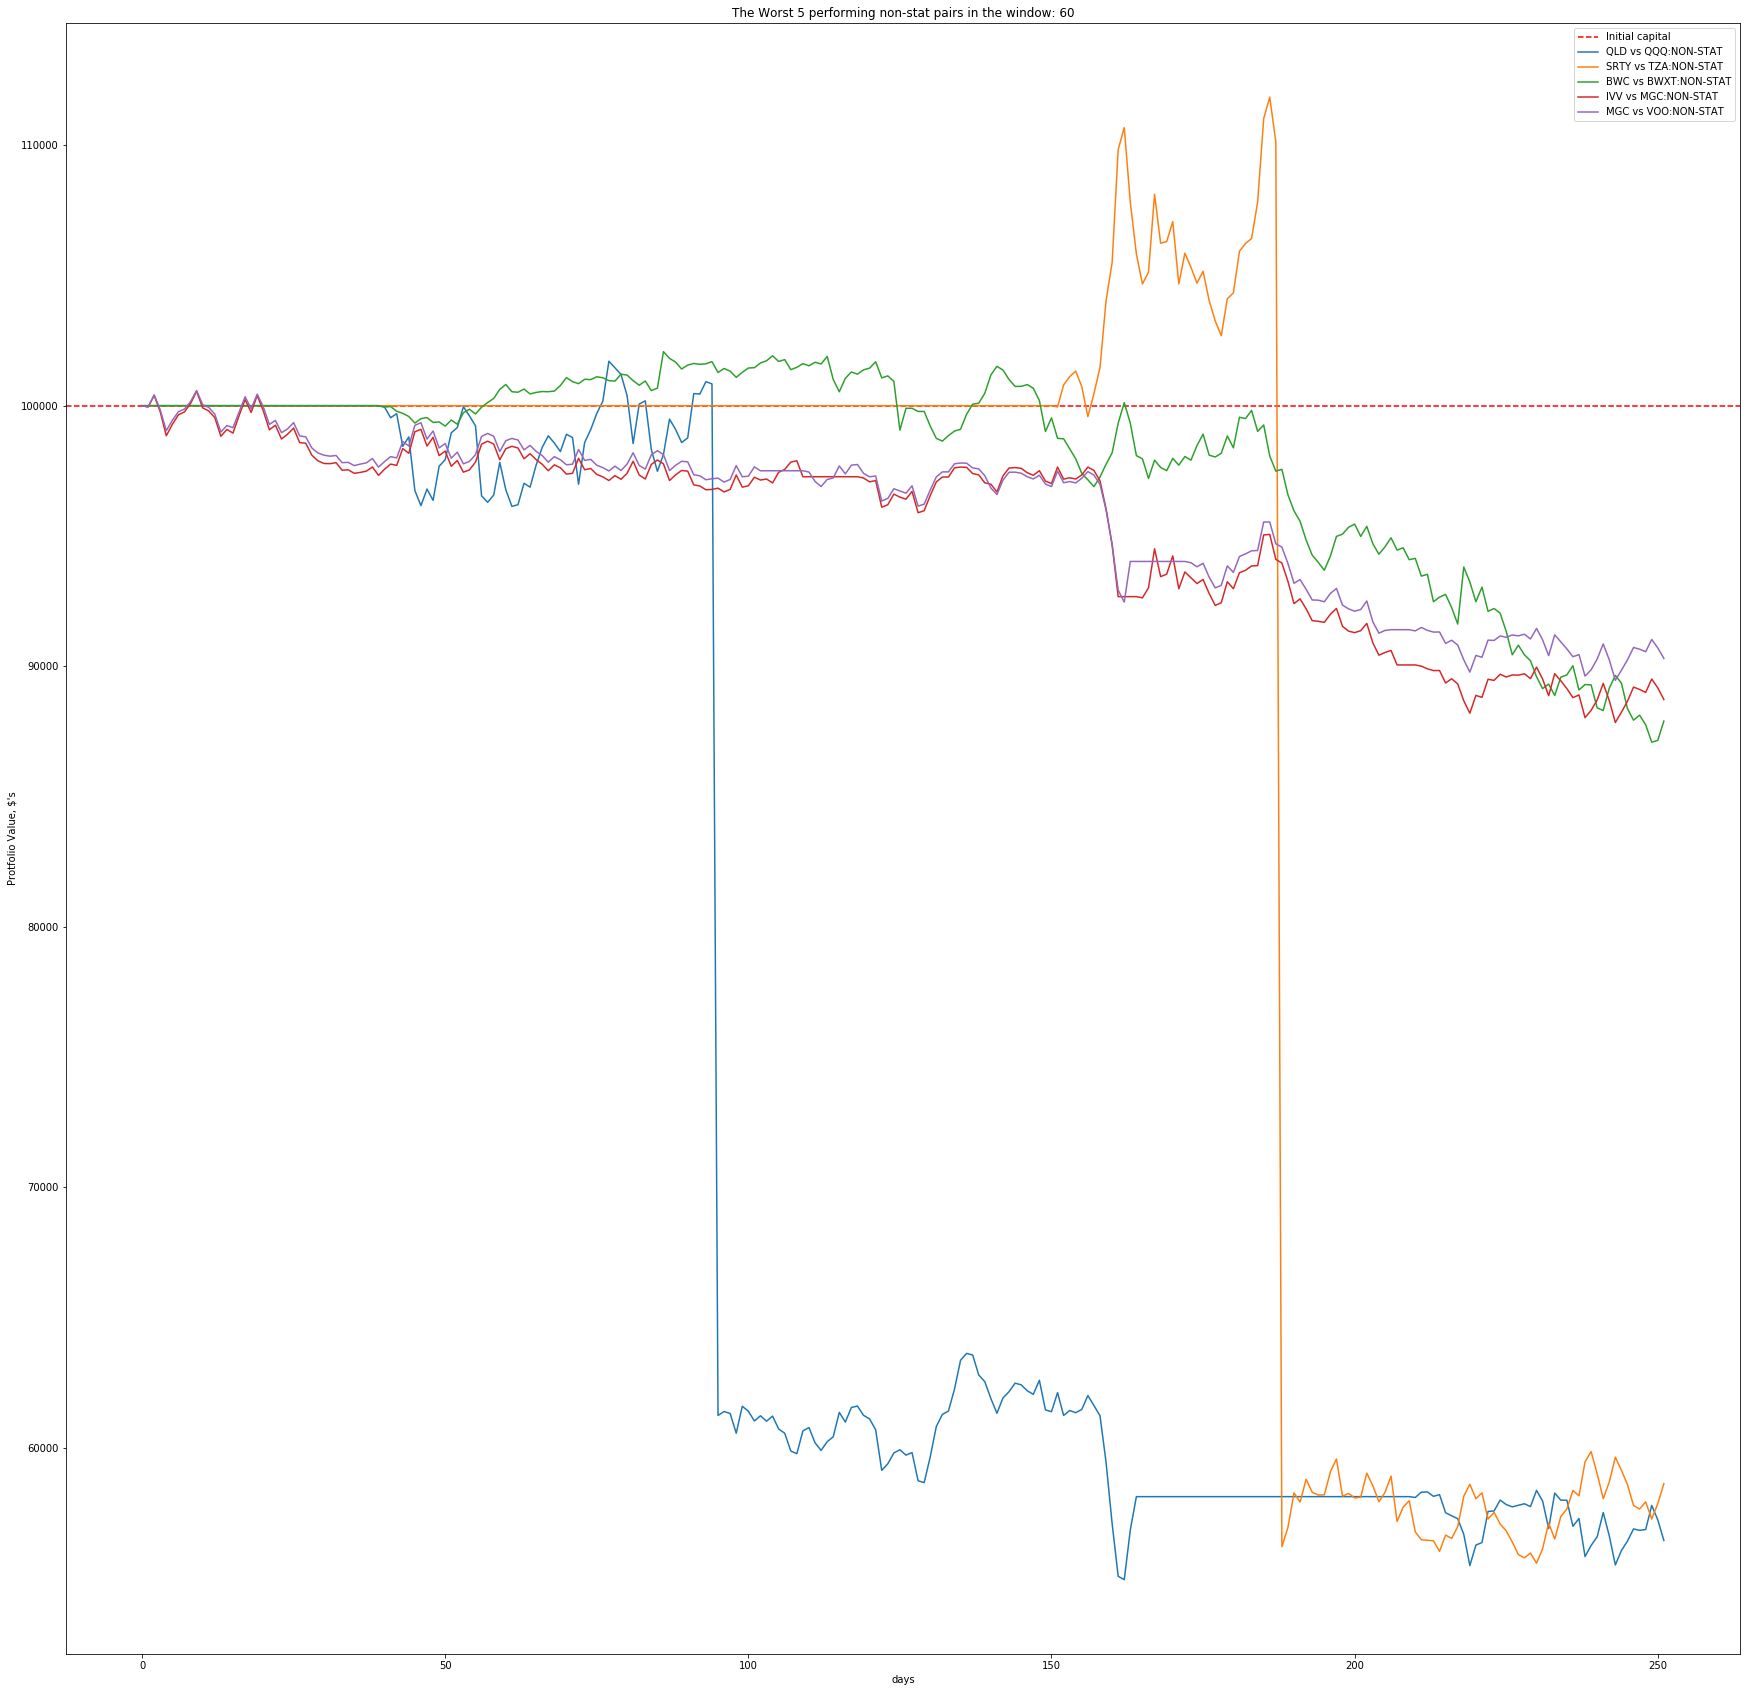

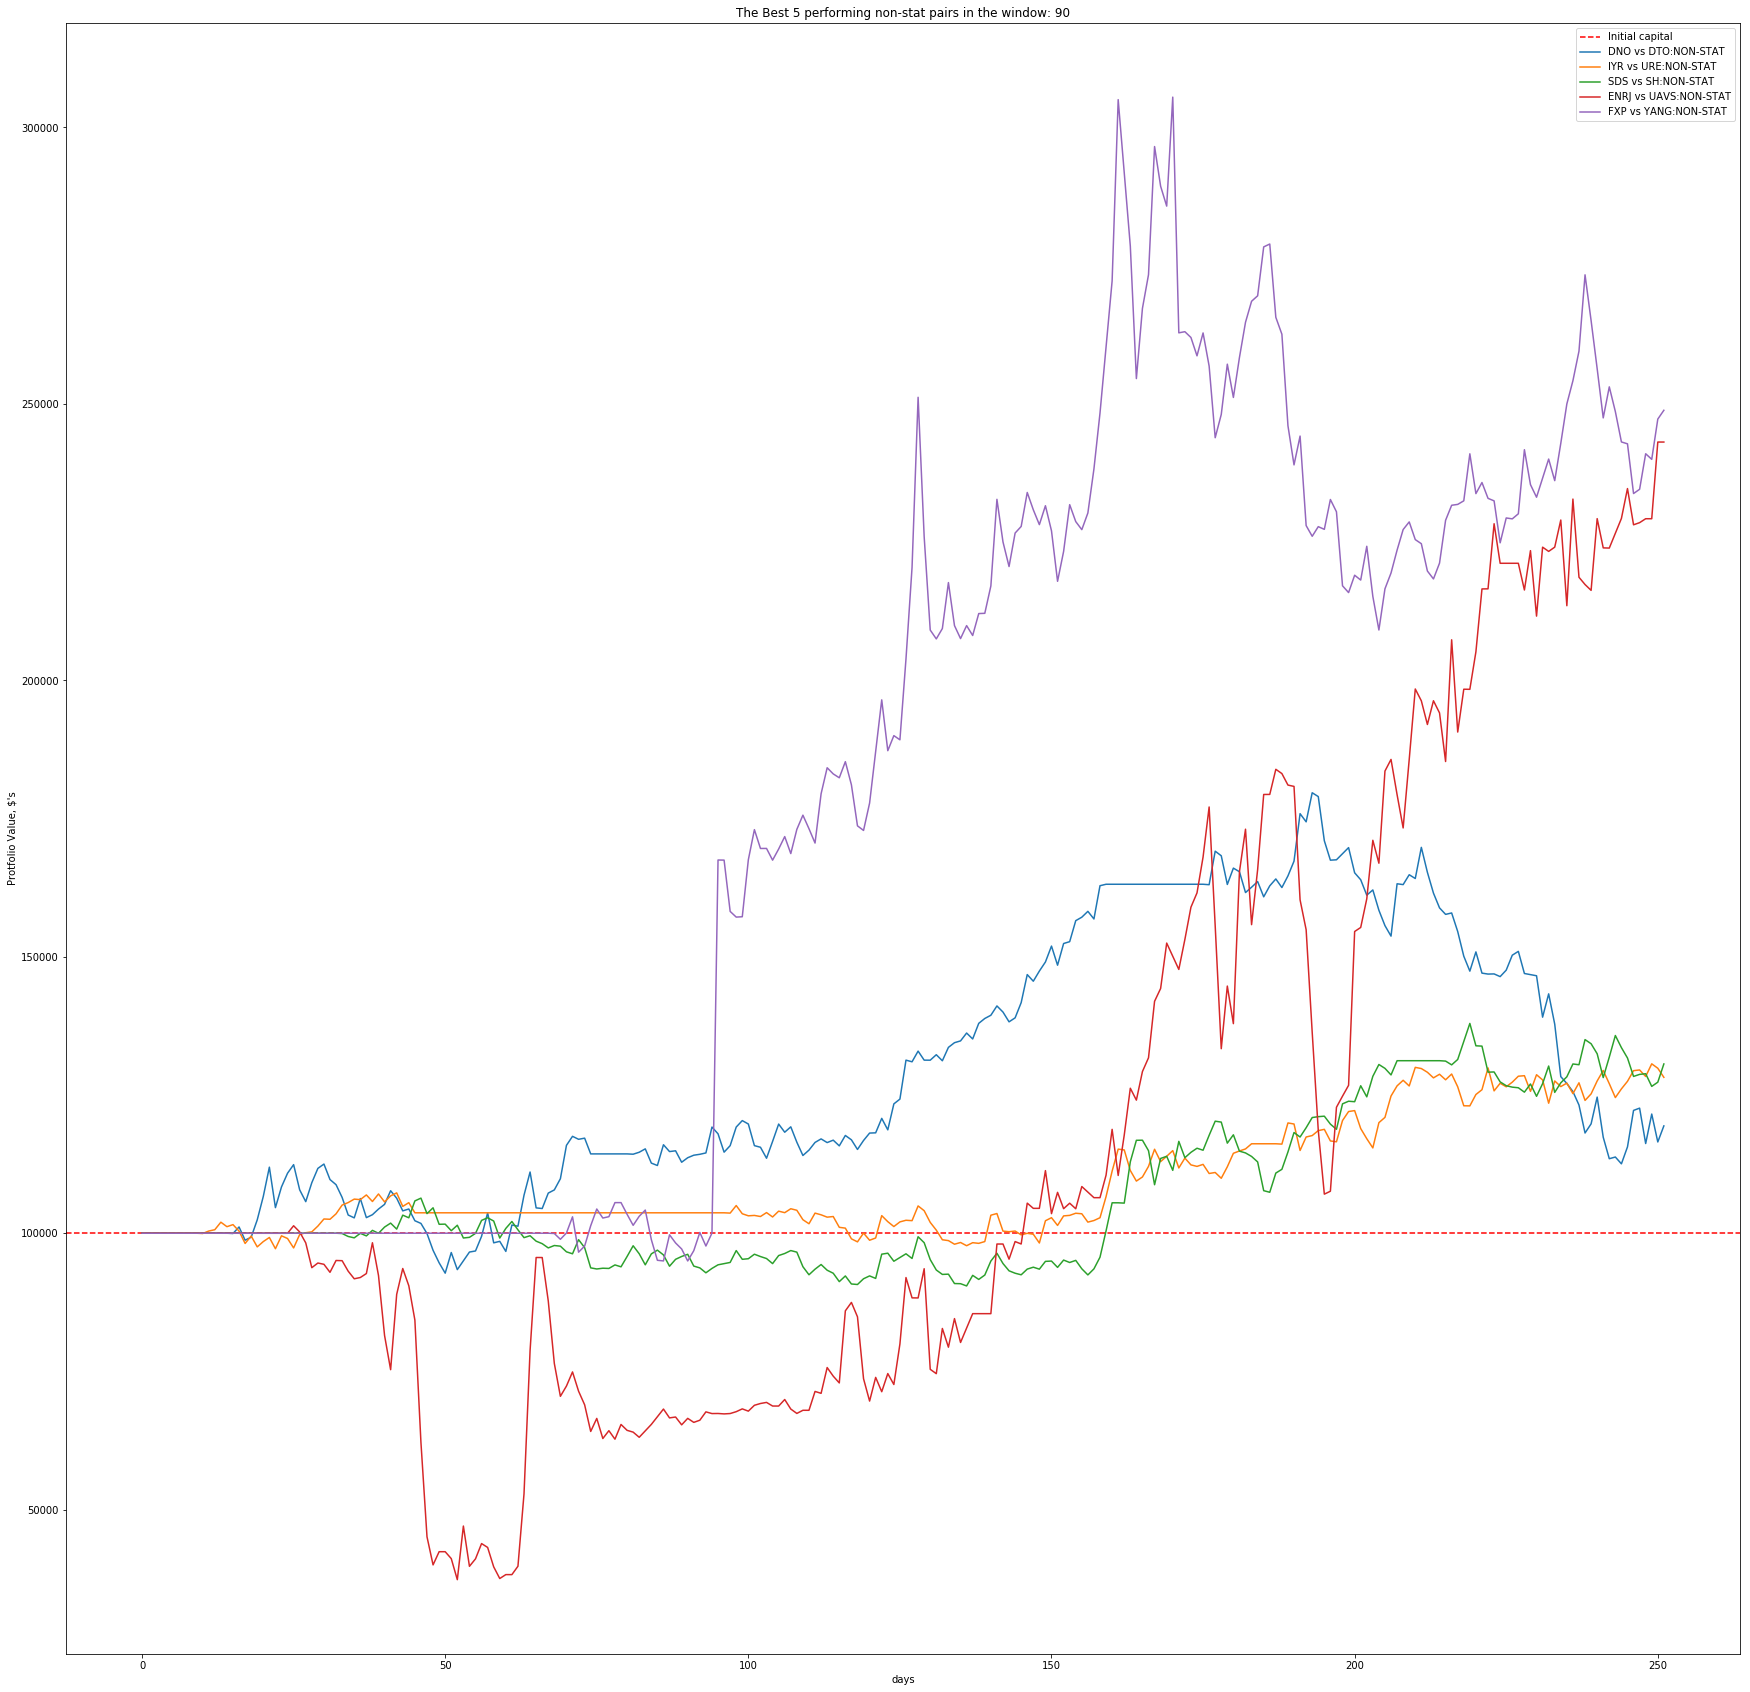

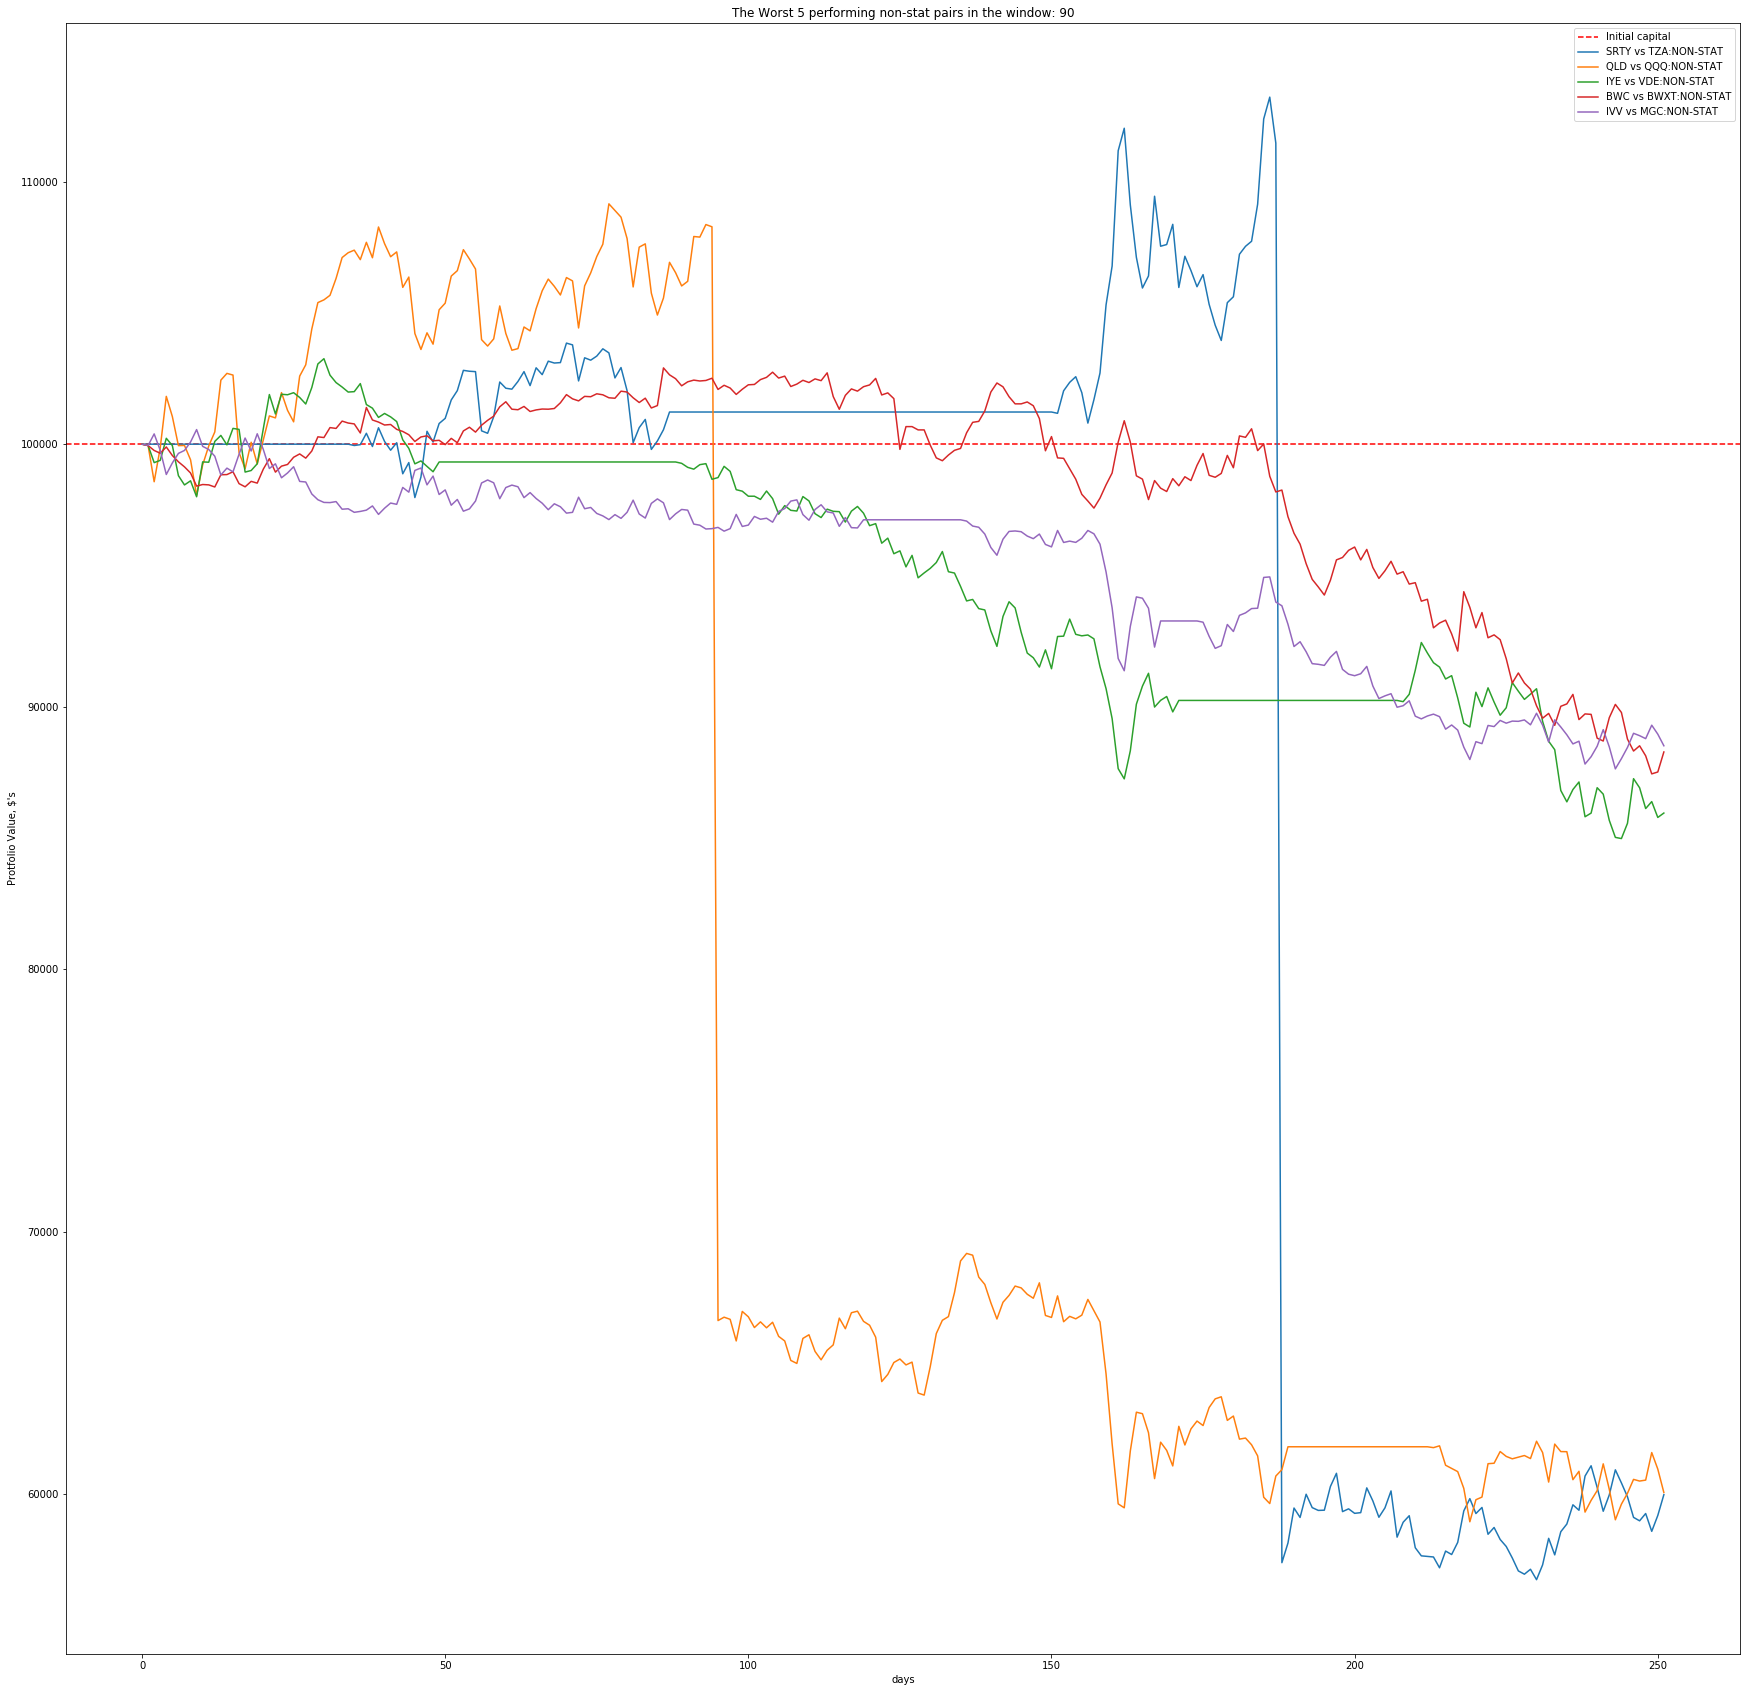

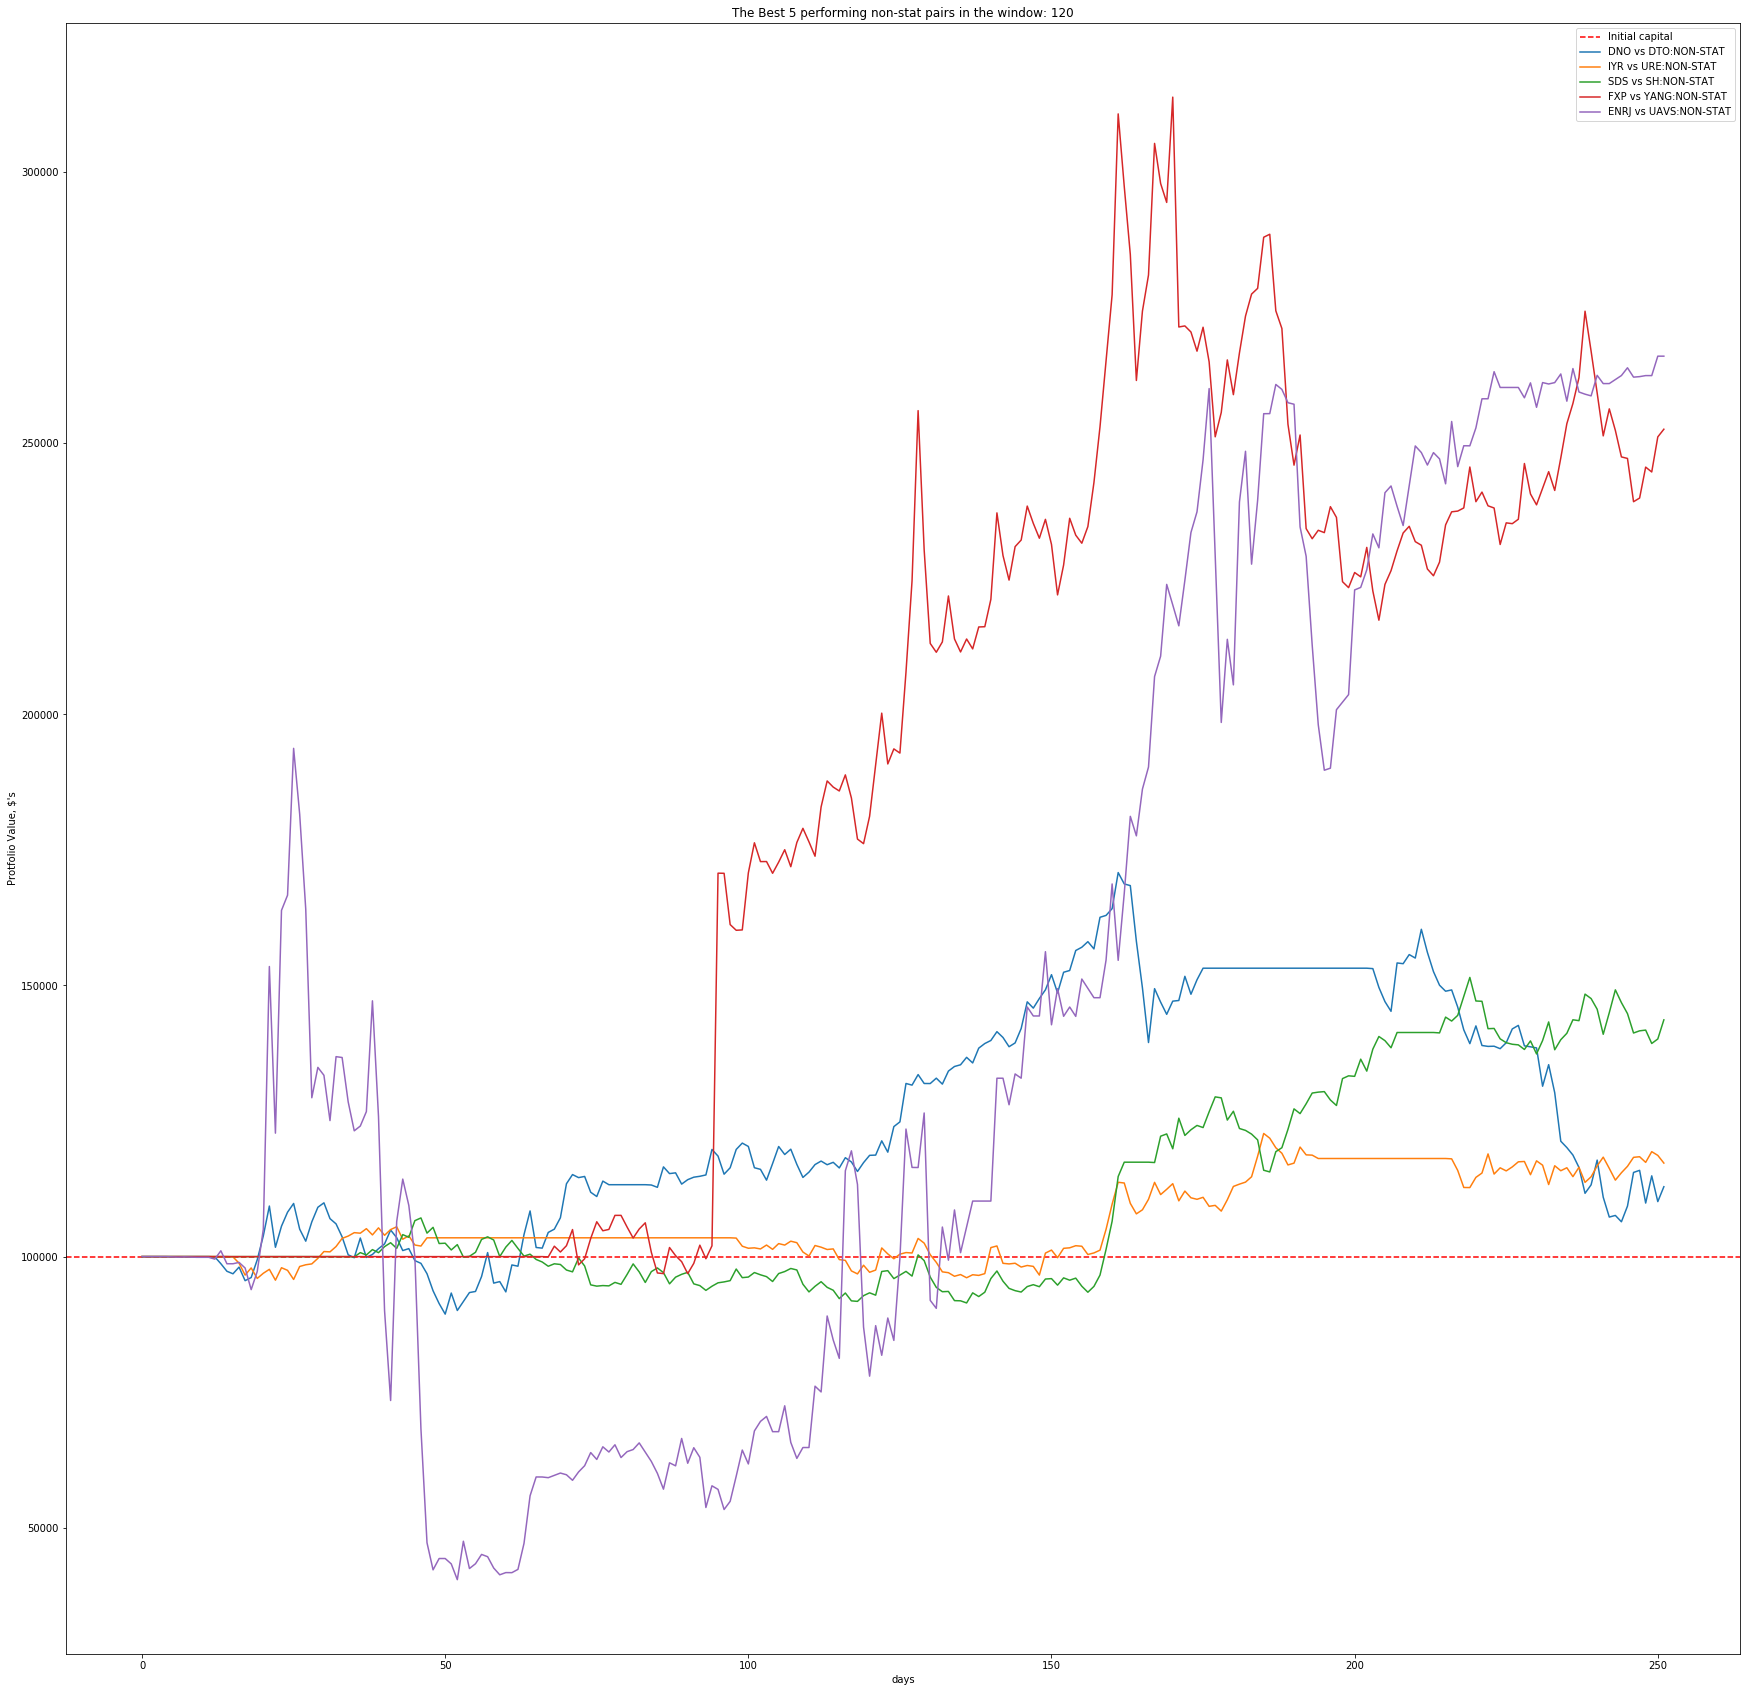

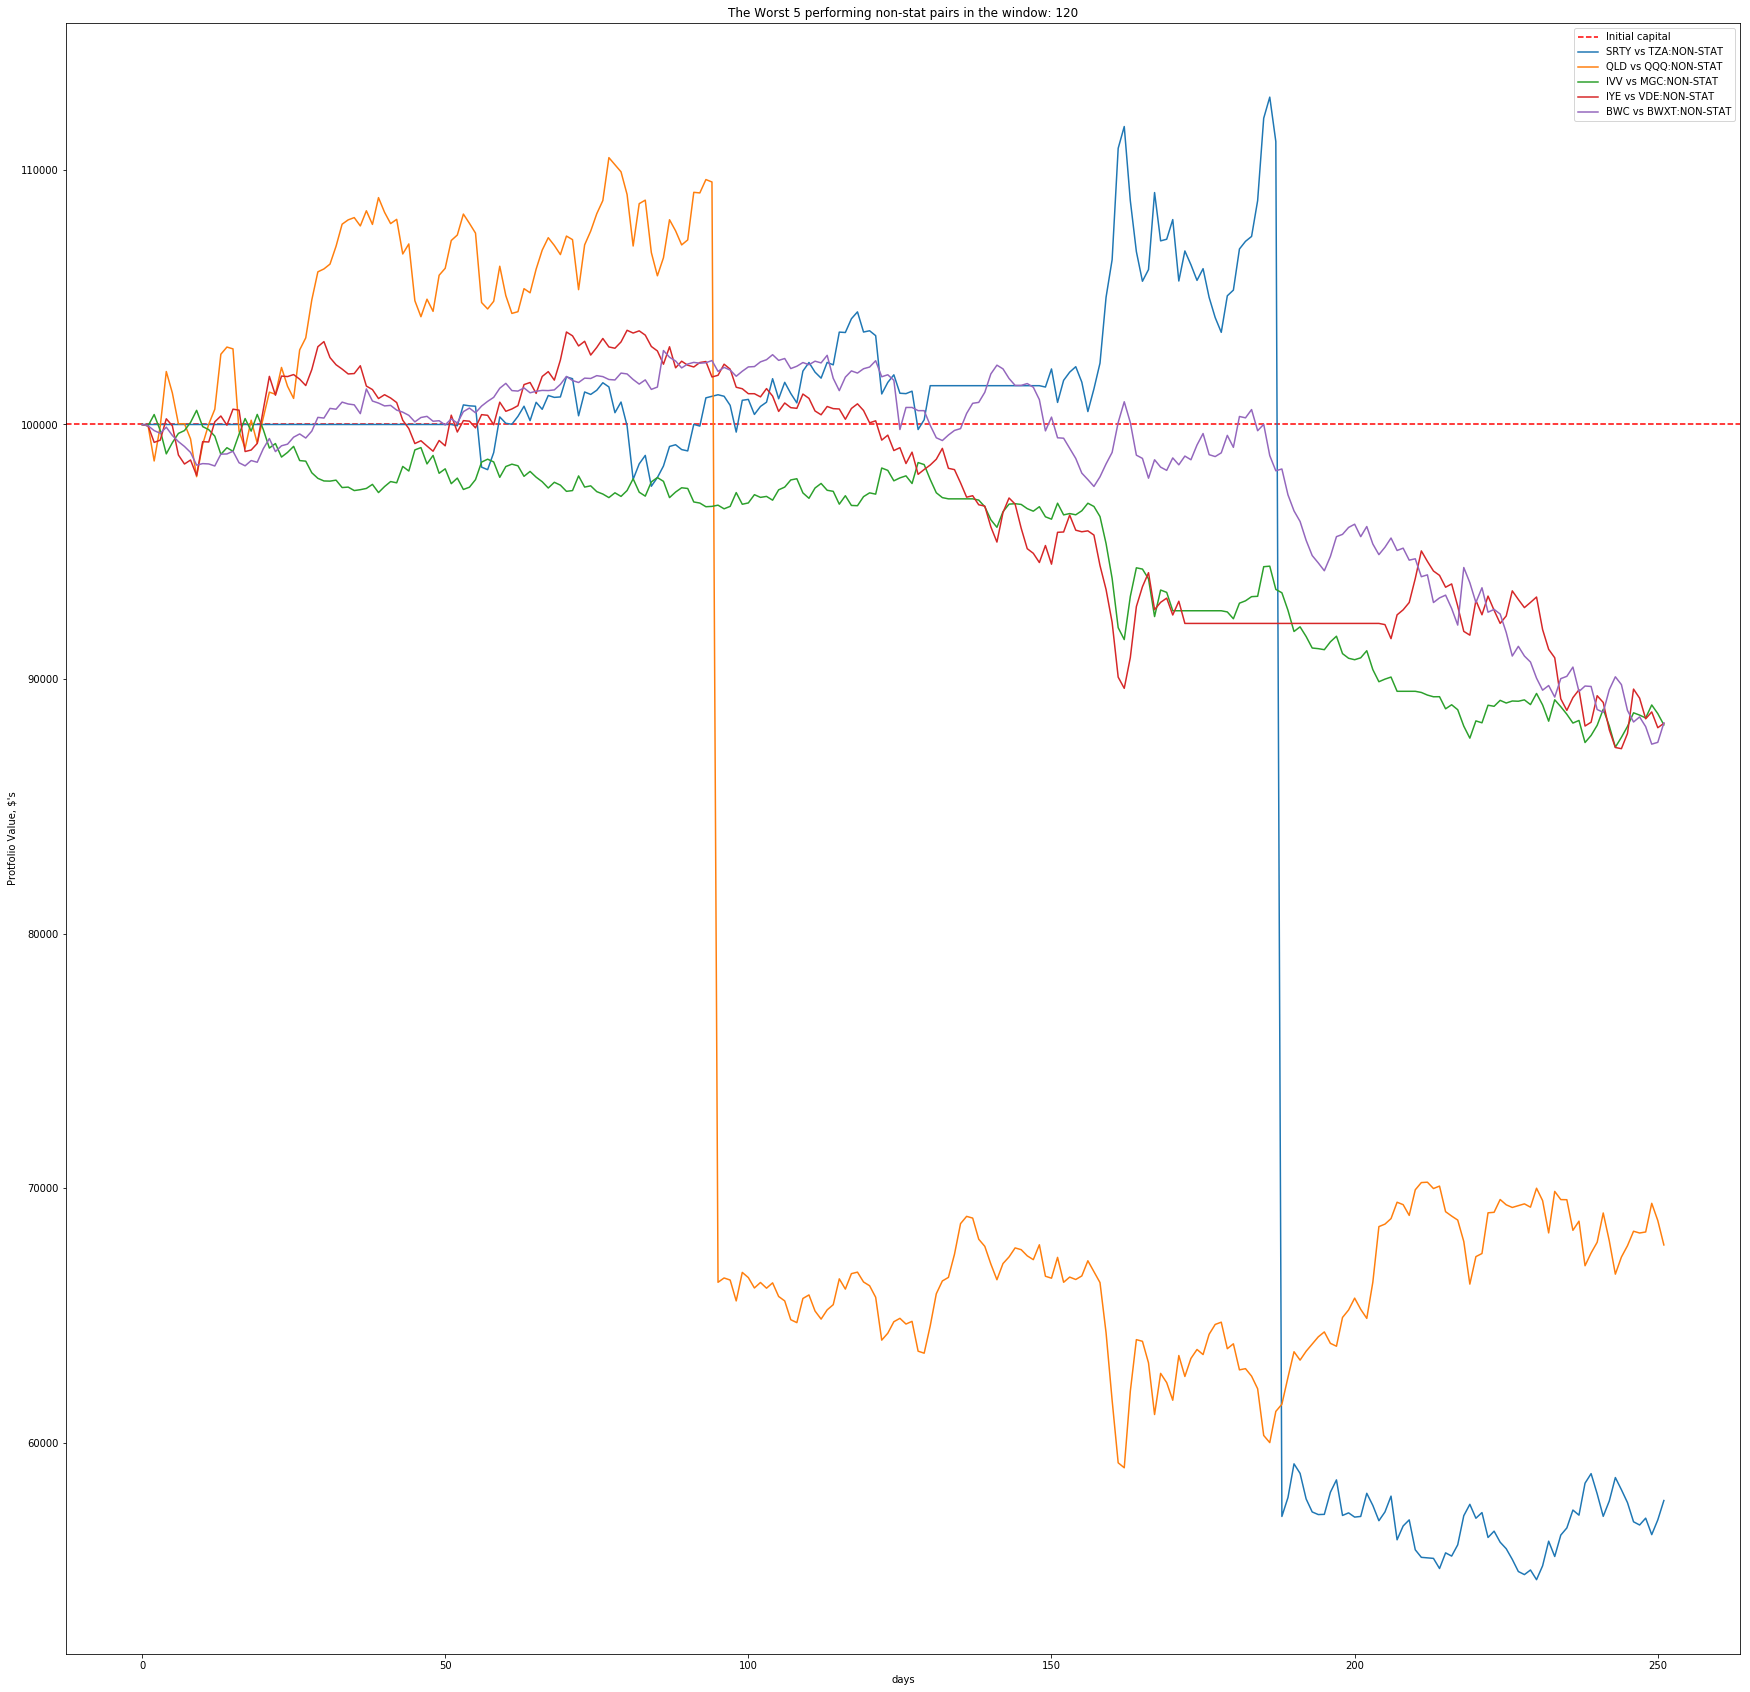

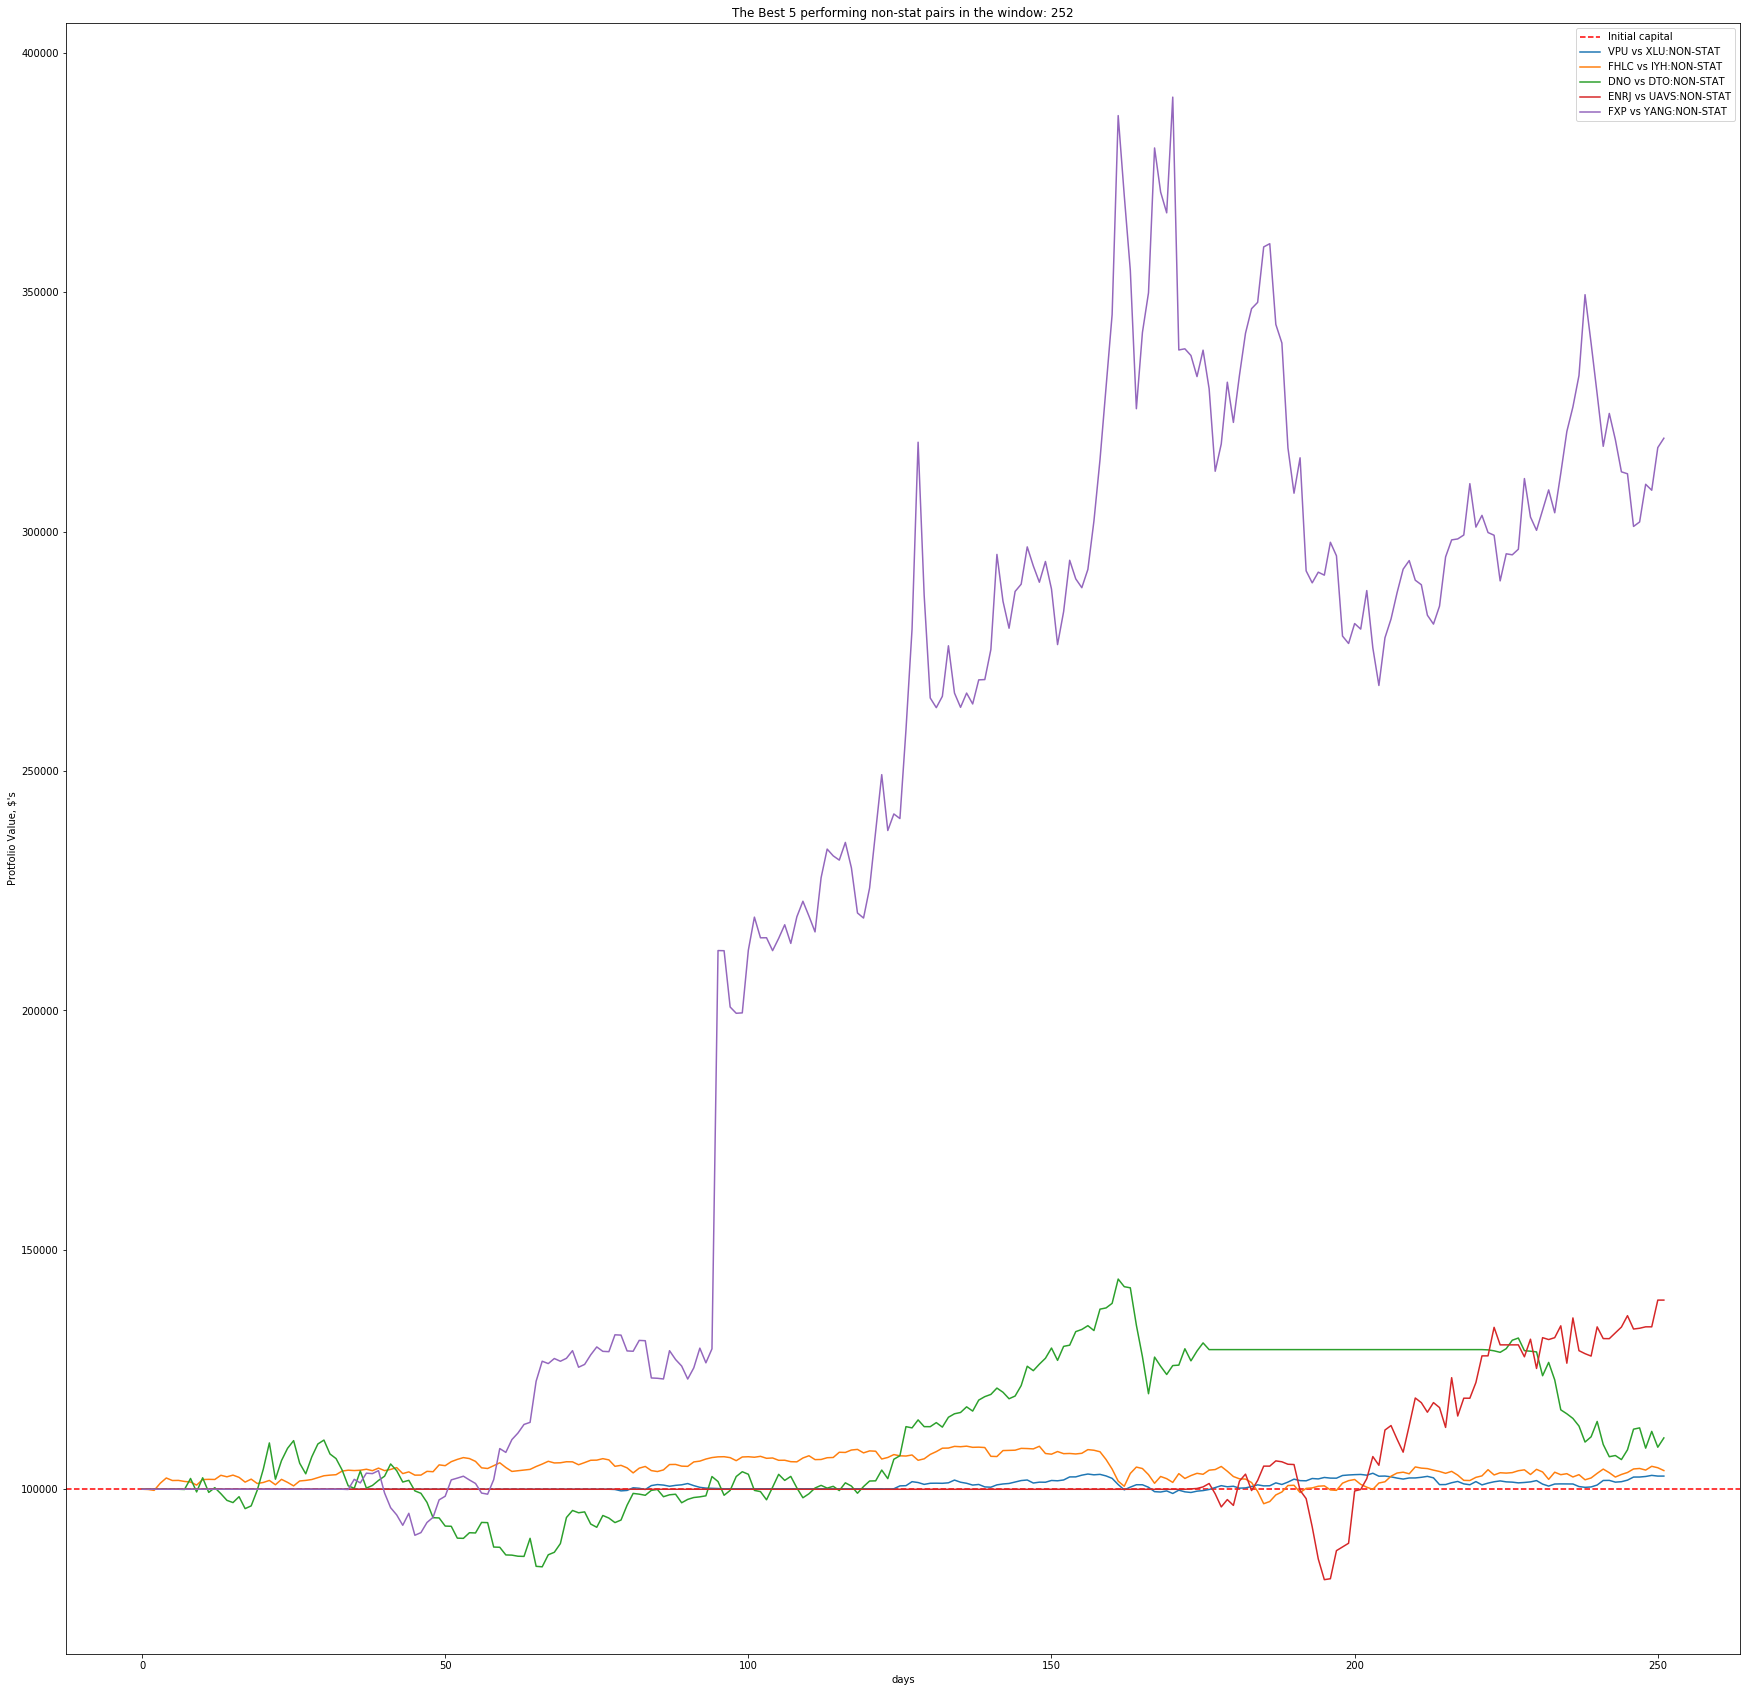

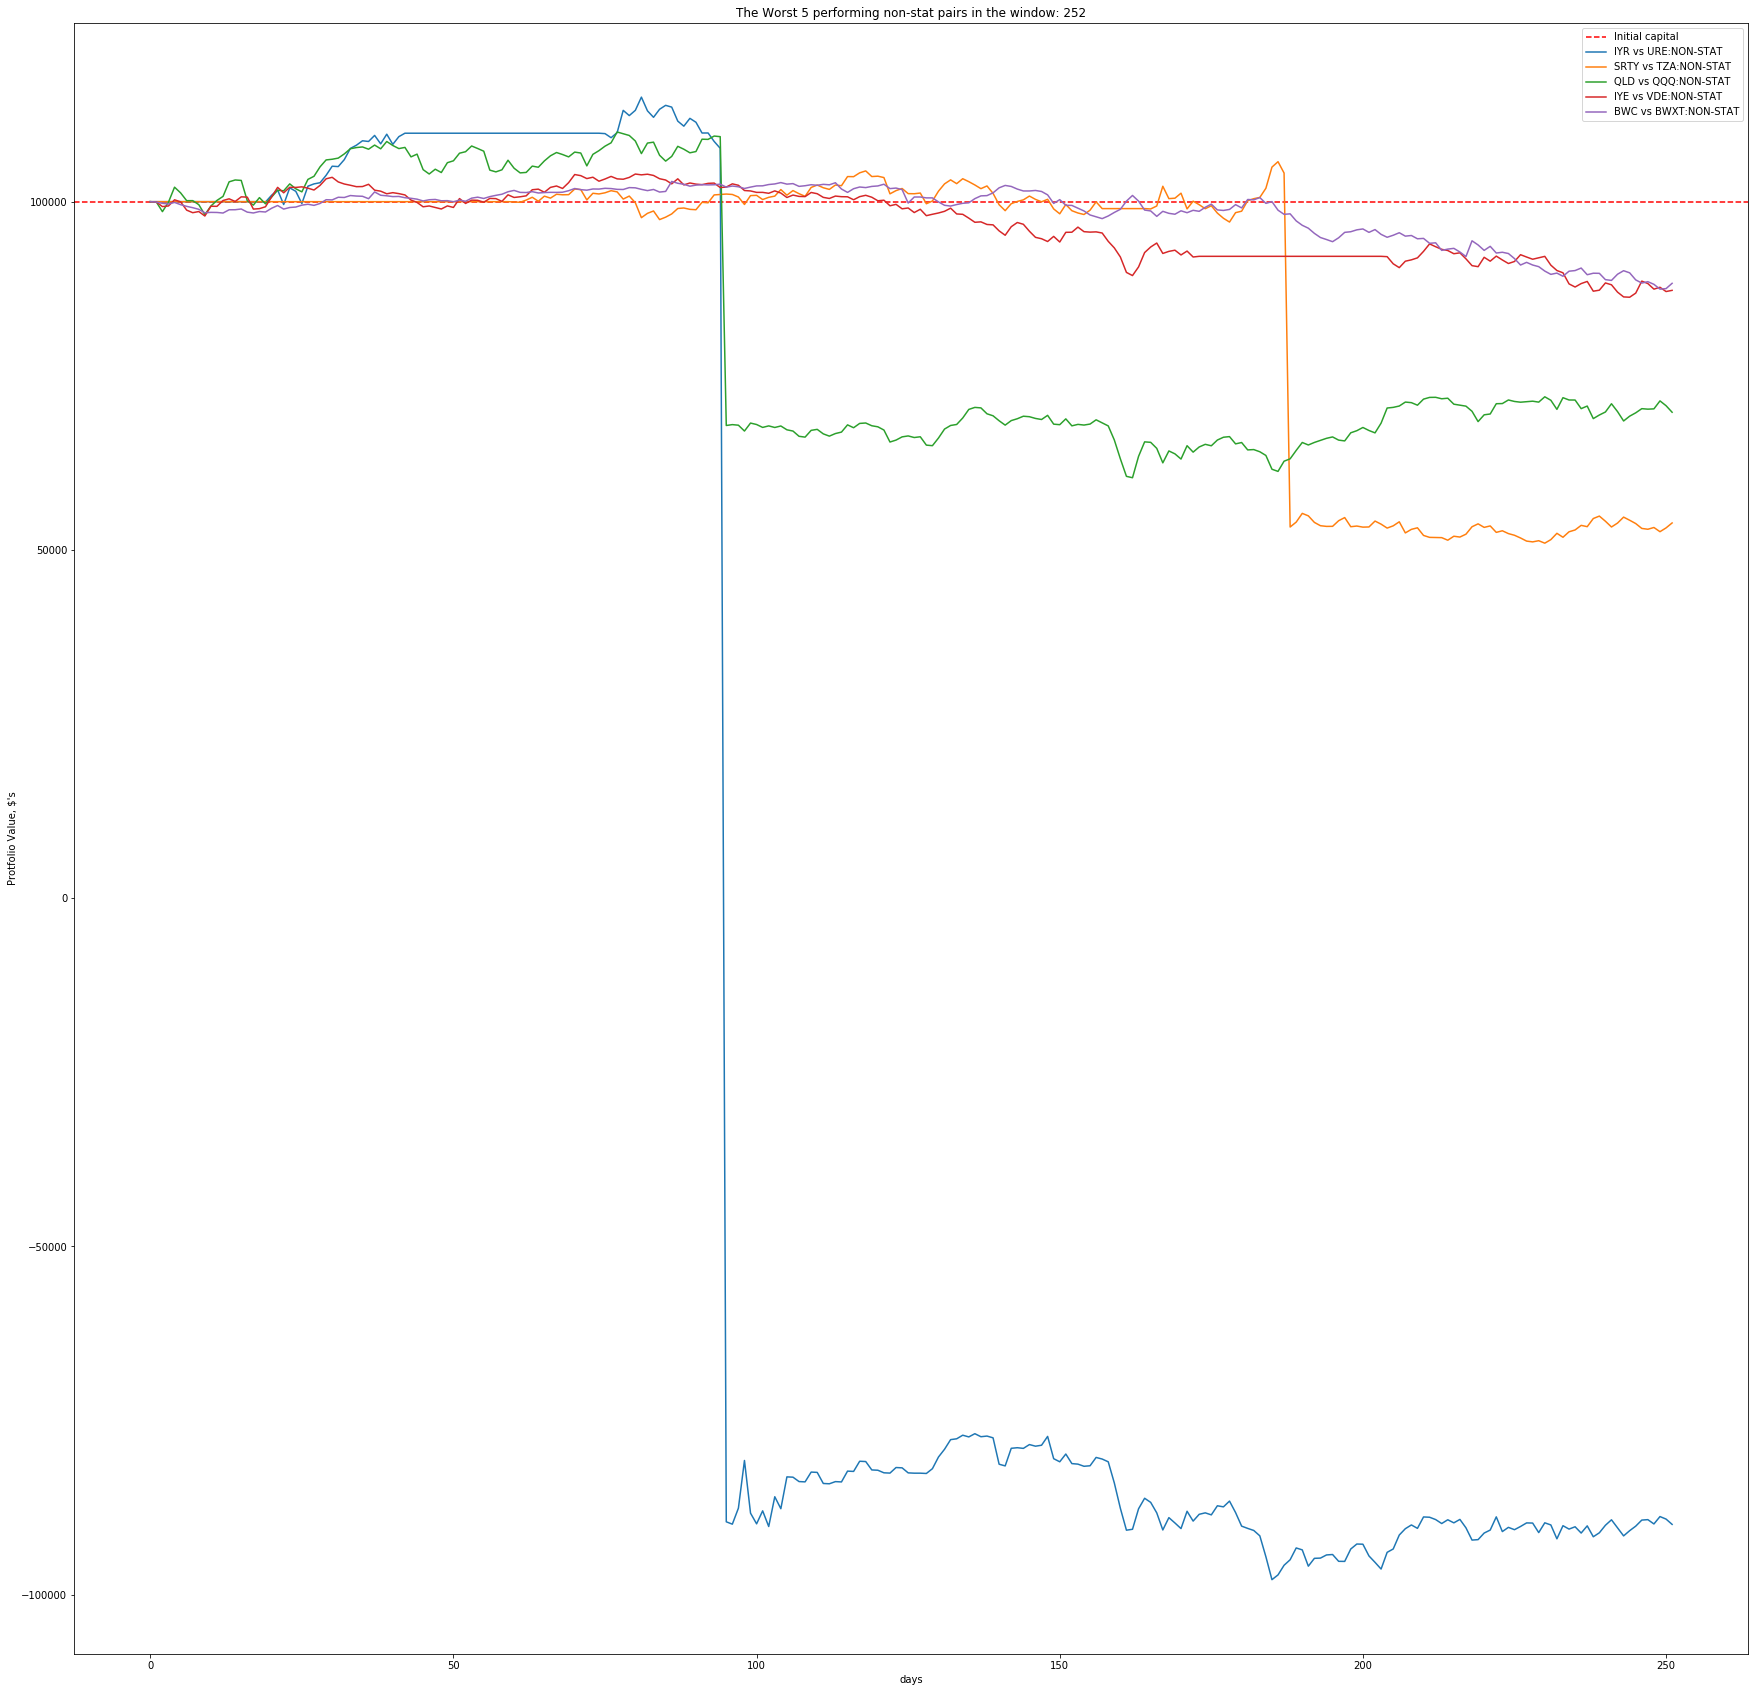

In [9]:
### GETTING NON-STAT AVERAGE RESULTS ### 
nstat_average_perf = OrderedDict()
nstat_pct_mean = OrderedDict()
nstat_pct_std = OrderedDict()
nstat_alpha_mean = OrderedDict()
nstat_beta_mean = OrderedDict()
nstat_sharpe_mean = OrderedDict()
nstat_maxdraw_mean = OrderedDict()

best_5_perf_nstat = OrderedDict()
worst_5_perf_nstat = OrderedDict()

best_5_alpha_nstat = OrderedDict()
best_5_beta_nstat = OrderedDict()
best_5_sharpe_nstat = OrderedDict()
best_5_maxdraw_nstat = OrderedDict()

worst_5_alpha_nstat = OrderedDict()
worst_5_beta_nstat = OrderedDict()
worst_5_sharpe_nstat = OrderedDict()
worst_5_maxdraw_nstat = OrderedDict()

data_len_nstat = len(nstat_data)

for window in windows:
    nstat_average_perf[window] = round(nstat_data['perf_' + str(window)].mean(), 2)
    nstat_pct_mean[window]     = round(nstat_data['pct_' + str(window)].mean(), 2)
    nstat_pct_std[window]      = round(nstat_data['pct_'+str(window)].std(), 2)
    nstat_alpha_mean[window]   = round(nstat_data['alpha_' + str(window)].mean(), 2)
    nstat_beta_mean[window]    = round(nstat_data['beta_' + str(window)].mean(), 2)
    nstat_sharpe_mean[window]  = round(nstat_data['sharpe_' + str(window)].mean(), 2)
    nstat_maxdraw_mean[window] = round(nstat_data['maxdraw_' + str(window)].mean(), 2)
    
    d = pd.read_csv(file_data + 'pair_sim_' + str(window)+'.csv')
    best_idx = [nstat_data['perf_'+str(window)].sort_values()[data_len_nstat-5:data_len_nstat].index[i] for i in range(5)]
    worst_idx = [nstat_data['perf_'+str(window)].sort_values()[:5].index[i] for i in range(5)]
    
    best_5_perf_nstat[window] = [(best_idx[i], d[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_perf_nstat[window] = [(worst_idx[i], d[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_5_alpha_nstat[window] = [(best_idx[i], nstat_data['alpha_' + str(window)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_alpha_nstat[window] = [(worst_idx[i], nstat_data['alpha_' + str(window)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_5_beta_nstat[window] = [(best_idx[i], nstat_data['beta_' + str(window)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_beta_nstat[window] = [(worst_idx[i], nstat_data['beta_' + str(window)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

    best_5_sharpe_nstat[window] = [(best_idx[i], nstat_data['sharpe_' + str(window)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_sharpe_nstat[window] = [(worst_idx[i], nstat_data['sharpe_' + str(window)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_5_maxdraw_nstat[window] = [(best_idx[i], nstat_data['maxdraw_' + str(window)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_5_maxdraw_nstat[window] = [(worst_idx[i], nstat_data['maxdraw_' + str(window)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    

#### AVERAGE NON-STAT
colnames = ['average portfolio value', 'average percentage change', 'average standard deviation',
            'average alpha', 'average beta', 'average sharpe ratio', 'average max drawdown']

list_of_dicts = [nstat_average_perf,nstat_pct_mean, nstat_pct_std,
                 nstat_alpha_mean, nstat_beta_mean,nstat_sharpe_mean, nstat_maxdraw_mean ]

main_df = pd.DataFrame()
main_df['window'] = pd.Series(windows)

for i in range(len(list_of_dicts)):
    df = pd.DataFrame(data=list(list_of_dicts[i].items()) , columns=['window', colnames[i]] )
    main_df = pd.concat([main_df, df[colnames[i]]], axis=1)
main_df.to_latex(buf=file_data+'non-stat-perf-windows.txt', index=False)

for window in windows:
    fig, ax = plt.subplots(figsize = (30, 30))
    ax.set_ylabel("Protfolio Value, $'s")
    ax.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')
    plt.title('The Best 5 performing non-stat pairs in the window: {}'.format(window))
    
    for i in range(len(best_5_perf_nstat[window])):
        ax.plot(best_5_perf_nstat[window][i][1])
    plt.legend(loc='best')
    plt.savefig(fname=file_data + 'PLOTS/NON STAT/best_5_stat_window_' + str(window) + '.png')
    plt.show()
    
    fig1, ax1 = plt.subplots(figsize = (30, 30))
    ax1.set_ylabel("Protfolio Value, $'s")
    ax1.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')    
    
    for i in range(len(worst_5_perf_nstat[window])):
        ax1.plot(worst_5_perf_nstat[window][i][1])
        plt.title('The Worst 5 performing non-stat pairs in the window: {}'.format(window))
    plt.legend(loc='best')
    plt.savefig(fname=file_data + 'PLOTS/NON STAT/worst_5_stat_window_' + str(window) + '.png')
    plt.show() 

In [11]:
count_aboves_nstat = []
nstat_perf = []
nstat_alpha = []
nstat_beta = []
nstat_sharpe = []
nstat_maxdraw = []

num_of_tradable_pairs = []
for window in windows:
    above = nstat_data[nstat_data['perf_' + str(window)] > 100000]
    nstat_window_best = above[['perf_'+str(window), 'alpha_'+str(window), 'beta_'+str(window),
                         'sharpe_'+str(window), 'maxdraw_'+str(window)]]
    
    nstat_window_best.to_latex(buf=file_data + 'nstat_window_best_part3_' + str(window) + '.txt', index=True)
    count_aboves_nstat.append((window, len(above)))
    
    nstat_perf.append(round(above['perf_'+str(window)].mean(), 2))
    nstat_alpha.append(round(above['alpha_'+str(window)].mean(), 2))
    nstat_beta.append(round(above['beta_'+str(window)].mean(), 2))
    nstat_sharpe.append(round(above['sharpe_'+str(window)].mean(), 2))
    nstat_maxdraw.append(round(above['maxdraw_'+str(window)].mean(), 2))
    print('---- NON-STATONAIRY PAIRS ----')
    print(nstat_window_best)
    
    
    
count_aboves_stat = []
stat_perf = []
stat_alpha = []
stat_beta = []
stat_sharpe = []
stat_maxdraw = []
for window in windows:
    above = stat_data[stat_data['perf_' + str(window)] > 100000]
    stat_window_best = above[['perf_'+str(window), 'alpha_'+str(window), 'beta_'+str(window),
                         'sharpe_'+str(window), 'maxdraw_'+str(window)]]
    stat_window_best.to_latex(buf=file_data + 'stat_window_best_part3_' + str(window) + '.txt', index=True)
    
    count_aboves_stat.append((window, len(above)))
    
    stat_perf.append(round(above['perf_'+str(window)].mean(), 2))
    stat_alpha.append(round(above['alpha_'+str(window)].mean(), 2))
    stat_beta.append(round(above['beta_'+str(window)].mean(), 2))
    stat_sharpe.append(round(above['sharpe_'+str(window)].mean(), 2))
    stat_maxdraw.append(round(above['maxdraw_'+str(window)].mean(), 2))
    
    print('---- STATIONARY PAIRS ----')
    print(stat_window_best)
    
    
    
count_nstat = pd.DataFrame(data=count_aboves_nstat, columns = ['window', 'count_pos'])
count_nstat['pos %'] = count_nstat.count_pos/len(nstat_data)
count_nstat['avg_perf'] = nstat_perf
count_nstat['avg_alpha'] = nstat_alpha
count_nstat['avg_beta'] = nstat_beta
count_nstat['avg_sharpe'] = nstat_sharpe
count_nstat['avg_maxdraw'] = nstat_maxdraw

count_nstat.to_latex(buf=file_data + 'nstat_count_window_part3_.txt', index=False)
print(count_nstat)

count_stat = pd.DataFrame(data=count_aboves_stat, columns = ['window', 'count_pos'])
count_stat['pos %'] = count_stat.count_pos/len(stat_data)
count_stat['avg_perf'] = stat_perf
count_stat['avg_alpha'] = stat_alpha
count_stat['avg_beta'] = stat_beta
count_stat['avg_sharpe'] = stat_sharpe
count_stat['avg_maxdraw'] = stat_maxdraw

count_stat.to_latex(buf=file_data + 'stat_count_window_part3.txt', index=False)
print(count_stat)

---- NON-STATONAIRY PAIRS ----
                      perf_15  alpha_15   beta_15  sharpe_15  maxdraw_15
PHYS vs SGOL:NON-STAT  100507  0.005285 -0.006525   0.452182   -0.007193
FXP vs YANG:NON-STAT   162403  0.630425 -1.689883   1.285228   -0.307157
VPU vs XLU:NON-STAT    100035  0.001650 -0.039525   0.026246   -0.022271
DNO vs DTO:NON-STAT    131298  0.341917 -0.583726   0.986414   -0.243180
IWB vs SCHB:NON-STAT   101330  0.005633  0.387093   0.248363   -0.049244
IDU vs XLU:NON-STAT    100040  0.002120 -0.048266   0.028590   -0.026270
MGC vs VV:NON-STAT     100485  0.007687 -0.108982   0.252591   -0.013099
IYY vs VTI:NON-STAT    100070  0.000862 -0.005444   0.097153   -0.002330
TMF vs UBT:NON-STAT    102613  0.026297  0.174525   0.312702   -0.060760
TNA vs URTY:NON-STAT   100890  0.014530 -0.202049   0.247001   -0.027621
IYR vs URE:NON-STAT    104190  0.043680  0.698415   0.305912   -0.170808
IYY vs SCHB:NON-STAT   100434  0.005783 -0.051500   0.223367   -0.012517
IYY vs VONE:NON-STAT